___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# EMPLOYEE CHURN PROJECT

### Building a model to predict whether an employee is churned or not

## Employee Churn: Definition, Importance for Markets and its Use in Data Science

Employee churn, also known as employee turnover, refers to the rate at which employees leave a company and need to be replaced by new hires. It is a significant metric in human resources management and business operations, and it also holds relevance in the field of data science. Here are a few reasons why employee churn is important in the context of data science:

- **Cost and Productivity**: Employee churn can be expensive for organizations. The process of recruiting, hiring, and training new employees requires time and resources. Moreover, when experienced employees leave, they take their knowledge and expertise with them, leading to a loss of productivity. By understanding the factors that contribute to churn, data scientists can help organizations identify areas where interventions can reduce turnover and mitigate the associated costs.

- **Predictive Analytics**: Data scientists can utilize predictive analytics to forecast employee churn. By analyzing historical data on employee behavior, performance, satisfaction, and other relevant factors, they can develop models that predict the likelihood of an employee leaving the organization. These predictive models enable companies to proactively identify individuals who may be at risk of churn and take appropriate actions to retain them.

- **Employee Retention Strategies**: Data science can help identify the key drivers of employee churn, such as job satisfaction, compensation, career growth opportunities, or work-life balance. By analyzing patterns and correlations within the data, data scientists can provide insights to HR departments and management, enabling them to design and implement effective employee retention strategies. For example, by identifying common factors among employees who stay with the company long-term, organizations can develop programs to enhance employee engagement and satisfaction.

- **Talent Management**: Understanding employee churn patterns can provide valuable insights into talent management strategies. Data scientists can analyze the data to identify the characteristics and behaviors of high-performing employees who are less likely to churn. This knowledge can guide the recruitment and selection process, helping organizations attract candidates who possess the attributes associated with long-term success and retention.

- **Organizational Health and Culture**: High employee churn rates may indicate underlying issues within the organization, such as poor management, low employee morale, or a toxic work environment. By analyzing employee data, sentiment analysis, and feedback, data scientists can uncover hidden patterns and correlations that shed light on these factors. This information can be used to address systemic problems, improve organizational health and culture, and ultimately reduce churn.


In summary, employee churn is an essential aspect of data science in the context of human resources and organizational management. By leveraging data analytics and machine learning techniques, data scientists can help organizations understand the causes and consequences of employee churn, predict future turnover, and develop effective strategies to retain talent, improve productivity, and foster a positive work environment.

By using various machine learning and deep learning algorithms, this project aims to build a model to predict the risk of leaving the copany for an employee. The model will be deployed via Streamlit in the end.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. 

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created. 

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [299]:
# libraries for EDA
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
from termcolor import colored

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline



# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, auc, matthews_corrcoef

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

**User defined functions**

Mainly for the statistical analysis of the data (such as distribution and density of features or comparing various features), 3 functiones will be defined below. See the related docstrings for details of the functions.

In [2]:
def show_distribution(col):
    
    '''
    
    This function will prints a Histogram and box plot which are graphical representations 
    for the frequency of numeric data values. It aims to describe the data and explore 
    the central tendency and variability before using advanced statistical analysis techniques. 
    
    '''
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))
    
    
    
    
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram   
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='yellow',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}
    
    ax[1].boxplot(col, 
                  vert=False,
                  notch=True, 
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)
    
    ax[1].set_xlabel('value', fontsize=10)
    

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

In [3]:
def show_density(col):
    
    '''
    
    This function plots a 'density plot' which is a representation of the distribution of a numeric variableand display it. 
    It uses a kernel density estimate to show the probability density function of the variable.
    
    '''    
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15, 5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(),    color='cyan',   linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(x=col.median(),  color='red',    linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(x=col.mode()[0], color='yellow', linestyle='dashed', linewidth=2, label='Mode')
    plt.legend()

    # Show the figure
    plt.show()

In [4]:
def show_compare(df, col1, col2):
    
    '''
    This function makes comparison among subcategories of target variable according to another variable.
    ''' 
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    # Get statistics
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = df[col1].min()
    max_val = df[col1].max()
    mean_val = df[col1].mean()
    med_val = df[col1].median()
    mod_val = df[col1].mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.kdeplot(data=df, x=col1, hue=col2, fill=True)
    
    plt.title("Data Density", fontsize=20, color="darkblue")
    ax.ticklabel_format(style='plain')

    h, l = ax.get_legend_handles_labels()

    legend_elements1 = [Line2D([0], [0], marker='s', color='lightblue', label=df[col2].unique()[0], markersize=15),
                       Line2D([0], [0], marker='s', color='orange', label=df[col2].unique()[1], markersize=15)]
    l1 = plt.legend(handles=legend_elements1, title='Left Type', bbox_to_anchor=(0.84, 1))

    legend_elements2 = [Line2D([0], [0], color='green',  label='Overall Mean',   markersize=15, linestyle='dashed'),
                        Line2D([0], [0], color='blue',   label='Group Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='orange', label='Group Mean', markersize=15, linestyle='-'),
                        Line2D([0], [0],  color='red',    label='Median', markersize=15, linestyle='dashed'),
                        Line2D([0], [0],  color='yellow', label="Mode",   markersize=15, linestyle='dashed')]
    l2 = plt.legend(handles=legend_elements2,
                    title=f"Overall Mean {round(df[col1].mean(), 2)}\
                    \nGroup Mean {round(df.groupby([col2])[col1].mean()[0], 2)}\
                    \nGroup Mean {round(df.groupby([col2])[col1].mean()[1], 2)}\
                    \nOverall Median {round(np.median(df[col1]), 2)}\
                    \nOverall Mode {round(df[col1].mode()[0], 2)}", 
                    bbox_to_anchor=(0.9, 0.81))

    plt.axvline(x=df[col1].mean(),    color='green',   linestyle='dashed', linewidth=2, label='Overall Mean')
    plt.axvline(x=df[col1].median(),  color='red',     linestyle='dashed', linewidth=2, label='Overall Median')
    plt.axvline(x=df[col1].mode()[0], color='yellow',  linestyle='dashed', linewidth=2, label='Overall Mode')
    
    
    group_mean1 = df.groupby([col2])[col1].mean()[0]
    group_mean2 = df.groupby([col2])[col1].mean()[1]
    
    plt.axvline(x=group_mean1, color='blue',  linestyle='-', linewidth=2, label='Group Mean')
    plt.axvline(x=group_mean2, color='orange',  linestyle='-', linewidth=2, label='Group Mean')    


    ax.add_artist(l1); # we need this because the 2nd call to legend() erases the first one

In [432]:
def measure_single_prediction_time(model, test_data):
    """
    Measure the prediction time for a machine learning model on a test data point.

    Args:
        model (object): The trained machine learning model.
        test_data (numpy.ndarray): A 2D array of shape (1, num_features) containing the test data point.

    Returns:
        float: The prediction time in seconds.
    """
    start_time = time.time()
    predictions = model.predict(test_data)
    end_time = time.time()
    prediction_time = end_time - start_time
    return prediction_time

In [431]:
def measure_prediction_time(model, test_data, num_tests=10, method='mean'):
    """
    Measure the mean or median prediction time for a machine learning model on a test data point.

    Args:
        model (object): The trained machine learning model.
        test_data (numpy.ndarray): A 2D array of shape (1, num_features) containing the test data point.
        num_tests (int): The number of tests to perform. Defaults to 10.
        method (str): The method used to calculate the prediction time. Can be 'mean' or 'median'. Defaults to 'mean'.

    Returns:
        float: The mean or median prediction time in seconds.
    """
    prediction_times = np.zeros(num_tests)
    for i in range(num_tests):
        prediction_times[i] = measure_single_prediction_time(model, test_data)

    if method == 'mean':
        # Calculate the mean prediction time
        prediction_time = np.mean(prediction_times)
    elif method == 'median':
        # Calculate the median prediction time
        prediction_time = np.median(prediction_times)
    else:
        raise ValueError(f"Invalid method '{method}'. Valid options are 'mean' and 'median'.")

    return prediction_time

In [5]:
# read the data
df = pd.read_csv('HR_Dataset.csv')

In [6]:
# create a deep copy
df0 = df.copy()

## 1. Exploratory Data Analysis

In [7]:
# check head
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.38             0.53               2                   157  \
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years   
0                   3              0     1                      0  \
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [8]:
# general overview of the features and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**DUPLICATES**

As shown below, there are more than 3000 duplicated samples in the dataset, which is a relatively high number for a dataset of 15k samples. It is normal for a dataset to have many samples with similar characteristics. However, upon careful examination of the duplicated observations, it is evident that certain features such as satisfaction level, last evaluation, and average monthly hours are also identical. Hence, these observations will be considered duplicates in this project.

Dropping these observations may potentially result in a decrease in the amount of data, which could lead to lower scores. However, as demonstrated below, we can achieve high scores even without these samples. Therefore, these samples will be excluded from the analysis.


In [9]:
df.duplicated().sum()

3008

In [10]:
df.shape

(14999, 10)

In [11]:
# drop them
df.drop_duplicates(inplace=True)

In [12]:
# reset the index
df.reset_index(drop=True,inplace=True)

In [13]:
# check the new shape
df.shape

(11991, 10)

In [14]:
# check the new data
df.head(1)

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.38             0.53               2                   157  \

   time_spend_company  Work_accident  left  promotion_last_5years   
0                   3              0     1                      0  \

  Departments  salary  
0        sales    low

In [15]:
# Take the target feature to the end to have better insights from the vizs such as heatmap and pairplot

target_column = df['left']

# Separate the target column
target = pd.DataFrame(target_column)

# Remove the target column from the original DataFrame
features = df.drop('left', axis=1)

# Append the target column to the end
df = pd.concat([features, target], axis=1)

# Verify the updated DataFrame
df.head(1)


satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.38             0.53               2                   157  \

   time_spend_company  Work_accident  promotion_last_5years Departments    
0                   3              0                      0        sales  \

  salary  left  
0    low     1

In [16]:
# check if there are any null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Departments              0
salary                   0
left                     0
dtype: int64

In [17]:
# check main statistics and outliers by comparing mean and std, min and 25% values, 75% and max values
df.describe().T
# any feature with a higher std than mean. An additional check with boxplots will be made below

count        mean        std    min     25%     50%   
satisfaction_level     11991.0    0.629658   0.241070   0.09    0.48    0.66  \
last_evaluation        11991.0    0.716683   0.168343   0.36    0.57    0.72   
number_project         11991.0    3.802852   1.163238   2.00    3.00    4.00   
average_montly_hours   11991.0  200.473522  48.727813  96.00  157.00  200.00   
time_spend_company     11991.0    3.364857   1.330240   2.00    3.00    3.00   
Work_accident          11991.0    0.154282   0.361234   0.00    0.00    0.00   
promotion_last_5years  11991.0    0.016929   0.129012   0.00    0.00    0.00   
left                   11991.0    0.166041   0.372133   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.86    1.0  
number_project           5.00    7.0  
average_montly_hours   243.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
promotion_last_5years    0.00    1.0  
left                     0.00    1.0

In [18]:
# create a dataframe from numerical features for statistical analysis
df_numeric =  df.select_dtypes('number')
df_numeric

satisfaction_level  last_evaluation  number_project   
0                    0.38             0.53               2  \
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident   
0                       157                   3              0  \
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  left  
0                          0     1  
1                          0     1  
2                          0     1  
3                          0     1  
4                          0     1  
...                      ...   ...  
11986                      1     0  
11987                      1     0  
11988                      1     0  
11989                      1     0  
11990                      0     0  

[11991 rows x 8 columns]

In [19]:
# check categorical features
df["Departments "].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [20]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

## 2. Data Visualization

df.columns

In [21]:
# check columns
df.columns
# attention: the space in the end of Departments

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary', 'left'],
      dtype='object')

### What is the distribution of the "left" variable? How many employees left the company and how many stayed?

In [22]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [23]:
df['left'].value_counts(normalize = True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

**Important Note** : The data is imbalanced.

The balance or imbalance of the target feature in binary classification refers to the distribution of the two classes within the dataset. A balanced dataset means that the number of instances in each class is roughly equal, while an imbalanced dataset indicates a significant disparity in class frequencies. The importance of the balance or imbalance of the target feature in binary classification lies in the potential impact on the model's performance and the interpretation of its results. Here are a few reasons why it is important:

1) **Model Performance**: Imbalanced classes can introduce bias towards the majority class, making it challenging for the model to accurately predict the minority class. If one class dominates the dataset, the model may become biased towards predicting the majority class, resulting in lower accuracy, precision, recall, and F1 scores for the minority class. Balancing the target feature can help mitigate this issue and improve the overall performance of the model.

2) **Training Bias**: Machine learning algorithms aim to minimize the overall error or loss function during training. In imbalanced datasets, the model can achieve high accuracy by simply predicting the majority class for most instances, which leads to a biased model. Balancing the target feature helps ensure that the model receives sufficient exposure to both classes, preventing it from favoring one class over the other.

3) **Evaluation and Interpretation**: When evaluating a binary classification model, accuracy alone may not provide an accurate representation of its performance, especially in imbalanced datasets. Other metrics like precision, recall, and F1 score become more relevant. With imbalanced classes, the model may achieve high accuracy by primarily predicting the majority class, while failing to detect or accurately classify instances of the minority class. Balancing the target feature allows for a more meaningful evaluation of the model's performance on both classes.

4) **Cost-Sensitive Applications**: In certain domains, misclassification errors can have different costs or consequences for each class. For example, in fraud detection, misclassifying a fraudulent transaction as legitimate may have a higher cost than classifying a legitimate transaction as fraudulent. In such cases, balancing the target feature becomes important to ensure that the model is equally sensitive to both classes and minimizes the overall cost of misclassifications.

5) **Data Collection and Sampling Bias**: Imbalanced classes can indicate underlying biases in data collection or sampling methods. Addressing class imbalance helps identify and rectify any biases in the dataset, ensuring a fair representation of both classes and reducing the potential for skewed results or discriminatory outcomes.
In summary, balancing the target feature in binary classification is important to improve model performance, prevent bias, enable accurate evaluation, handle cost-sensitive scenarios, and mitigate biases in data collection or sampling. It allows for a more robust and reliable analysis, ensuring that the model is effective for both classes and produces fair and accurate predictions.

Therefore, we will use class_weight parameter to increase the scores for each class, in particular 1 class forthe target feature "left". If the scores of the class with less samples can't be improved, various techniques such as smote or resampling will be deployed.

left
0    10000
1     1991
Name: count, dtype: int64

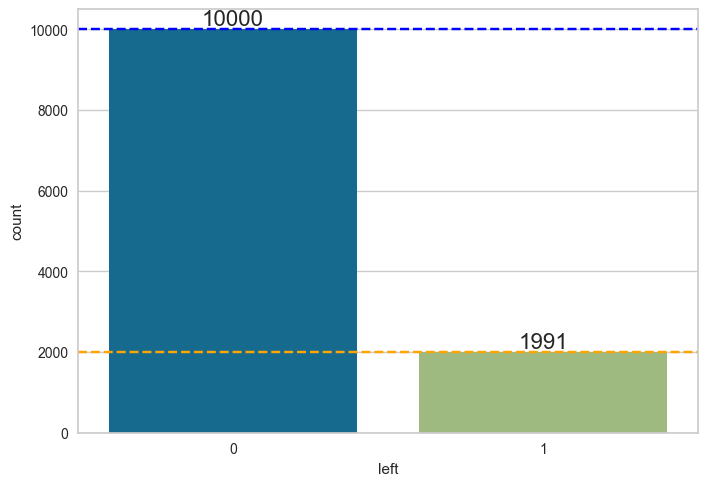

In [24]:
# visualize the distribution of the classes for target feature
display(df.left.value_counts())
ax = sns.countplot(x=df["left"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.left.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.left.value_counts()[0], color='blue', linestyle='--');

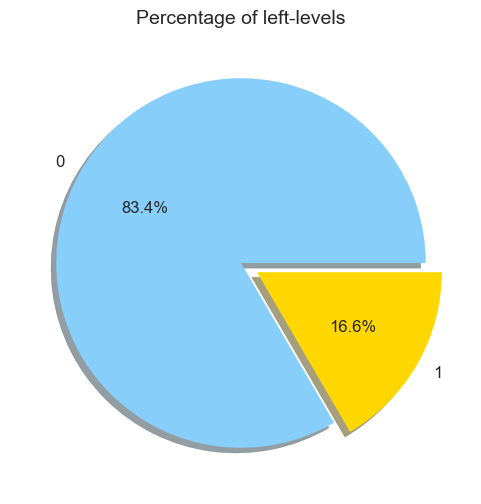

In [25]:
# Visualise the percentage of distribution in the target feature

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.left.value_counts().values, 
       labels=[0, 1], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("0 class dominates the data", fontdict={"color":"red",'fontsize': 14})
plt.show()

### Numeric Features

As part of the exploratory data analysis process, both numerical and categorical features will be analyzed below.

#### satisfaction level

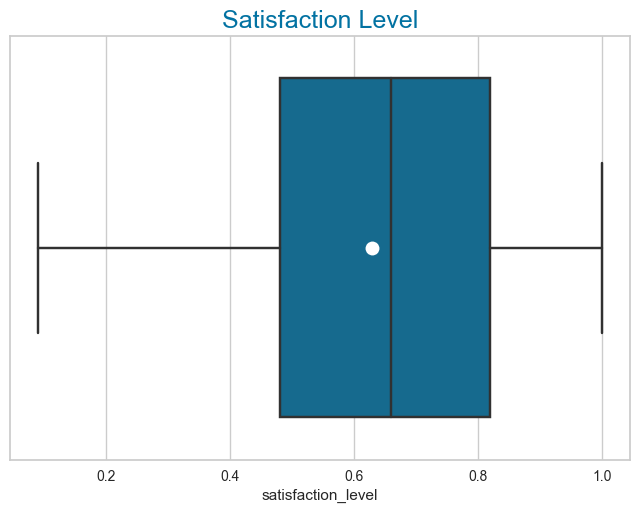

In [26]:
sns.boxplot(data=df, 
            x="satisfaction_level",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Satisfaction Level", fontsize=18, color="b");

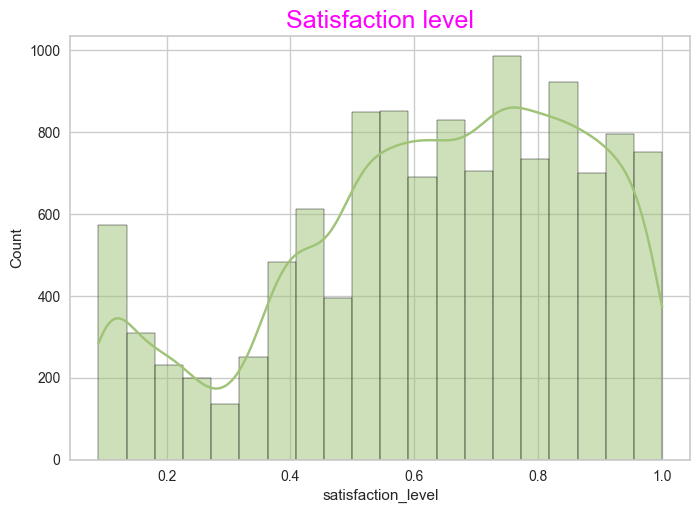

In [27]:
# Displaying the distribution of satisfaction_level feature with a histogram

sns.histplot(data=df, x="satisfaction_level", bins=20, kde=True, color="g")

plt.title("Relatively Higher Satisfaction level", fontsize=14, color="red");

**Check the statistical values**

In [28]:
# Descriptive Statistics of "satisfaction_level" Feature

print('Descriptive Statistics of the satisfaction_level Feature:\n')
df.satisfaction_level.describe()

Descriptive Statistics of the satisfaction_level Feature:



count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

Statistical Calculations :
--------------------------
Minimum:   0.09
Mean:      0.63
Median:    0.66
Mode:      0.74
Maximum:   1.00



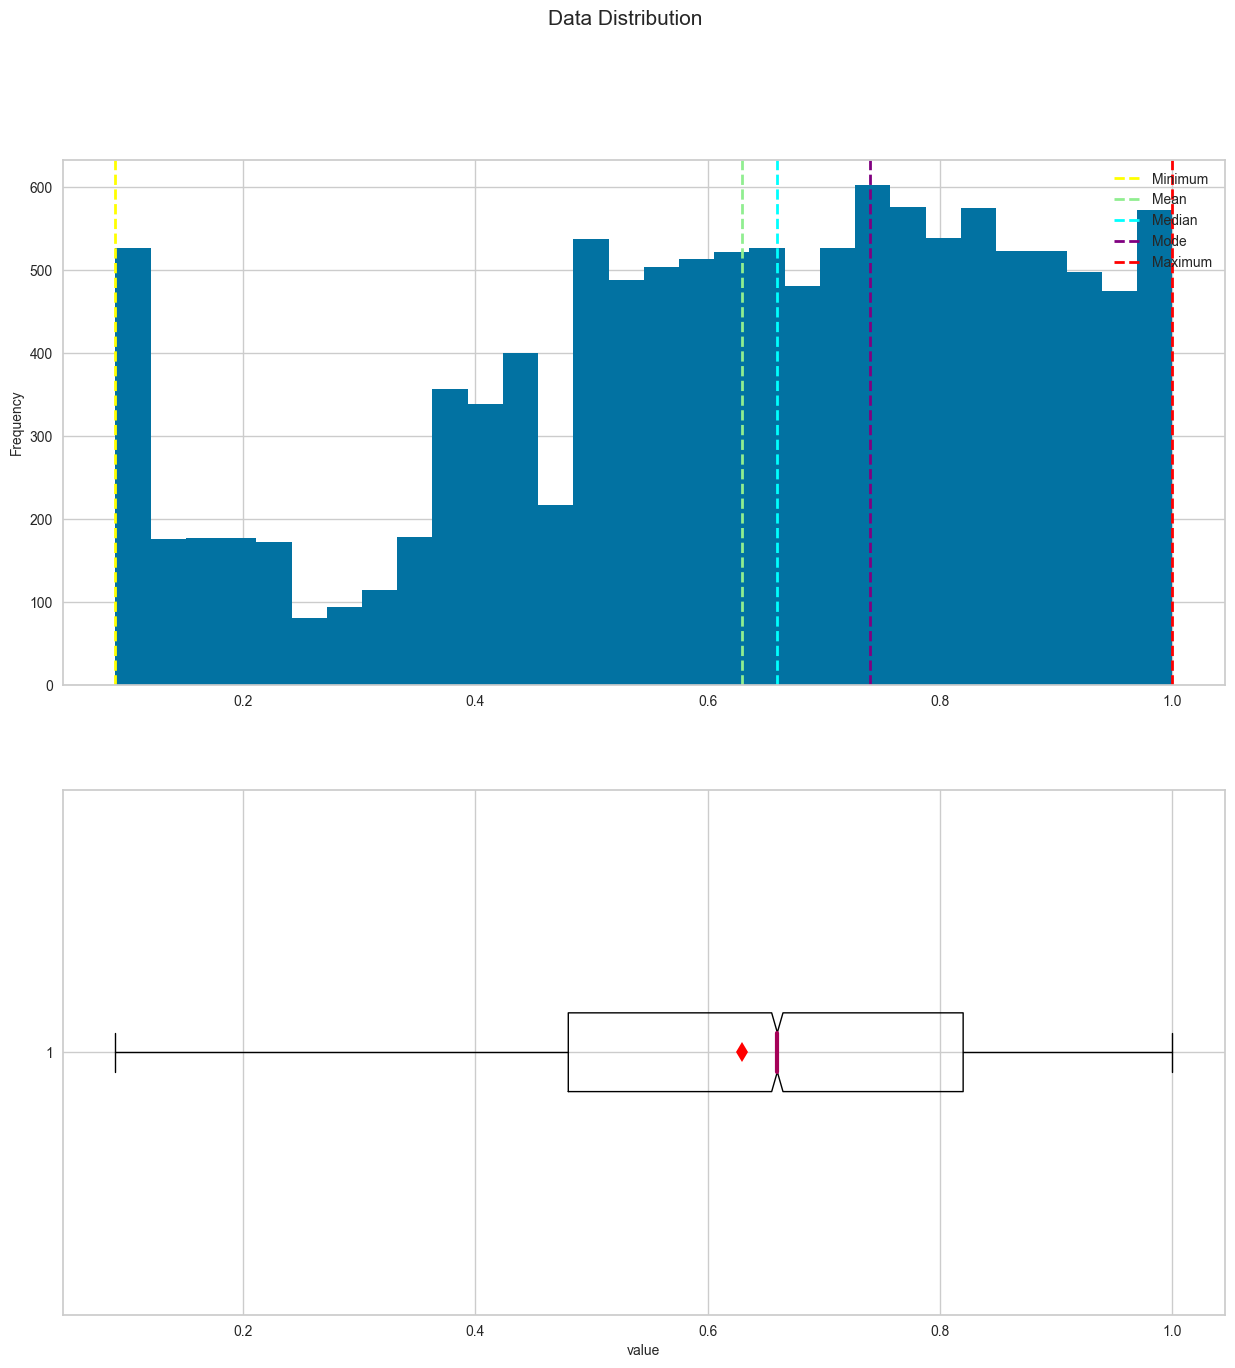

In [29]:
show_distribution(df["satisfaction_level"])

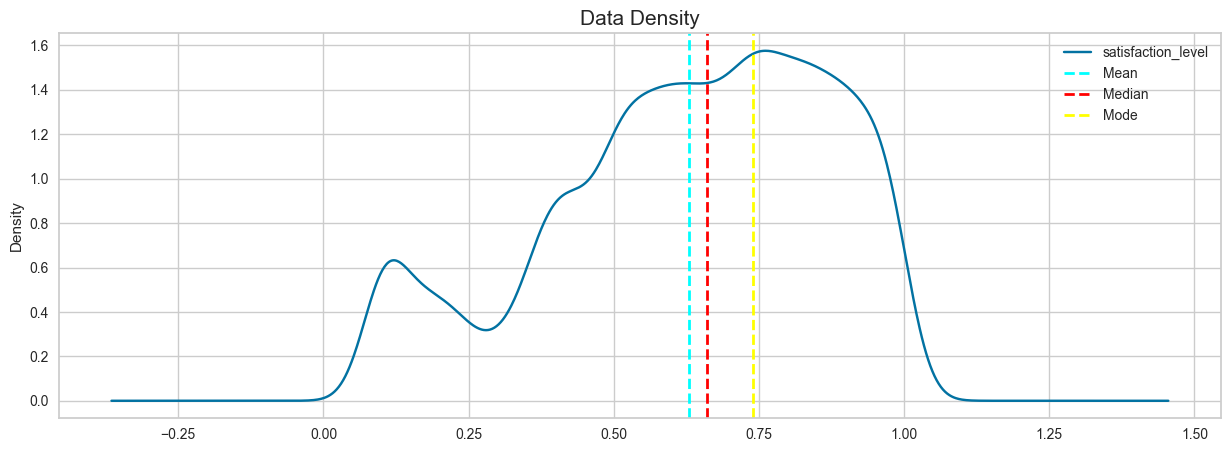

In [30]:
show_density(df["satisfaction_level"])

**Check the boxplot and histplot/kdeplot by "left" levels**

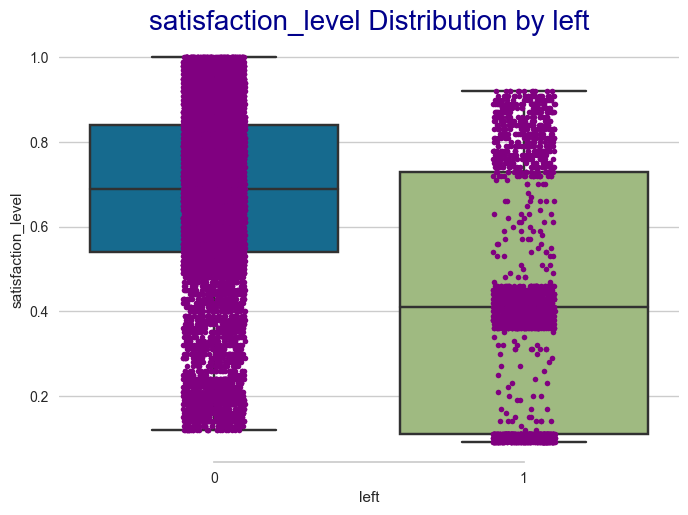

In [31]:
# Checking the extreme values in "satisfaction_level" feature by left with box plot

sns.boxplot(data=df, 
            y="satisfaction_level",
            x="left", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Add in points to show each observation
sns.stripplot(data=df,
              y="satisfaction_level",
              x="left", 
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("Satisfaction level for 0 class is higher than 1 class", fontsize=14, color="red");

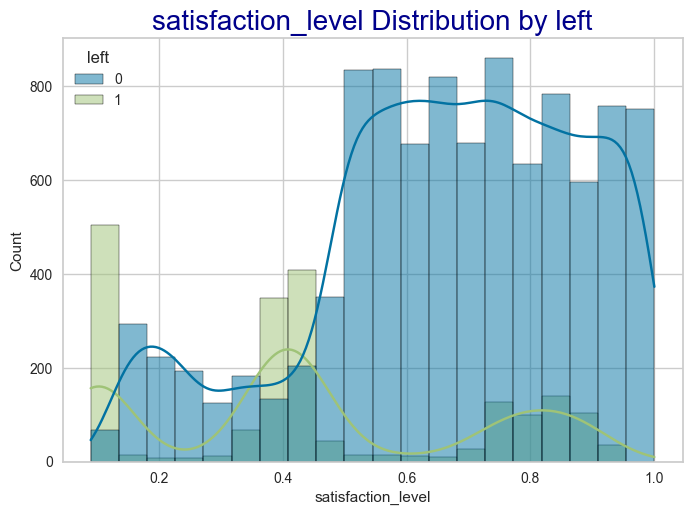

In [32]:
# Checking Density Distribution of "satisfaction_level" feature by left 

sns.histplot(data=df, x="satisfaction_level", bins=20, kde=True, hue="left")

plt.title("satisfaction_level Distribution by target feature", fontsize=14, color="red");

**Check the statistical values by "left" levels**

In [33]:
# Descriptive Statistics of satisfaction_level with respect to left levels

print(colored('Descriptive Statistics of the satisfaction_level by left:\n', 'blue', attrs=['bold']))
df.groupby("left").satisfaction_level.describe()

Descriptive Statistics of the satisfaction_level by left:



count      mean       std   min   25%   50%   75%   max
left                                                           
0     10000.0  0.667365  0.217082  0.12  0.54  0.69  0.84  1.00
1      1991.0  0.440271  0.265207  0.09  0.11  0.41  0.73  0.92

Statistical Calculations :
--------------------------
Minimum:   0.09
Mean:      0.63
Median:    0.66
Mode:      0.74
Maximum:   1.00



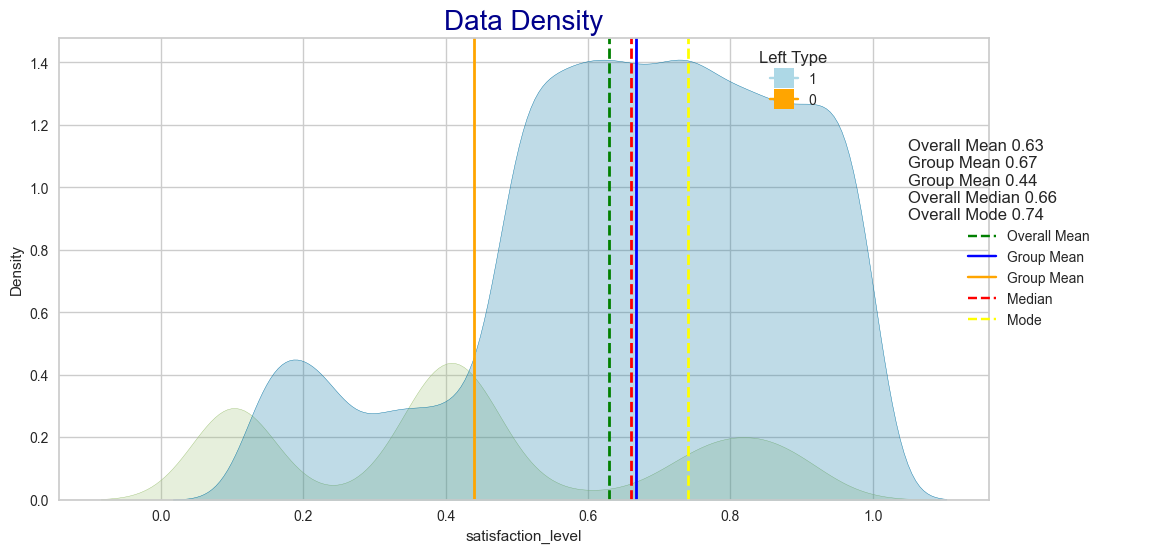

In [34]:
show_compare(df, "satisfaction_level", "left")

**A general assessment for satisfaction level:** 

As observed in the visualization above, the overall satisfaction level of the employees is relatively high, indicating right-skewed data from a technical perspective. In terms of the distribution of the satisfaction level for each class, namely the employee group who left the company (1) and who still continue to work (0 class), it is clear that the general satisfaction level of 0 class is higher than 1 class, which has been emphasized by many scientific empirical studies ([For a detailed essay written by Lambert and Hogan that emphasize the importance of employee satisfaction in decreasing the turnover rates click here](https://www.researchgate.net/publication/200824417_The_Importance_of_Job_Satisfaction_and_Organizational_Commitment_in_Shaping_Turnover_Intent_A_Test_of_a_Causal_Model)) 

It is also worth noting that this distribution provides valuable insights. However, it is important to acknowledge that without information about the general satisfaction levels of employees in other companies within the same sector, making definitive comments about the overall level of employee satisfaction in this particular company becomes challenging.

#### last_evaluation

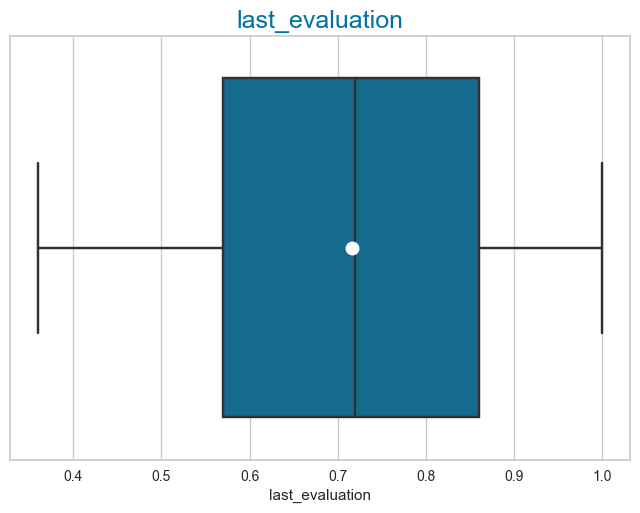

In [35]:
sns.boxplot(data=df, 
            x="last_evaluation",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("last_evaluation", fontsize=14, color="red");

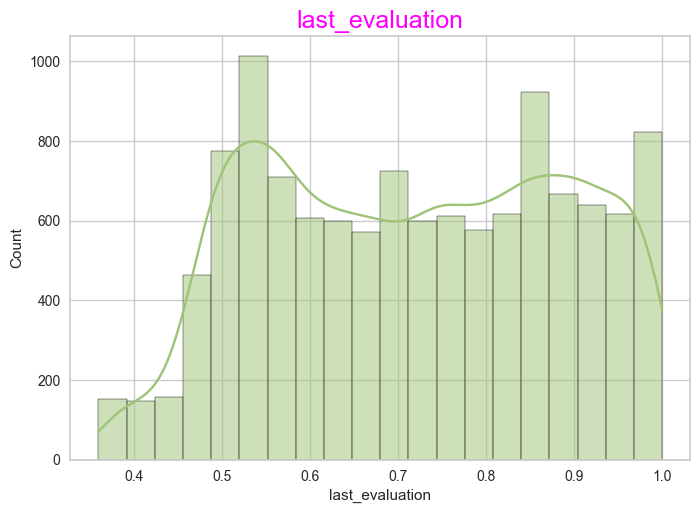

In [36]:
# Display the distribution of last_evaluation feature with a histogram

sns.histplot(data=df, x="last_evaluation", bins=20, kde=True, color="g")

plt.title("Relatively higher last_evaluation scores for the overall data", fontsize=14, color="red");

In [37]:
# Descriptive Statistics of "last_evaluation" Feature

print('Descriptive Statistics of the last_evaluation Feature:\n')
df.last_evaluation.describe()

Descriptive Statistics of the last_evaluation Feature:



count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64

Statistical Calculations :
--------------------------
Minimum:   0.36
Mean:      0.72
Median:    0.72
Mode:      0.55
Maximum:   1.00



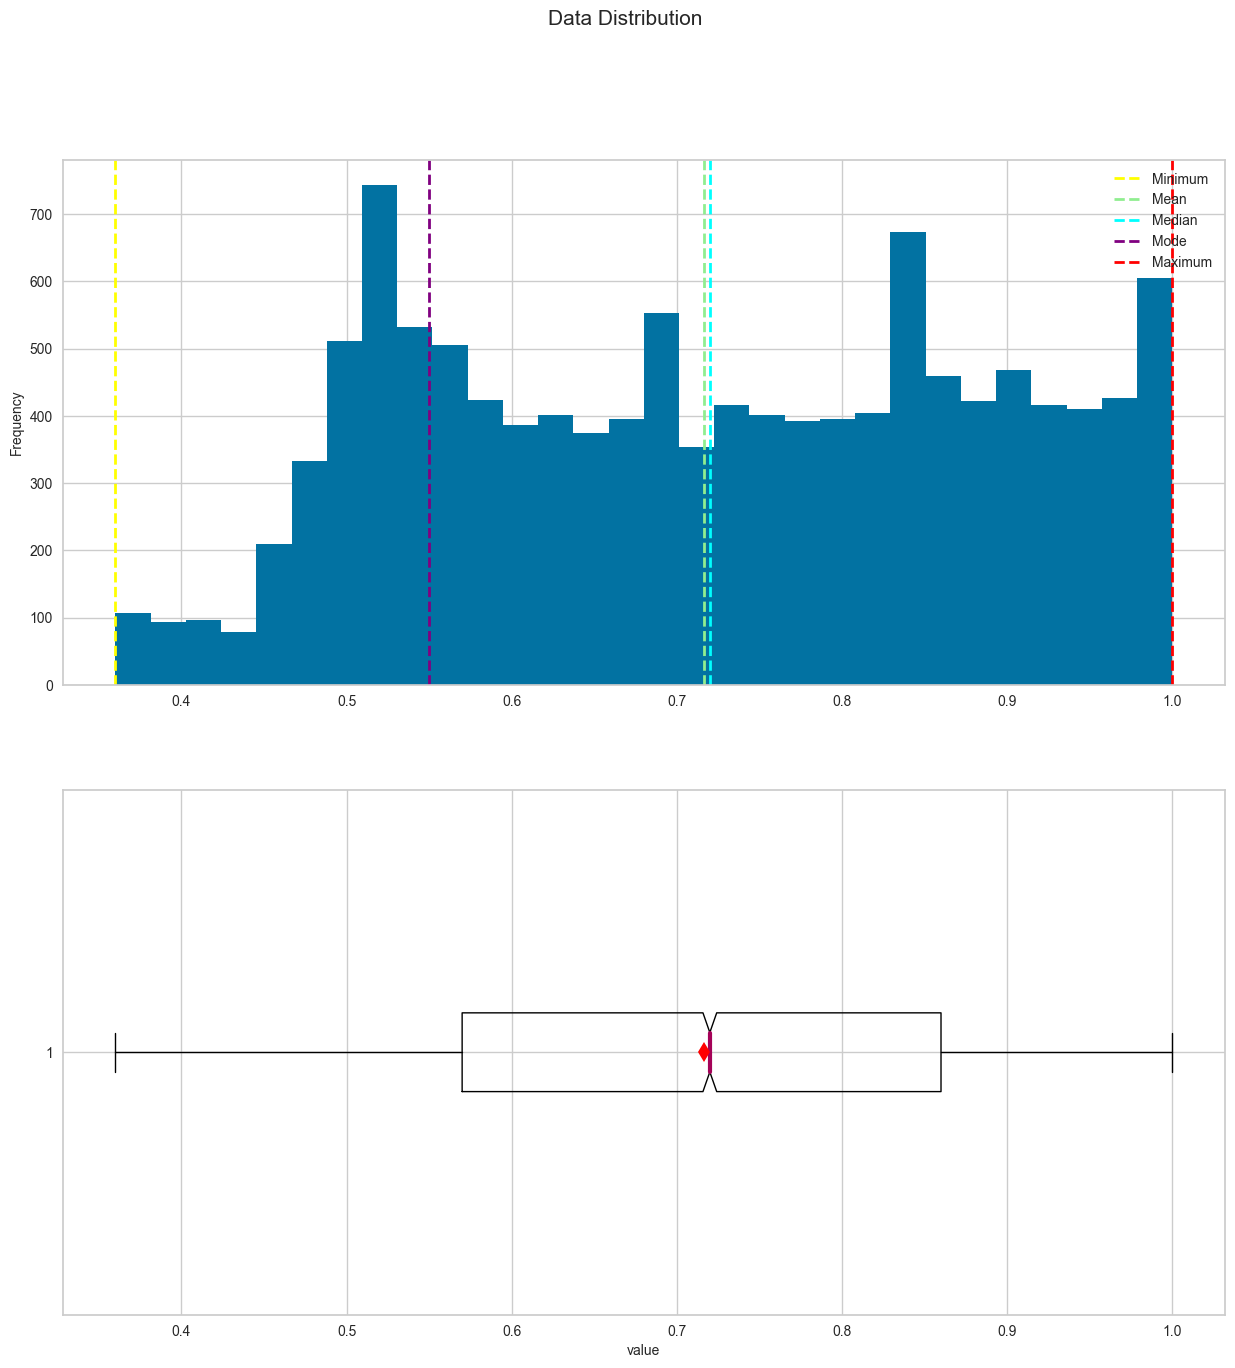

In [38]:
show_distribution(df["last_evaluation"])

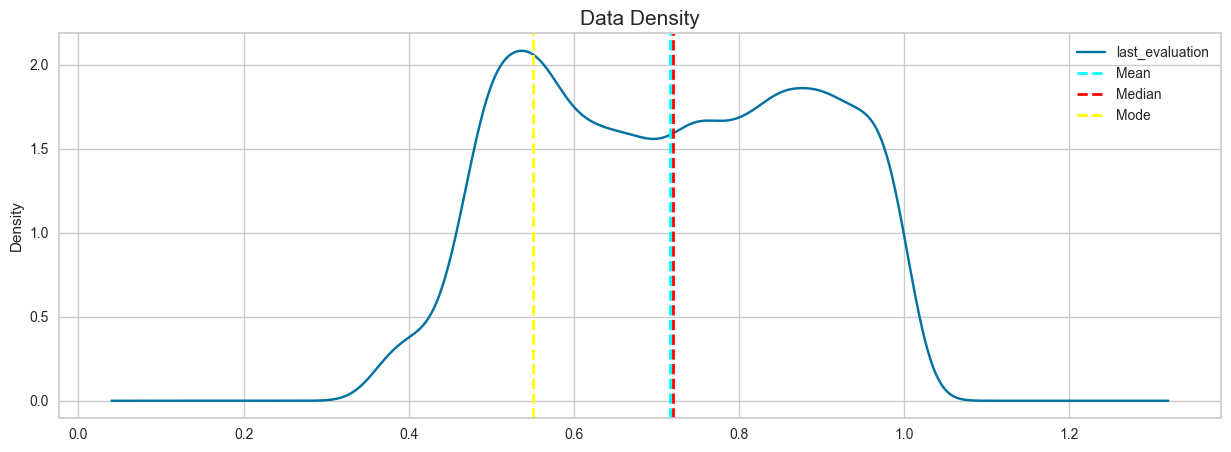

In [39]:
show_density(df["last_evaluation"])

**Check the boxplot and histplot/kdeplot by "left" levels**

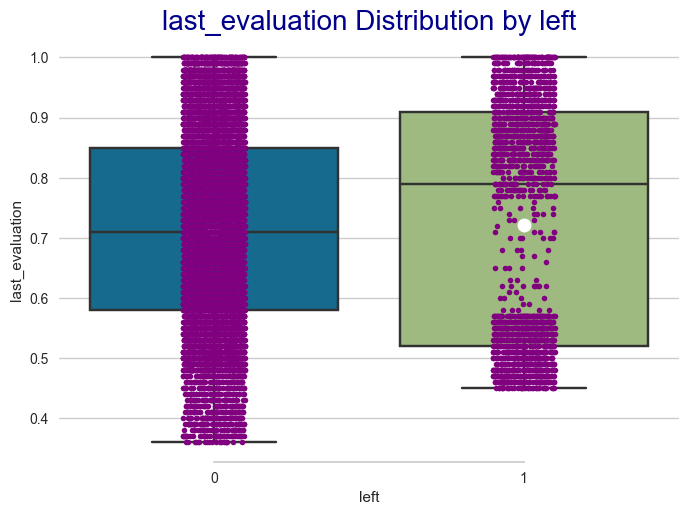

In [40]:
# Checking the extreme values in "last_evaluation" feature by left with box plot

sns.boxplot(data=df, 
            y="last_evaluation",
            x="left", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Add in points to show each observation
sns.stripplot(data=df,
              y="last_evaluation",
              x="left", 
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("last_evaluation distribution for each class:\n No significant difference for the classes", 
          fontsize=14, color="red");

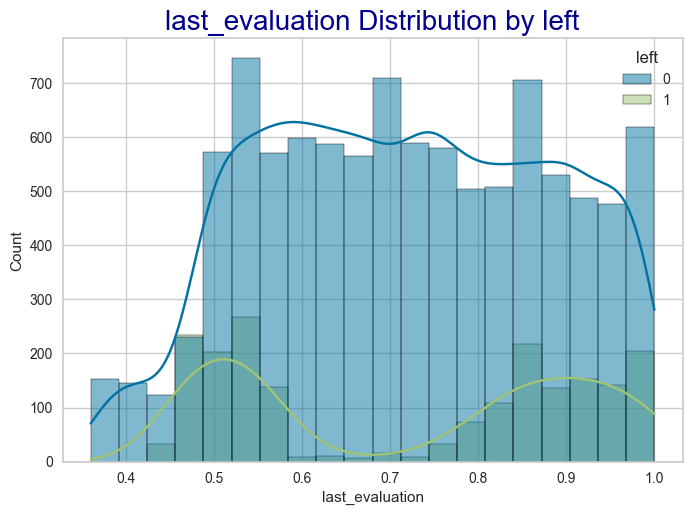

In [41]:
# Check Density Distribution of "last_evaluation" feature by left 

sns.histplot(data=df, x="last_evaluation", bins=20, kde=True, hue="left")

plt.title("last_evaluation Distribution by left", fontsize=20, color="darkblue");

**Check the statistical values by "left" levels**

In [42]:
# Descriptive Statistics of last_evaluation with respect to left levels

print(colored('Descriptive Statistics of the last_evaluation by left:\n', 'blue', attrs=['bold']))
df.groupby("left").last_evaluation.describe()

Descriptive Statistics of the last_evaluation by left:



count      mean       std   min   25%   50%   75%  max
left                                                          
0     10000.0  0.715667  0.161919  0.36  0.58  0.71  0.85  1.0
1      1991.0  0.721783  0.197436  0.45  0.52  0.79  0.91  1.0

Statistical Calculations :
--------------------------
Minimum:   0.36
Mean:      0.72
Median:    0.72
Mode:      0.55
Maximum:   1.00



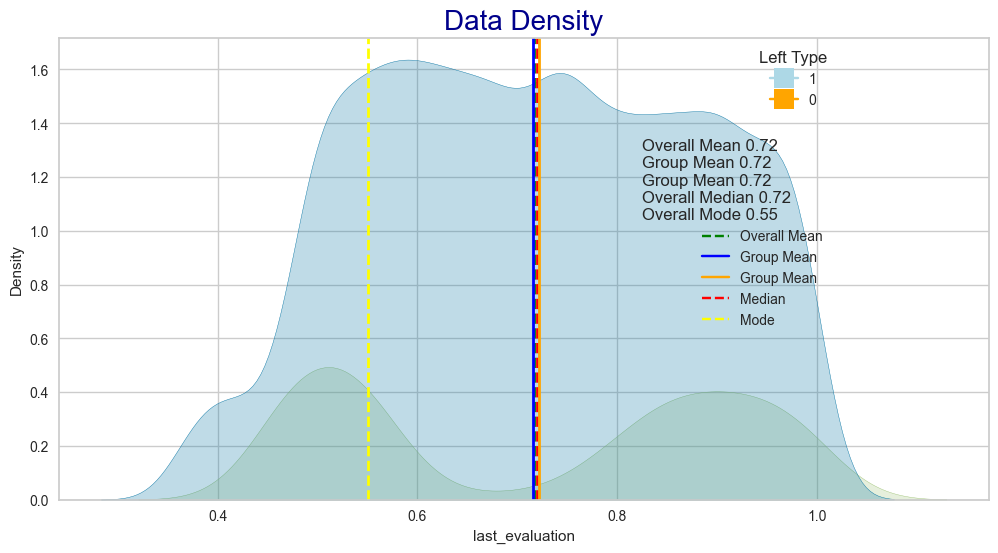

In [43]:
show_compare(df, "last_evaluation", "left")

**A general assessment for last_evaluation feature:**

The visualizations above regarding the "last evaluation" feature indicate that this particular feature does not have a significant effect on an employee's decision to stay in or leave the company. However, to confirm this assessment, a statistical significance test will be conducted below.

#### number_project

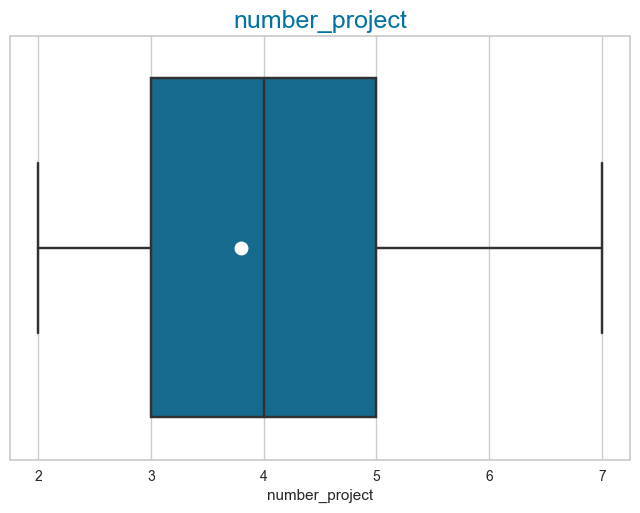

In [44]:
sns.boxplot(data=df, 
            x="number_project",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("number_project", fontsize=18, color="b");

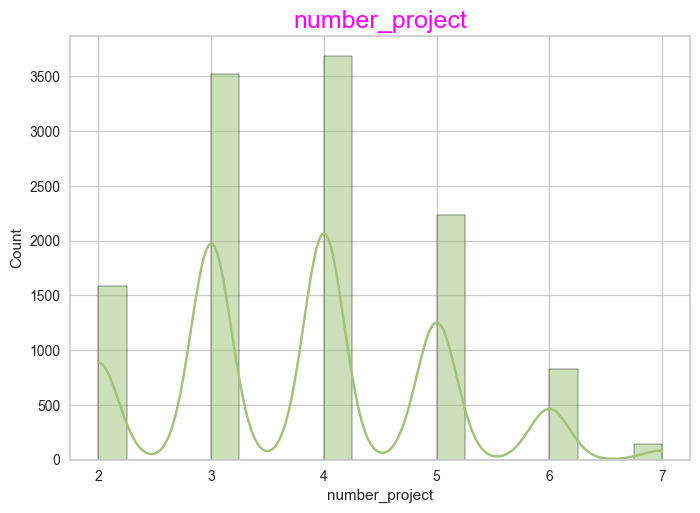

In [45]:
# Displaying the distribution of number_project feature with a histogram

sns.histplot(data=df, x="number_project", bins=20, kde=True, color="g")

plt.title("number_project", fontsize=18, color="fuchsia");

**Check the statistical values**

In [46]:
# Descriptive Statistics of "number_project" Feature

print('Descriptive Statistics of the number_project Feature:\n')
df.number_project.describe()

Descriptive Statistics of the number_project Feature:



count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

Statistical Calculations :
--------------------------
Minimum:   2.00
Mean:      3.80
Median:    4.00
Mode:      4.00
Maximum:   7.00



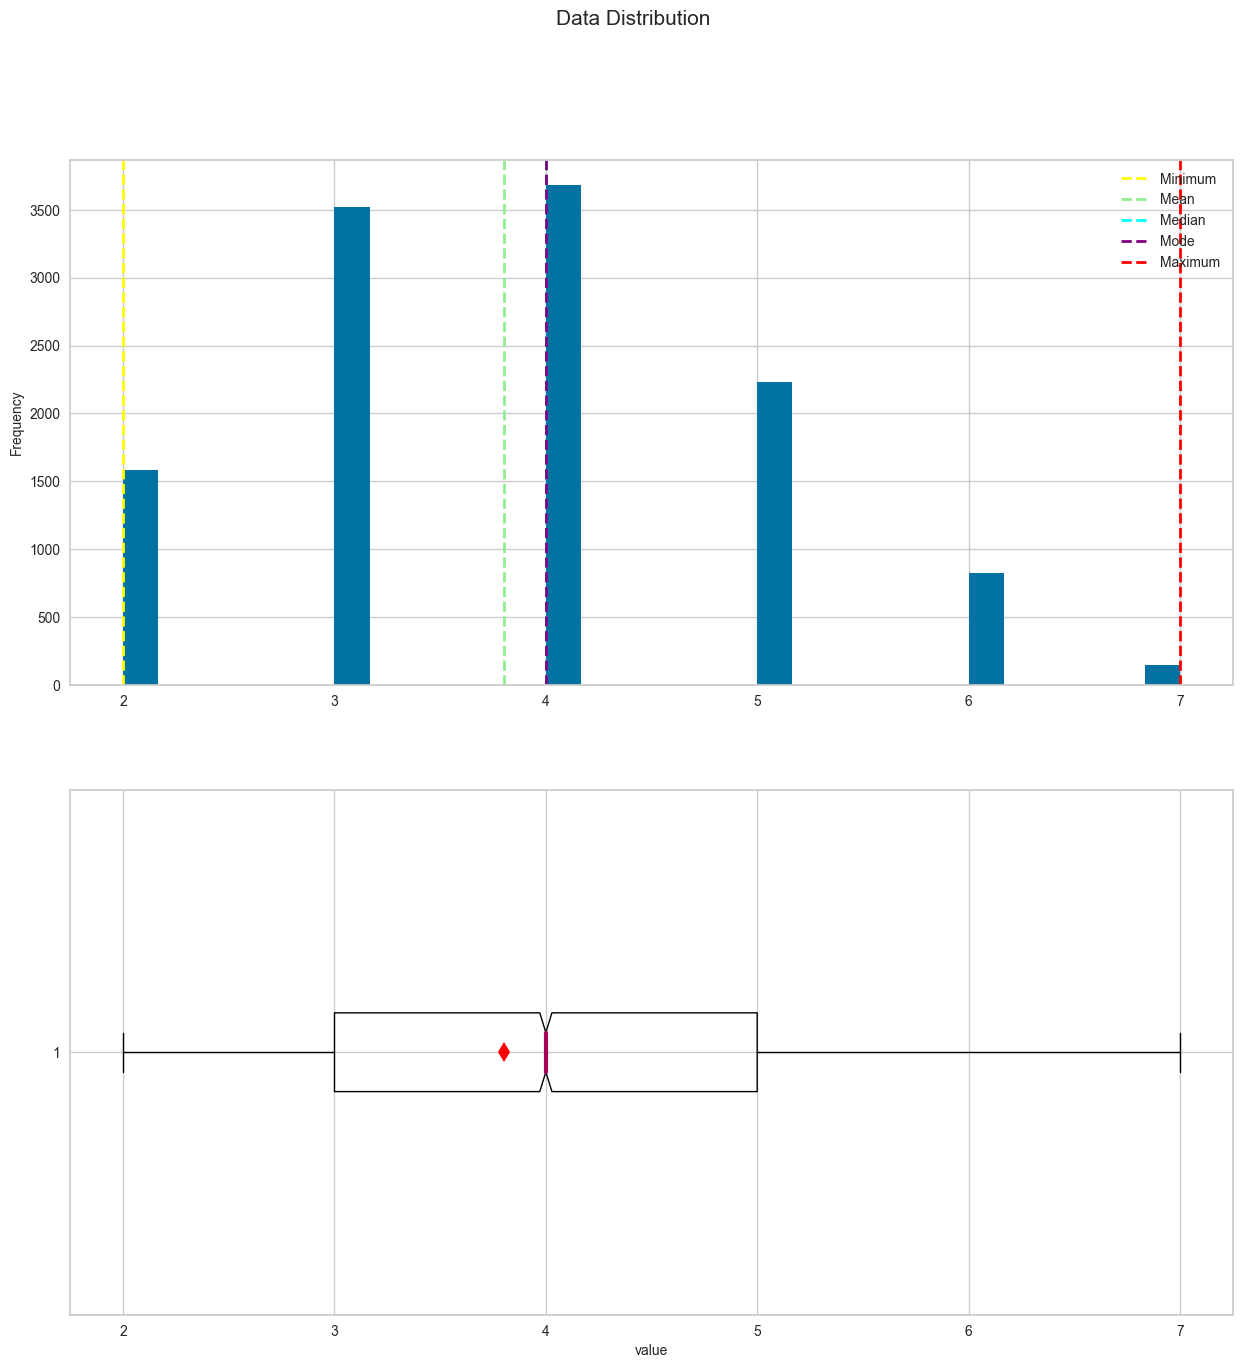

In [47]:
show_distribution(df["number_project"])

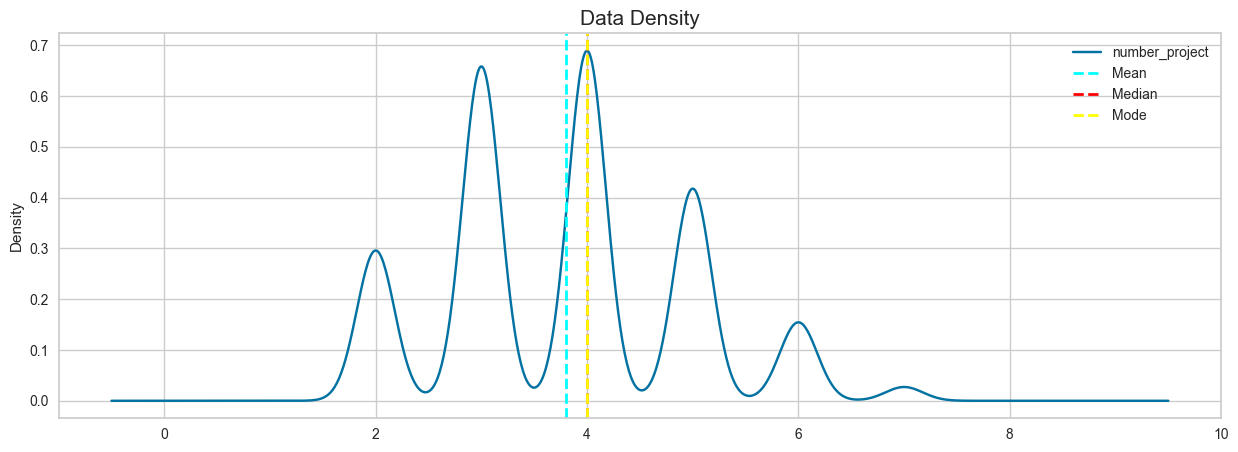

In [48]:
show_density(df["number_project"])

**Check the boxplot and histplot/kdeplot by "left" levels**

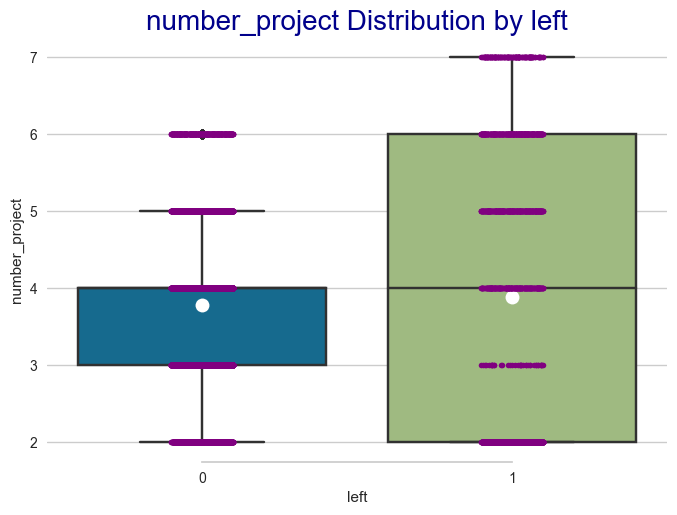

In [49]:
# Checking the extreme values in "number_project" feature by left with box plot

sns.boxplot(data=df, 
            y="number_project",
            x="left", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Add in points to show each observation
sns.stripplot(data=df,
              y="number_project",
              x="left", 
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("number_project distribution for each class:\n Average number of projects for the classes are closed", 
          fontsize= 14, color="red");

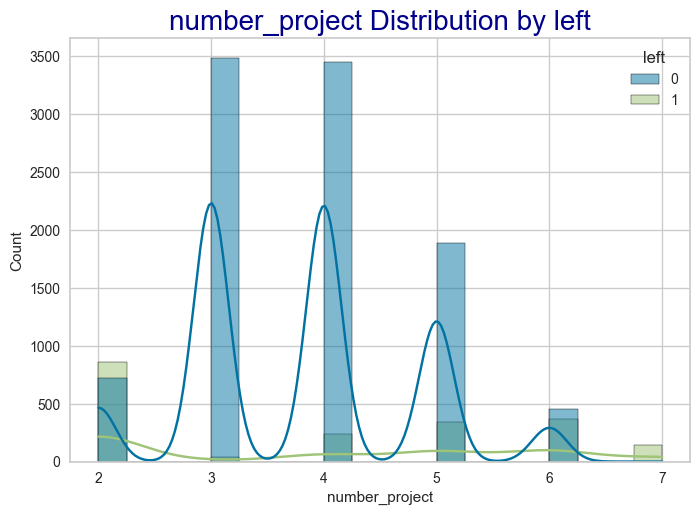

In [50]:
# Checking Density Distribution of "number_project" feature by left 

sns.histplot(data=df, x="number_project", bins=20, kde=True, hue="left")

plt.title("number_project Distribution by left", fontsize=20, color="darkblue");

**Check the statistical values by "left" levels**

In [51]:
# Descriptive Statistics of number_project with respect to left levels

print(colored('Descriptive Statistics of the number_project by left:\n', 'blue', attrs=['bold']))
df.groupby("left").number_project.describe()

Descriptive Statistics of the number_project by left:



count      mean       std  min  25%  50%  75%  max
left                                                      
0     10000.0  3.786800  0.981755  2.0  3.0  4.0  4.0  6.0
1      1991.0  3.883476  1.817139  2.0  2.0  4.0  6.0  7.0

Statistical Calculations :
--------------------------
Minimum:   2.00
Mean:      3.80
Median:    4.00
Mode:      4.00
Maximum:   7.00



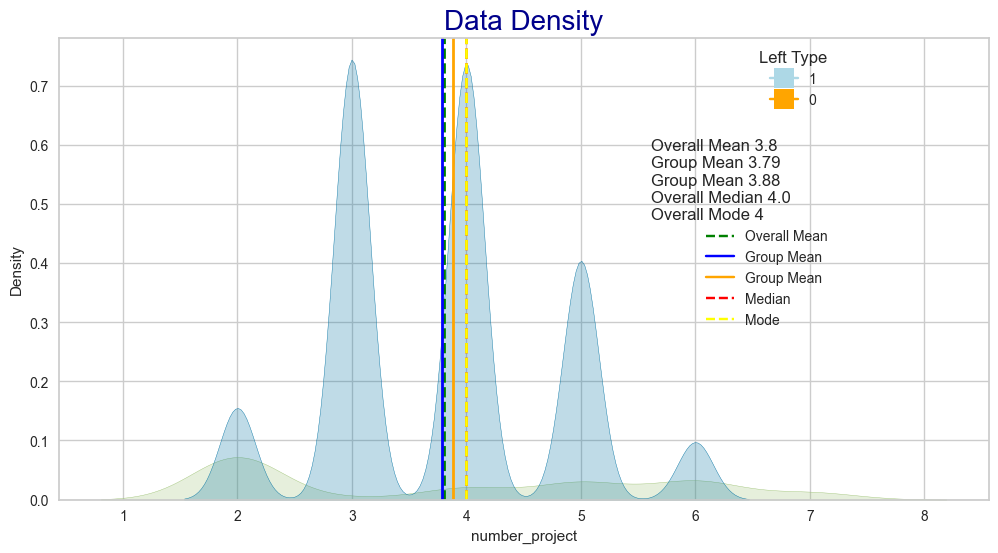

In [52]:
show_compare(df, "number_project", "left")

**A general assesment for number_projects feature**

Number of projects that an employee is responsible for is a main indicator of the work load. Workload is a significant determinant of employees' happiness and their decision to continue working in a company. [As emphasized by Shahzad et al. in their recent empirical study](https://www.researchgate.net/publication/342789279_An_Empirical_Analysis_of_Work_Overload_Organizational_Commitment_and_Turnover_Intentions_among_Employees_of_Banking_Sector), "Work overload is often considered the most critical factor that affects employees' commitment and turnover intention towards the organization." The authors suggest that work overload has a negative impact on organizational commitment while positively influencing employees' turnover intentions.

However, workload has a two-way effect. An employee who is given very little work may not want to stay in the company, while an employee who is given excessive work may also want to leave the company. Therefore, extreme values of the number of projects assigned to an employee can be crucial in their decision to leave the job.

The visualizations above do not show a significant difference in the decisions of employees to leave the company or not. To confirm this observation, a statistical significance test will be conducted below for further assurance.

#### average_montly_hours

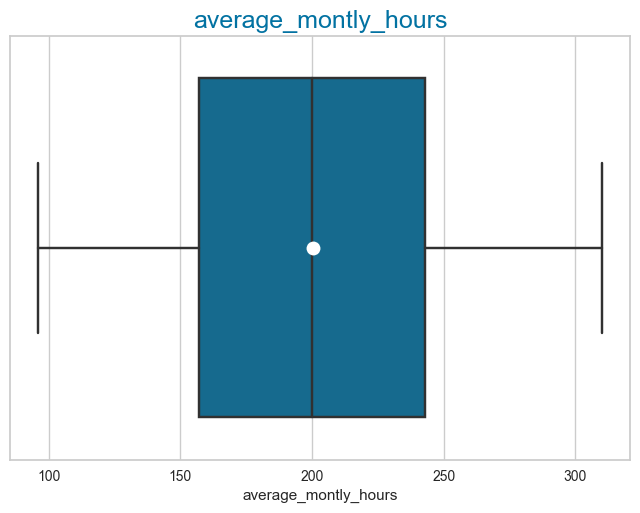

In [53]:
sns.boxplot(data=df, 
            x="average_montly_hours",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("average_montly_hours", fontsize=14, color="red");

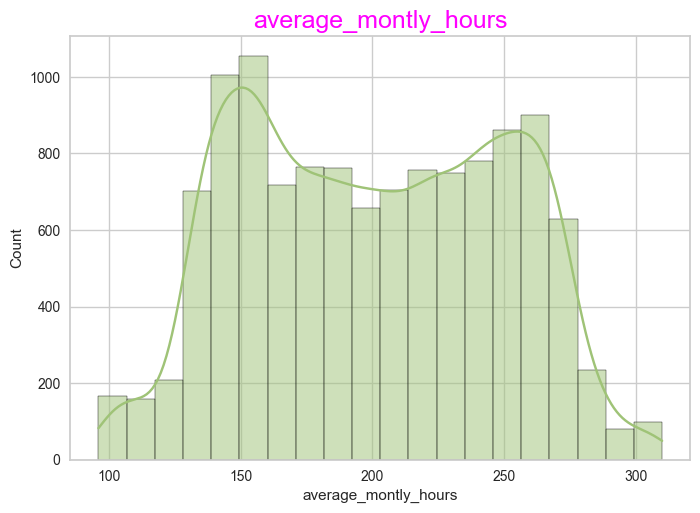

In [54]:
# Displaying the distribution of average_montly_hours feature with a histogram

sns.histplot(data=df, x="average_montly_hours", bins=20, kde=True, color="g")

plt.title("average_montly_hours has a relatively balanced distribution", fontsize=14, color="red");

**Check the statistical values**

In [55]:
# Descriptive Statistics of "average_montly_hours" Feature

print('Descriptive Statistics of the average_montly_hours Feature:\n')
df.average_montly_hours.describe()

Descriptive Statistics of the average_montly_hours Feature:



count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

Statistical Calculations :
--------------------------
Minimum:  96.00
Mean:    200.47
Median:  200.00
Mode:    149.00
Maximum: 310.00



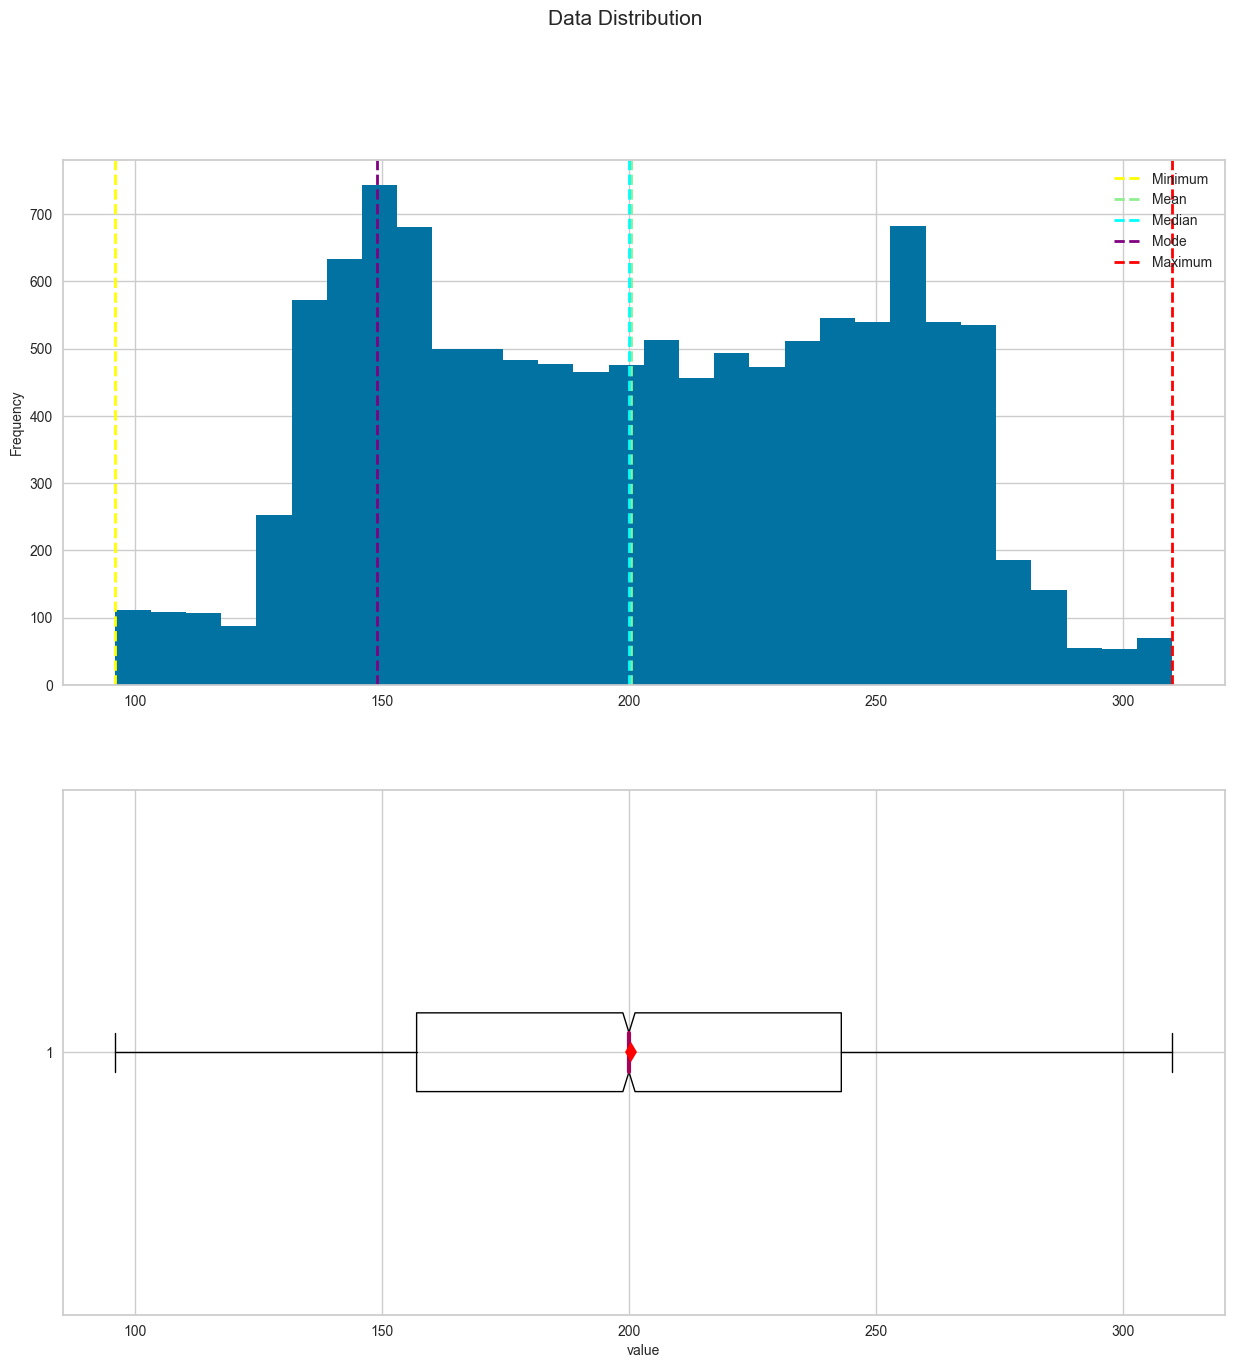

In [56]:
show_distribution(df["average_montly_hours"])

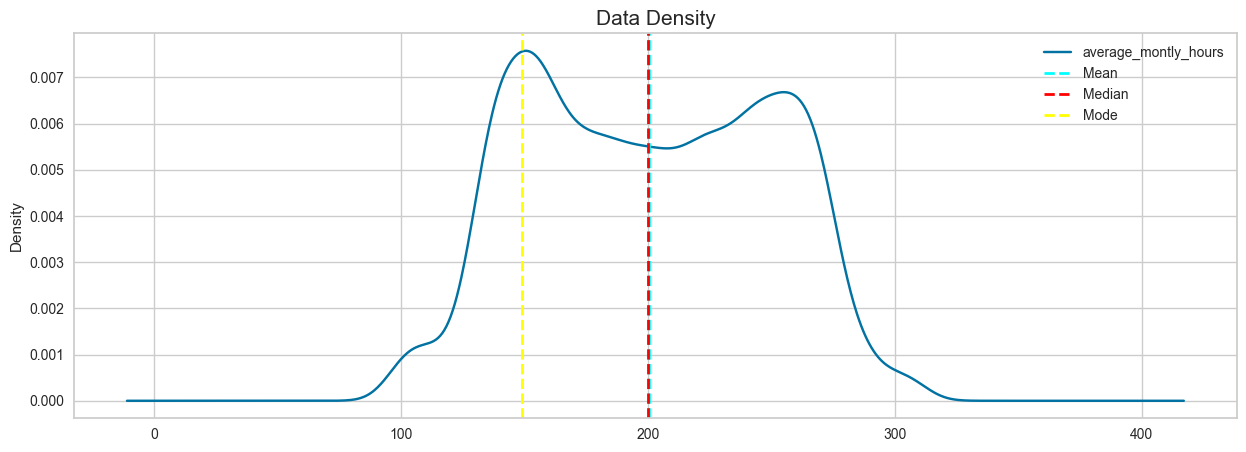

In [57]:
show_density(df["average_montly_hours"])

**Check the boxplot and histplot/kdeplot by "left" levels**

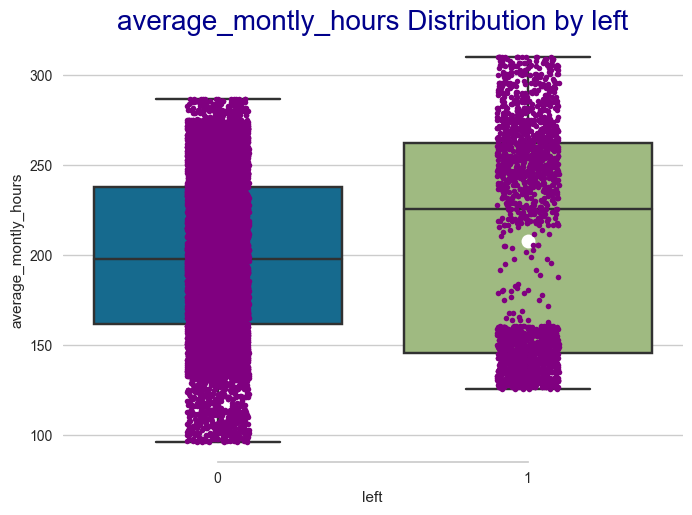

In [58]:
# Checking the extreme values in "average_montly_hours" feature by left with box plot

sns.boxplot(data=df, 
            y="average_montly_hours",
            x="left", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Add in points to show each observation
sns.stripplot(data=df,
              y="average_montly_hours",
              x="left", 
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("average_montly_hours distribution for each class:\n More working hours increase job quitting", 
          fontsize=14, color="red");

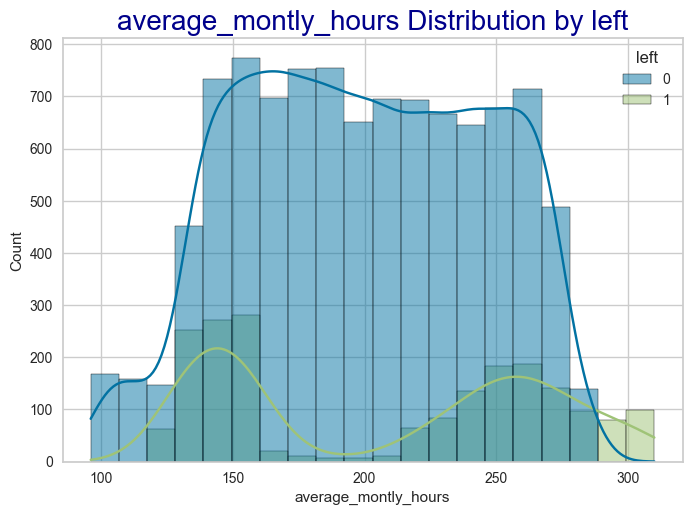

In [59]:
# Checking Density Distribution of "average_montly_hours" feature by left 

sns.histplot(data=df, x="average_montly_hours", bins=20, kde=True, hue="left")

plt.title("average_montly_hours distribution for each class:\n Class 1 is more right skewed", fontsize=14, color="red");

**Check the statistical values by "left" levels**

In [60]:
# Descriptive Statistics of average_montly_hours with respect to left levels

print(colored('Descriptive Statistics of the average_montly_hours by left:\n\nMean, min and max are all higher for class 1\n', 
              'blue', attrs=['bold']))
df.groupby("left").average_montly_hours.describe()

Descriptive Statistics of the average_montly_hours by left:



count       mean        std    min    25%    50%    75%    max
left                                                                  
0     10000.0  198.94270  45.665507   96.0  162.0  198.0  238.0  287.0
1      1991.0  208.16223  61.295145  126.0  146.0  226.0  262.5  310.0

Statistical Calculations :
--------------------------
Minimum:  96.00
Mean:    200.47
Median:  200.00
Mode:    149.00
Maximum: 310.00



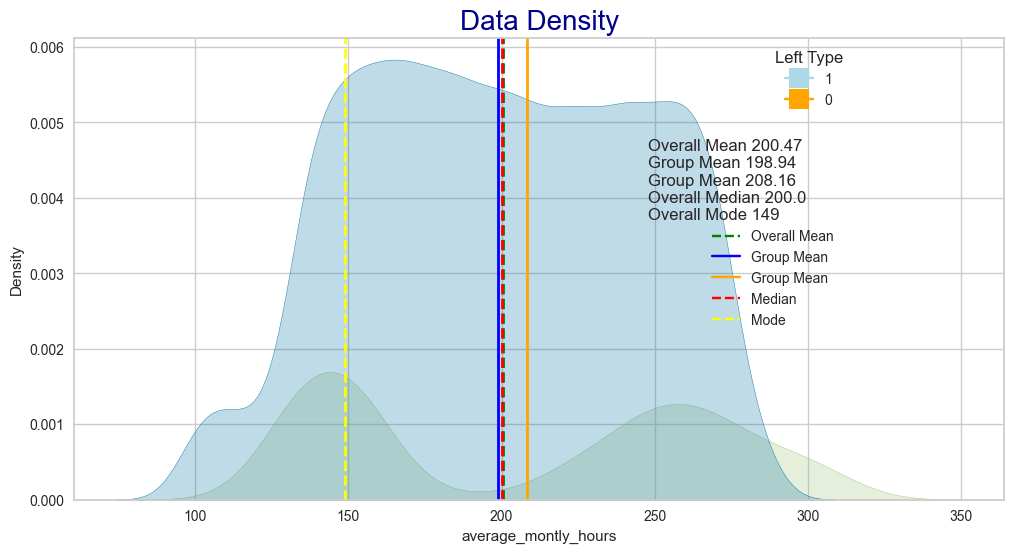

In [61]:
show_compare(df, "average_montly_hours", "left")

**General assessment of average_working_hours feature**:

As observed from the visuals and statistical measures presented above, there is a negative effect of increasing working hours on employees' decision to continue working.  The negative impact of increasing working hours, as indicated by the higher turnover rate and the tendency towards job quitting (class 1), suggests that employees may be more inclined to leave the company when their average monthly working hours are higher.

#### time_spend_company

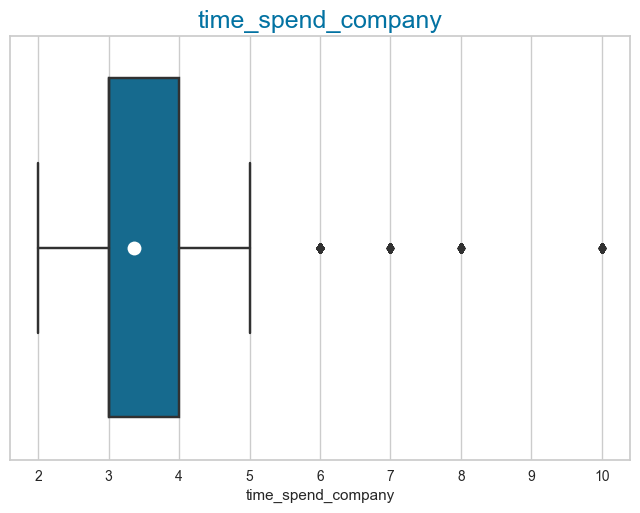

In [62]:
sns.boxplot(data=df, 
            x="time_spend_company",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("time_spend_company", fontsize=14, color="red");

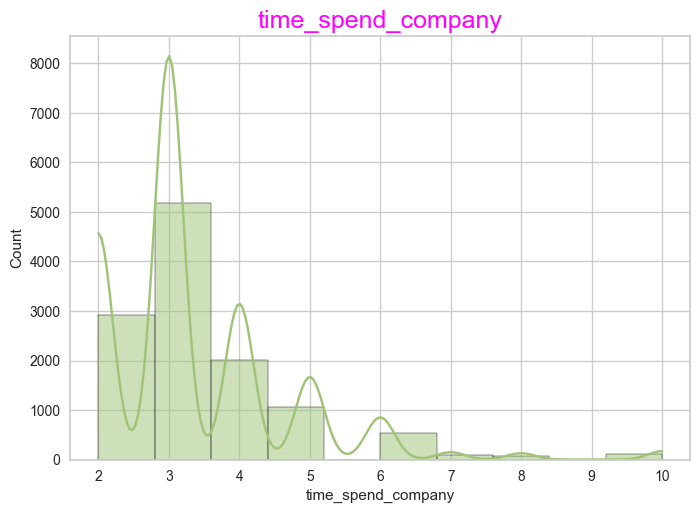

In [63]:
# Displaying the distribution of time_spend_company feature with a histogram

sns.histplot(data=df, x="time_spend_company", bins=10, kde=True, color="g")

plt.title("time_spend_company:\n Average years of service around 3 years", fontsize=14, color="red");

**Check the statistical values**

In [64]:
# Descriptive Statistics of "time_spend_company" Feature

print('Descriptive Statistics of the time_spend_company Feature:\n')
df.time_spend_company.describe()

Descriptive Statistics of the time_spend_company Feature:



count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

Statistical Calculations :
--------------------------
Minimum:   2.00
Mean:      3.36
Median:    3.00
Mode:      3.00
Maximum:  10.00



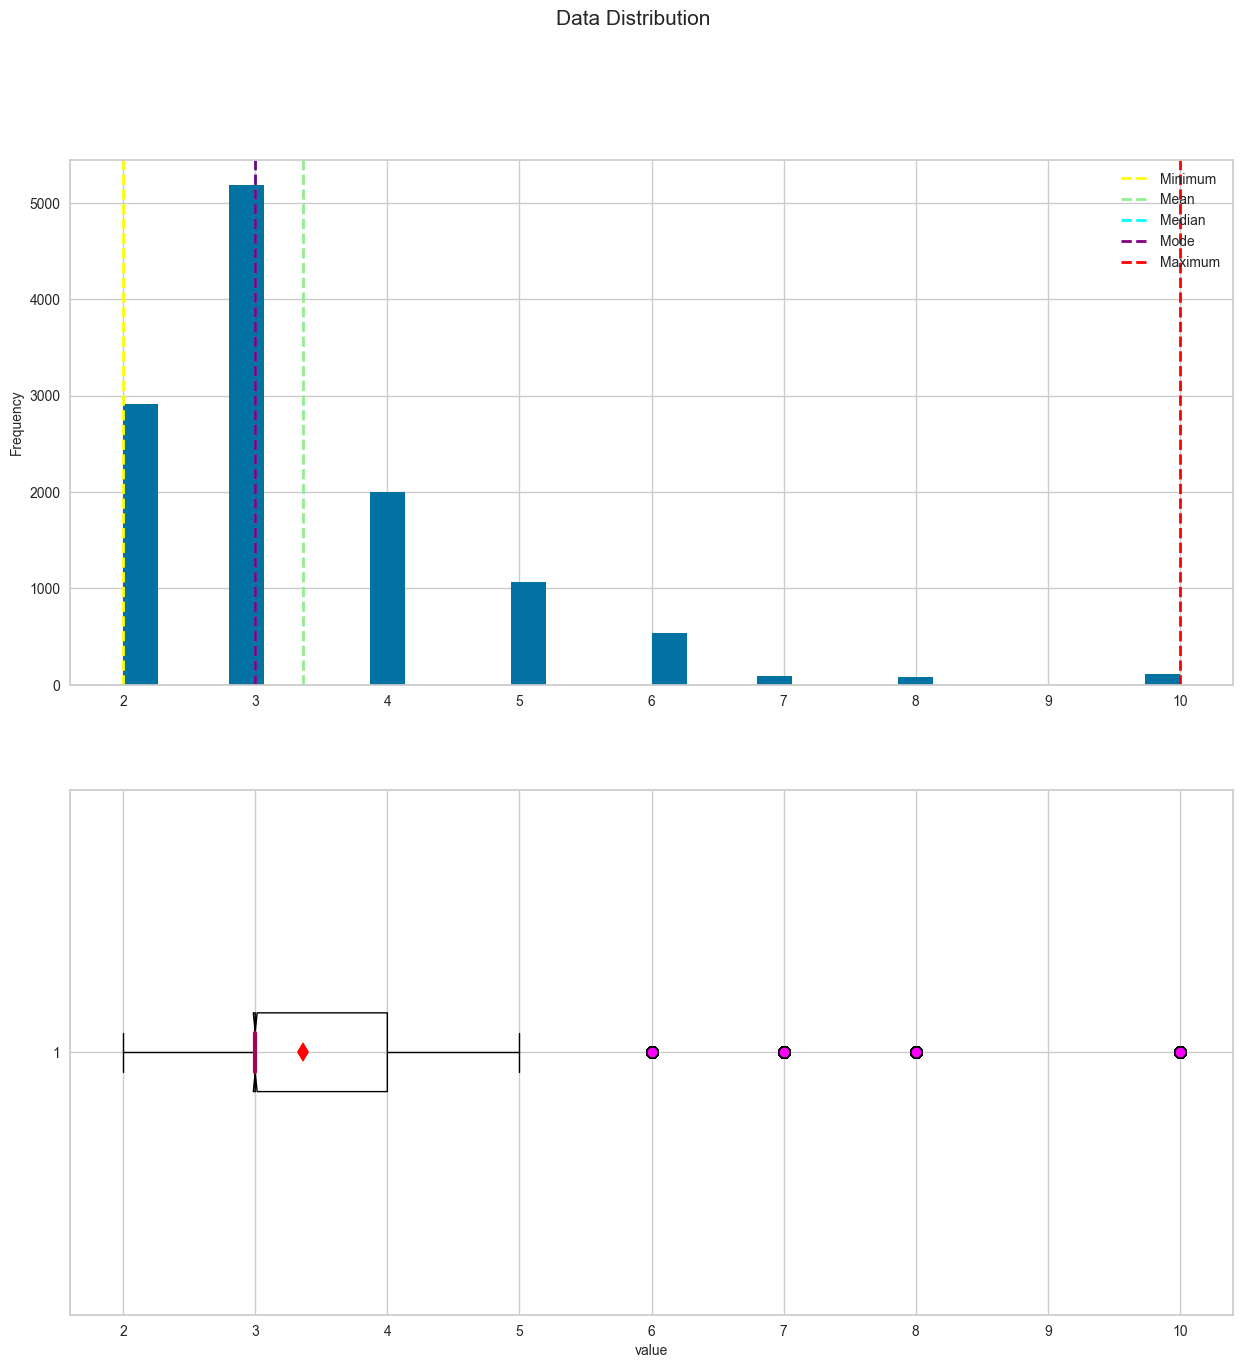

In [65]:
show_distribution(df["time_spend_company"])

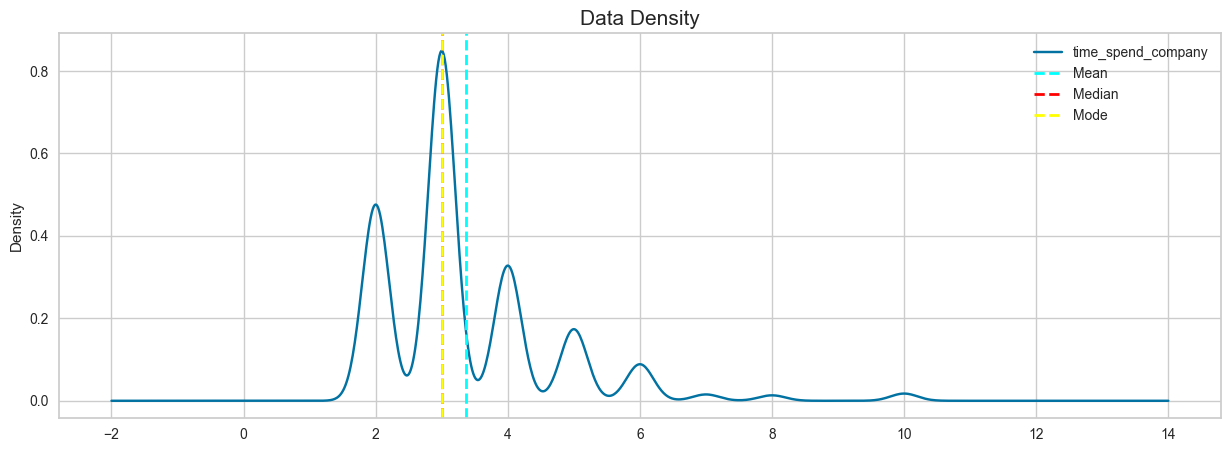

In [66]:
show_density(df["time_spend_company"])

**Check the boxplot and histplot/kdeplot by "left" levels**

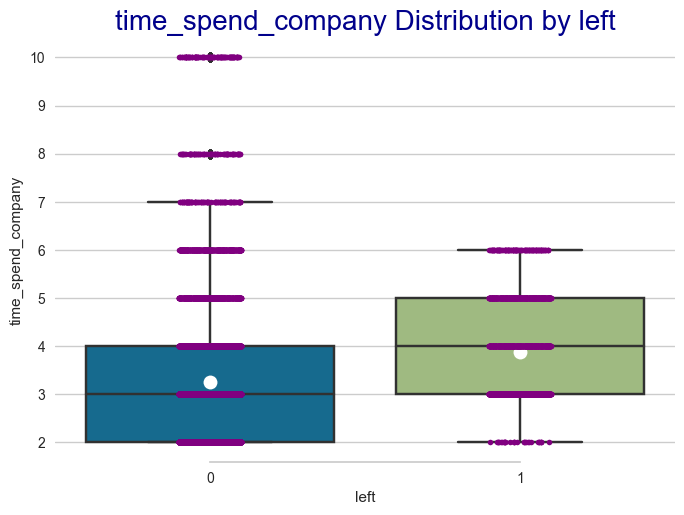

In [67]:
# Checking the extreme values in "time_spend_company" feature by left with box plot

sns.boxplot(data=df, 
            y="time_spend_company",
            x="left", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Add in points to show each observation
sns.stripplot(data=df,
              y="time_spend_company",
              x="left", 
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("time_spend_company distribution for each class:\n", fontsize=20, color="darkblue");

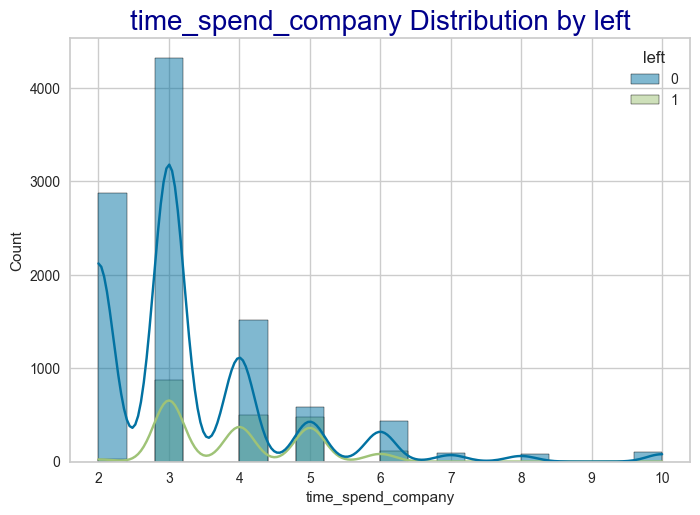

In [68]:
# Checking Density Distribution of "time_spend_company" feature by left 

sns.histplot(data=df, x="time_spend_company", bins=20, kde=True, hue="left")

plt.title("time_spend_company Distribution by left", fontsize=20, color="darkblue");

**Check the statistical values by "left" levels**

In [69]:
# Descriptive Statistics of time_spend_company with respect to left levels

print(colored('Descriptive Statistics of the time_spend_company by left:\n', 'blue', attrs=['bold']))
df.groupby("left").time_spend_company.describe()

Descriptive Statistics of the time_spend_company by left:



count      mean       std  min  25%  50%  75%   max
left                                                       
0     10000.0  3.262000  1.367239  2.0  2.0  3.0  4.0  10.0
1      1991.0  3.881467  0.974041  2.0  3.0  4.0  5.0   6.0

Statistical Calculations :
--------------------------
Minimum:   2.00
Mean:      3.36
Median:    3.00
Mode:      3.00
Maximum:  10.00



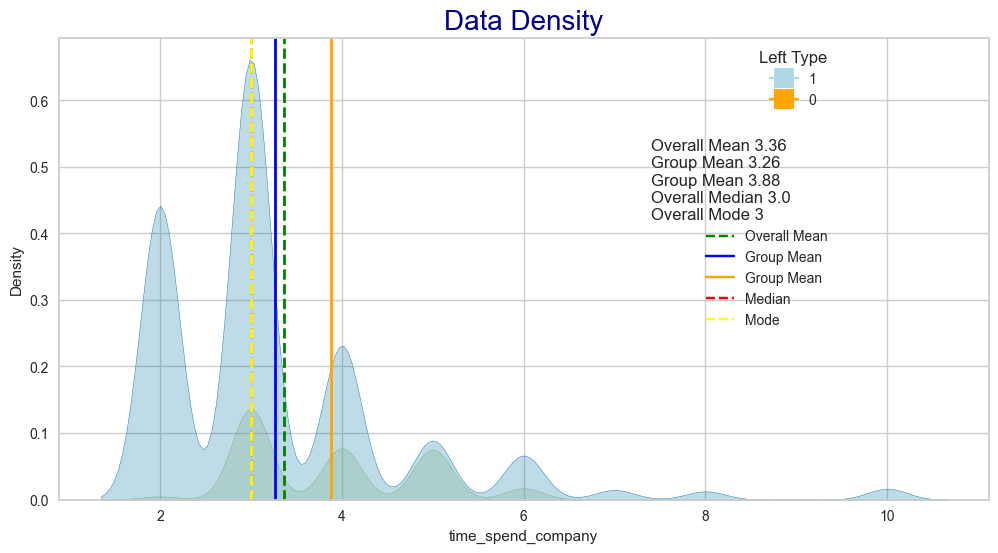

In [70]:
show_compare(df, "time_spend_company", "left")

**General assessment for time_spend_company feature**:

The general tendency is that as the average years of service in a company increase, the turnover rate tends to decrease. Employees who have been with a company for a longer duration are generally more likely to have developed a sense of loyalty, job satisfaction, and a stronger commitment to the organization. They may have established relationships, acquired valuable skills, and achieved career progression within the company, which can contribute to their retention. 

However, it's important to note that individual circumstances and factors specific to each organization can influence the relationship between average years of service and turnover rate. This is what we notice from the visuals and statistical indicators above. Average years of service is longer for the employees who left the company. In order to have more meaningful insights, the main conditions of the company and the sector in which this company operates should be examined more. In such a case there are many questions to be asked, such as:

- Is the competition for the existing labour force in the market high?
- Do the other companies follow a strategy to attrat the employees of rival companies?
- Are the working conditions challenging for the employees emotionally and physically?

### See the relationship between each numeric features by target feature (left) in one plot basically

A pairplot plot a pairwise relationships in a dataset.

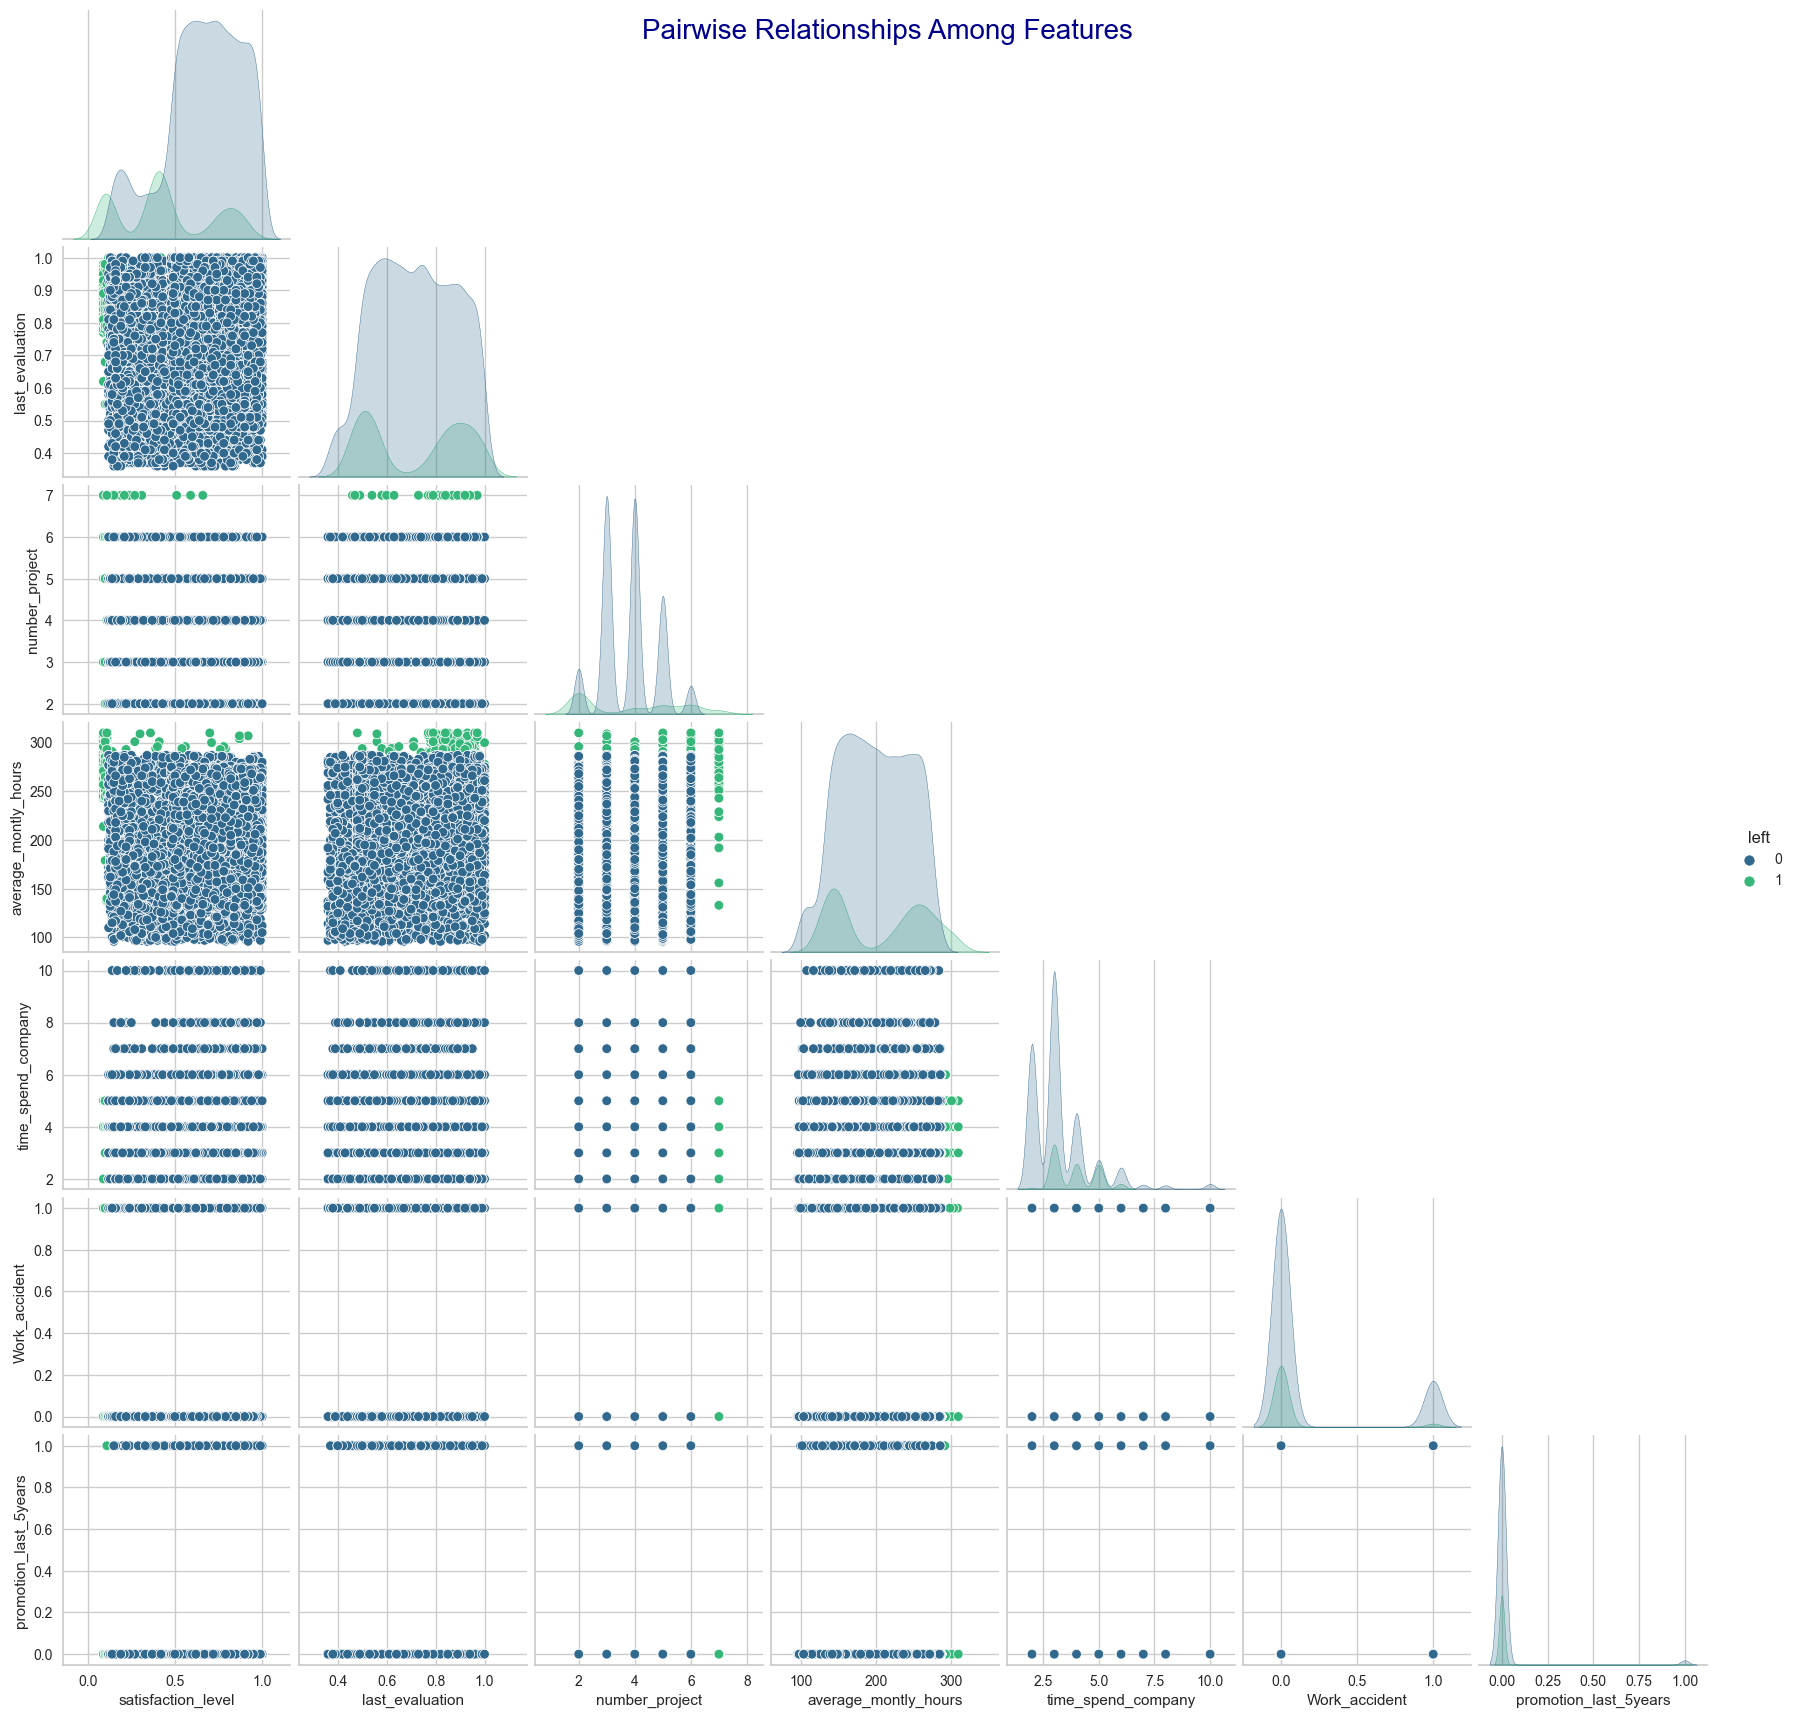

In [71]:
g = sns.pairplot(df, hue="left", palette="viridis", corner=True)

g.fig.suptitle("Pairwise Relationships Among Features for each Class", fontsize=20, color='darkblue');            

### Categorical Features

In [72]:
df.sample(1)

satisfaction_level  last_evaluation  number_project   
9193                0.63             0.51               3  \

      average_montly_hours  time_spend_company  Work_accident   
9193                   126                   6              0  \

      promotion_last_5years Departments  salary  left  
9193                      0    technical    low     0

#### departments

In [73]:
df.rename(columns={'Departments ':'departments'}, inplace = True)

In [74]:
# Checking the uniques of "departments" feature and determining their numbers

df.departments.value_counts(dropna=False)

departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

**Visualize the count of person in departments**

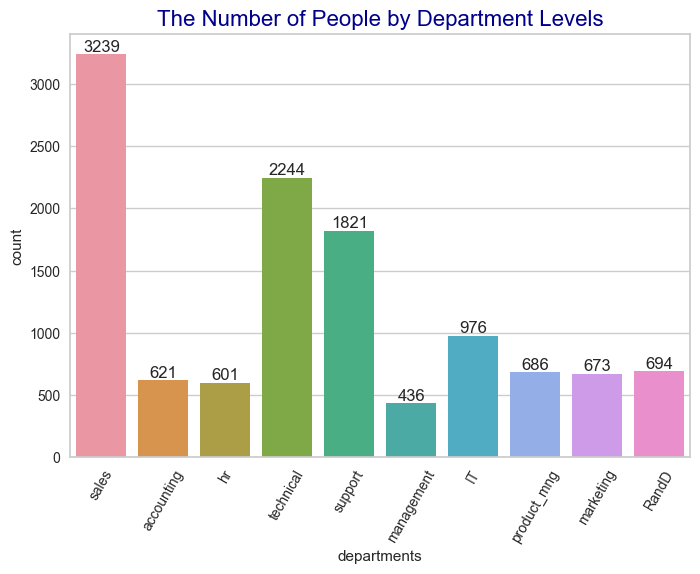

In [75]:
# Visualization of "departments" feature

ax = sns.countplot(data=df, x="departments")

plt.xticks(rotation=60)

plt.title("The Number of Employees for each Department:\n Sales, technic and support \
are the departments with most employees", fontsize=14, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "left" levels by departments and visualize them with countplot**

In [76]:
# Checking "departments" feature by left in detail 

df.groupby("departments").left.value_counts()

departments  left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: count, dtype: int64

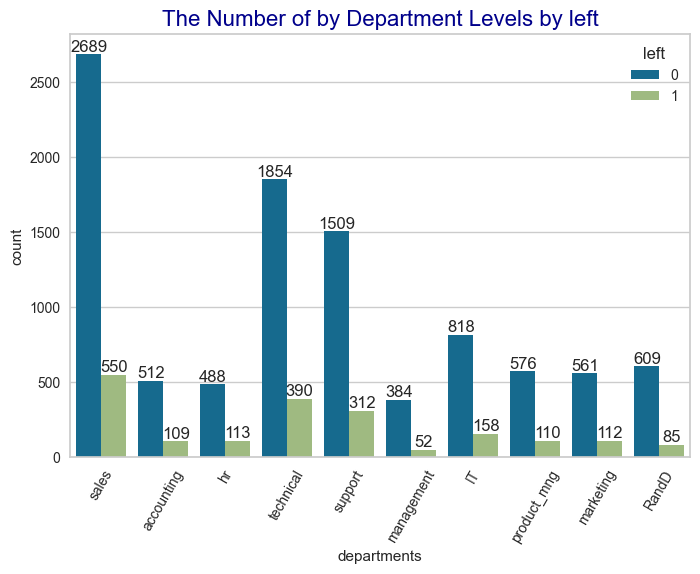

In [77]:
# Visualizing the number of people in each "departments" level by left

ax = sns.countplot(data=df, x="departments", hue="left")

plt.title("Departments for each class:\n As the department gets bigger the number of \
quitters increase too", fontsize=14, color="darkblue")

plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "left" levels by departments and visualize it with pie plot separately**

In [78]:
# The Proportional Distribution of persons in each sub-categories of "departments" by left

edu = df.groupby(["departments"]).left.value_counts(normalize=True)
edu

departments  left
IT           0       0.838115
             1       0.161885
RandD        0       0.877522
             1       0.122478
accounting   0       0.824477
             1       0.175523
hr           0       0.811980
             1       0.188020
management   0       0.880734
             1       0.119266
marketing    0       0.833581
             1       0.166419
product_mng  0       0.839650
             1       0.160350
sales        0       0.830195
             1       0.169805
support      0       0.828666
             1       0.171334
technical    0       0.826203
             1       0.173797
Name: proportion, dtype: float64

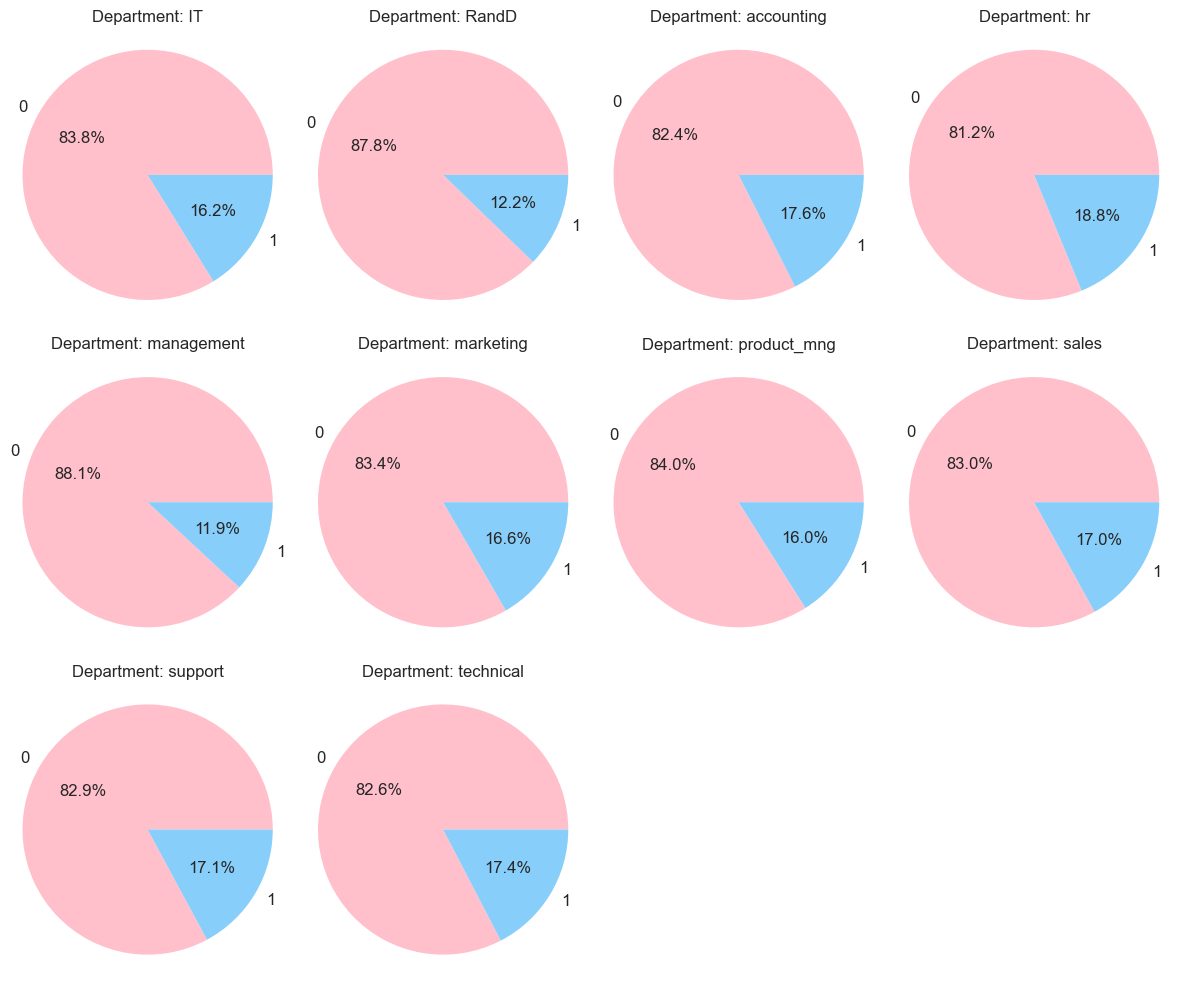

In [79]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["departments"]).left.value_counts(normalize=True)

# Calculate the number of departments
num_departments = len(grouped_data.index.levels[0])

# Calculate the number of rows and columns in the grid
num_columns = 4
num_rows = (num_departments + num_columns - 1) // num_columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 10))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Iterate over each department
for i, department in enumerate(grouped_data.index.levels[0]):
    # Filter data for the current department
    department_data = grouped_data[department]
    
    # Create a pie plot in the corresponding subplot
    axes[i].pie(department_data, labels=department_data.index, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=['pink', 'lightskyblue'],)
    axes[i].set_title(f"Department: {department}")
    axes[i].axis('equal')  # Equal aspect ratio ensures a circular pie

# Hide any remaining empty subplots
for j in range(num_departments, num_rows * num_columns):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the pie plots
plt.show()


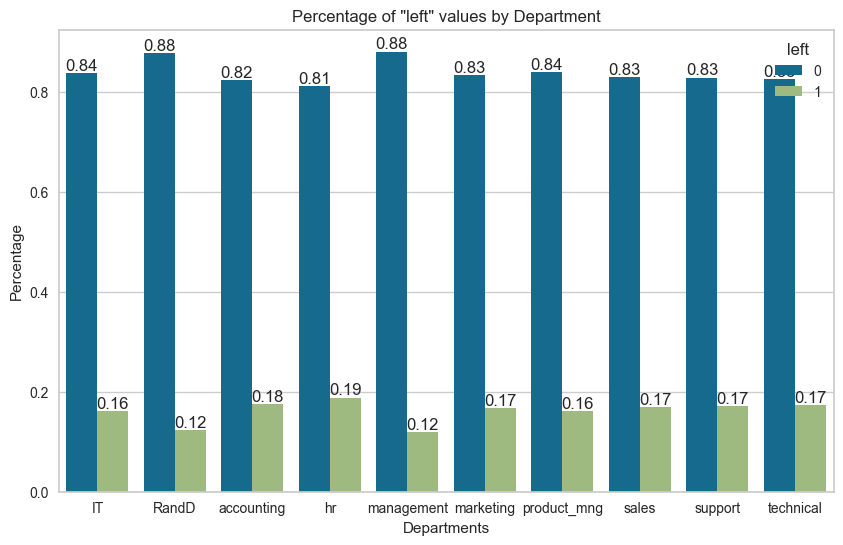

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["departments"]).left.value_counts(normalize=True)

# Reset the index to convert the grouped series to a DataFrame
grouped_data = grouped_data.reset_index(name='percentage')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='departments', y='percentage', hue='left')
plt.xlabel('Departments')
plt.ylabel('Percentage')
plt.title('Percentage of "left" values for each department:\n HR and Accounting \
versus RandN and Management', fontdict={"color":"red"})
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.bar_label(ax.containers[1], fmt='%.2f')

# Show the bar plot
plt.show();


**Check the the percentage distribution of person in each department by "left" levels and visualize it with bar plot**

In [81]:
# Checking the percentage of persons at "department" by "left" levels 

department = df.groupby("left").departments.value_counts(normalize=True)*100
department

left  departments
0     sales          26.890000
      technical      18.540000
      support        15.090000
      IT              8.180000
      RandD           6.090000
      product_mng     5.760000
      marketing       5.610000
      accounting      5.120000
      hr              4.880000
      management      3.840000
1     sales          27.624309
      technical      19.588147
      support        15.670517
      IT              7.935711
      hr              5.675540
      marketing       5.625314
      product_mng     5.524862
      accounting      5.474636
      RandD           4.269211
      management      2.611753
Name: proportion, dtype: float64

In [82]:
# Creating a dataframe demonstrating the percentage of persons at "department" by "left" levels 

department_df = pd.DataFrame(department)
department_df.rename(columns={"proportion": "percentage"}, inplace=True)
department_df.reset_index(inplace=True)
department_df.sort_values(by=["left", "departments"], inplace=True)
department_df

left  departments  percentage
3      0           IT    8.180000
4      0        RandD    6.090000
7      0   accounting    5.120000
8      0           hr    4.880000
9      0   management    3.840000
6      0    marketing    5.610000
5      0  product_mng    5.760000
0      0        sales   26.890000
2      0      support   15.090000
1      0    technical   18.540000
13     1           IT    7.935711
18     1        RandD    4.269211
17     1   accounting    5.474636
14     1           hr    5.675540
19     1   management    2.611753
15     1    marketing    5.625314
16     1  product_mng    5.524862
10     1        sales   27.624309
12     1      support   15.670517
11     1    technical   19.588147

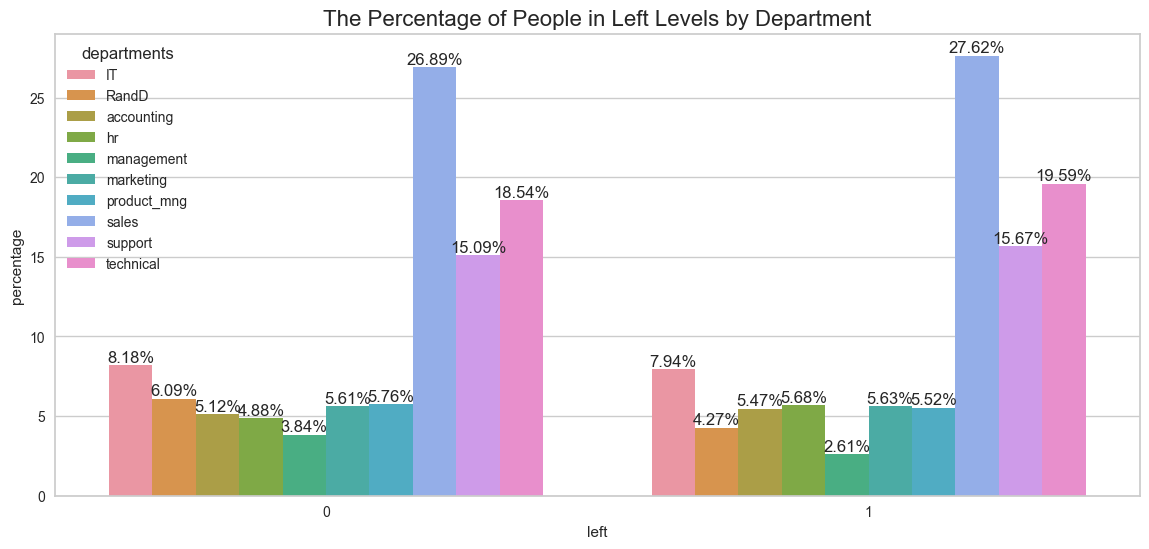

In [83]:
# Visualizing the percentage of persons at "department" by "left" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=department_df, x="left", y="percentage", hue="departments")

plt.title("Percentage breakdown of employees for each department:\n Ca. 7 out of every 10 departing \
employees are from technical, sales, and support", fontsize=14, 
          fontdict={"color":"red"});

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

**A genaral assessment for the Departments feature**:

As seen, tecnhical, sales and support departments have the highest numbers of churned employees. This means that the company should adopt some specific strategies for these departments to decrease the employee turnover rate.  Accordingly, the company can consider the following department-specific strategies:

**Sales Department:**

- Provide comprehensive sales training programs to enhance skills and confidence.
- Offer competitive commission structures or incentive programs to motivate and retain top-performing sales professionals.
- Implement regular performance evaluations and feedback sessions to identify areas of improvement and provide guidance for career growth.

**Technical Department**:

- Foster a culture of innovation and continuous learning to keep technical employees engaged and challenged.
- Provide opportunities for professional development, such as attending conferences or workshops, to enhance technical skills.
- Encourage cross-functional collaboration and provide opportunities for technical employees to work on diverse projects to keep them motivated.

**Support Department**:

- Ensure adequate staffing levels to manage workload effectively and prevent burnout.
- Implement regular training programs to enhance customer service and problem-solving skills.
- Foster a supportive and collaborative environment within the department to encourage knowledge sharing and teamwork.

**Accounting Department**:

- Provide opportunities for career advancement and professional certifications in accounting and finance.
- Implement flexible work arrangements to promote work-life balance, as accounting roles often involve strict deadlines and long hours.
- Recognize and appreciate the contributions of accounting professionals through regular feedback and rewards.

By tailoring strategies to address the specific needs and challenges of each department, the company can create a more targeted approach to decreasing turnover rates. It is essential to involve department managers and employees in the process to gain their input and support for the initiatives implemented.

#### salary

In [84]:
# Checking the uniques of "salary" feature and determining their numbers 

df.salary.value_counts(dropna=False)

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

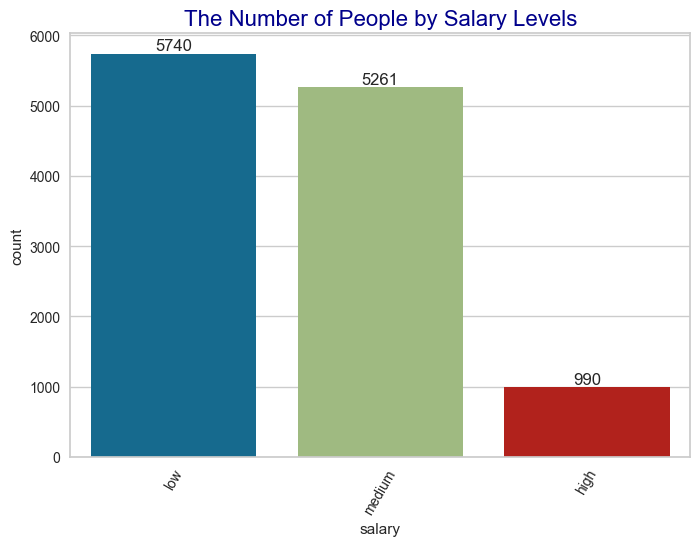

In [85]:
# Visualization of "salary" feature

ax = sns.countplot(data=df, x="salary")

plt.xticks(rotation=60)

plt.title("Distribution of Employees by Salary Levels:\n Almost half of the employees earn 'low' salaries", 
          fontsize=14, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "left" levels by salary and visualize them with countplot**

In [86]:
# Checking "salary" feature by left in detail 

df.groupby("salary").left.value_counts()

salary  left
high    0        942
        1         48
low     0       4566
        1       1174
medium  0       4492
        1        769
Name: count, dtype: int64

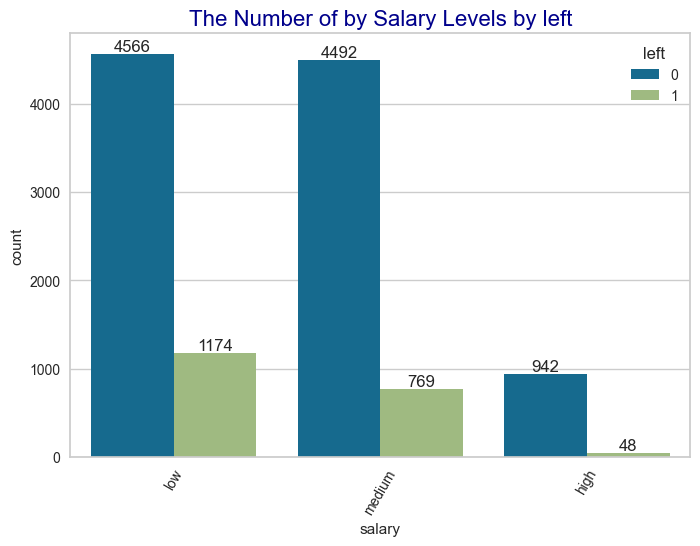

In [87]:
# Visualizing the number of people in each "salary" level by left

ax = sns.countplot(data=df, x="salary", hue="left")

plt.title("Distribution of Employees by Salary Levels for each Class:\n Lower salary = Higher Turnover", 
          fontsize=14, color="red")

plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "left" levels by salary and visualize it with pie plot separately**

In [88]:
# The Proportional Distribution of persons in each sub-categories of "salary" by left

edu = df.groupby(["salary"]).left.value_counts(normalize=True)
edu

salary  left
high    0       0.951515
        1       0.048485
low     0       0.795470
        1       0.204530
medium  0       0.853830
        1       0.146170
Name: proportion, dtype: float64

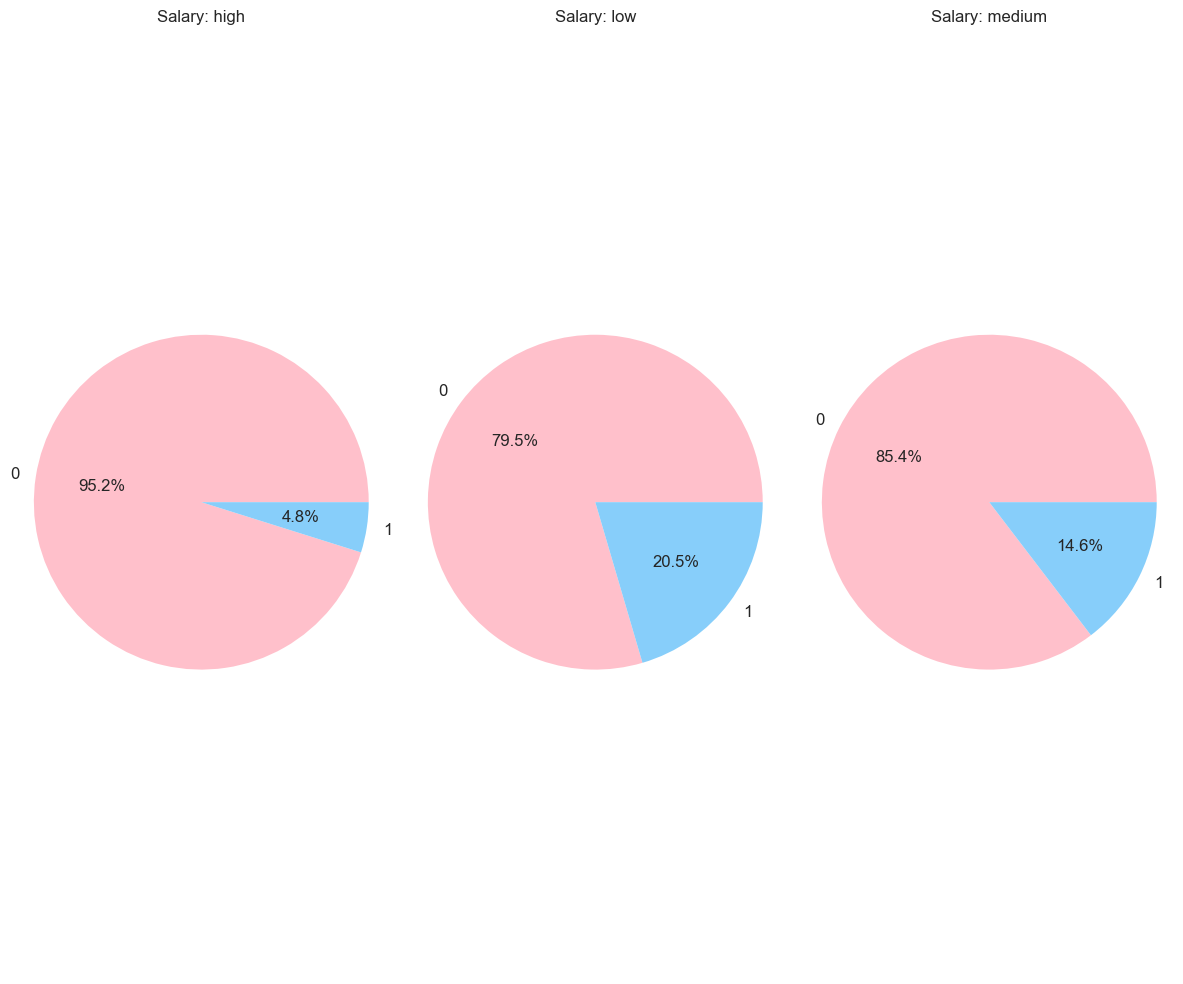

In [89]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["salary"]).left.value_counts(normalize=True)

# Calculate the number of salary
num_salary = len(grouped_data.index.levels[0])

# Calculate the number of rows and columns in the grid
num_columns = 3
num_rows = (num_salary + num_columns - 1) // num_columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 10))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Iterate over each department
for i, department in enumerate(grouped_data.index.levels[0]):
    # Filter data for the current department
    department_data = grouped_data[department]
    
    # Create a pie plot in the corresponding subplot
    axes[i].pie(department_data, labels=department_data.index, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=['pink', 'lightskyblue'],)
    axes[i].set_title(f"Salary: {department}")
    axes[i].axis('equal')  # Equal aspect ratio ensures a circular pie

# Hide any remaining empty subplots
for j in range(num_salary, num_rows * num_columns):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the pie plots
plt.show()


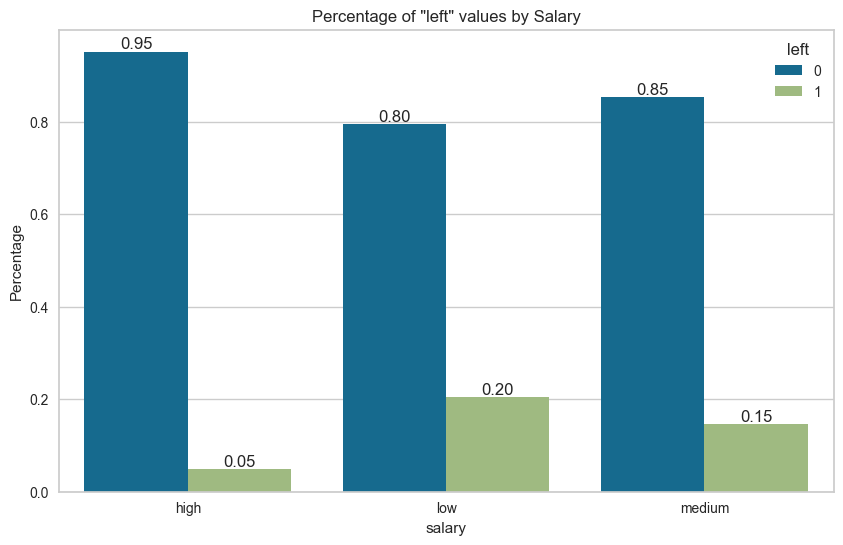

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["salary"]).left.value_counts(normalize=True)

# Reset the index to convert the grouped series to a DataFrame
grouped_data = grouped_data.reset_index(name='percentage')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='salary', y='percentage', hue='left')
plt.xlabel('salary')
plt.ylabel('Percentage')
plt.title('Percentage of "left" values by Salary:\n One out of every five employees with low salaries leaves \
their job', fontsize=14, color="red")
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.bar_label(ax.containers[1], fmt='%.2f')

# Show the bar plot
plt.show();


**Check the the percentage distribution of person in each salary by "left" levels and visualize it with bar plot**

In [91]:
# Checking the percentage of persons at "salary" by "left" levels 

salary = df.groupby("left").salary.value_counts(normalize=True)*100
salary

left  salary
0     low       45.660000
      medium    44.920000
      high       9.420000
1     low       58.965344
      medium    38.623807
      high       2.410849
Name: proportion, dtype: float64

In [92]:
# Creating a dataframe demonstrating the percentage of persons at "salary" by "left" levels 

salary_df = pd.DataFrame(salary)
salary_df.rename(columns={"proportion": "percentage"}, inplace=True)
salary_df.reset_index(inplace=True)
salary_df.sort_values(by=["left", "salary"], inplace=True)
salary_df 

left  salary  percentage
2     0    high    9.420000
0     0     low   45.660000
1     0  medium   44.920000
5     1    high    2.410849
3     1     low   58.965344
4     1  medium   38.623807

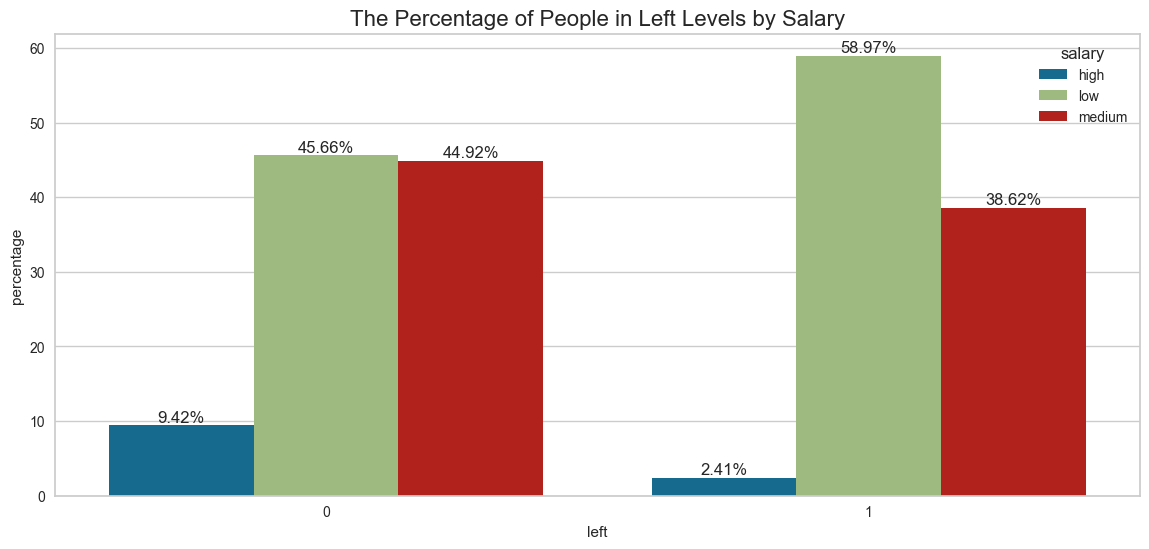

In [93]:
# Visualizing the percentage of persons at "salary" by "left" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=salary_df, x="left", y="percentage", hue="salary")

plt.title("Distribution of Employees for each class by salary levels:\n Almost 60% of quitters \
are from low salary group", fontsize=14, color="red");

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

**General Assessment for Salary**:

Salary is an important factor in an employee's decision to leave a job. Compensation plays a significant role in job satisfaction and overall employee motivation. If an employee feels that their salary is not competitive or does not align with their skills, experience, or the market value for their role, it can lead to dissatisfaction and a higher likelihood of considering other job opportunities. Adequate and fair compensation is crucial in attracting and retaining talented employees and reducing turnover rates. As seen from the visuals and statistical measures above, most of the quitters are from low salary group. As the salary level increases, turnover rates decreases for this company.

#### Work_accident

In [94]:
# Checking the uniques of "Work_accident" feature and determining their numbers

df.Work_accident.value_counts(dropna=False)

Work_accident
0    10141
1     1850
Name: count, dtype: int64

**Visualize the count of person in Work_accident**

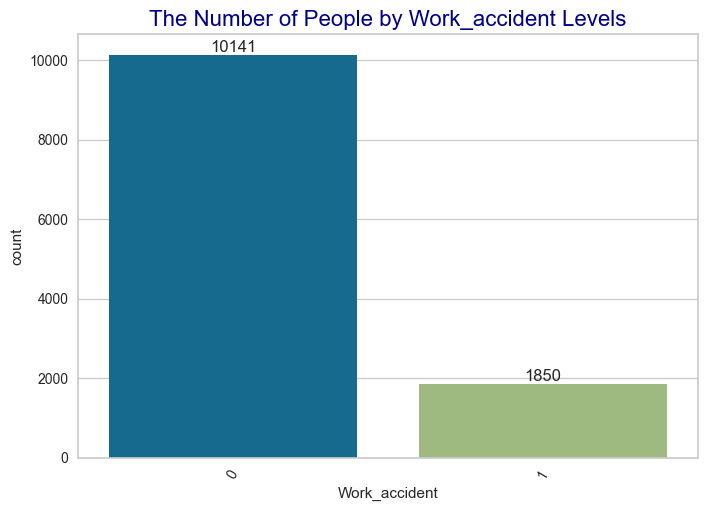

In [95]:
# Visualization of "Work_accident" feature

ax = sns.countplot(data=df, x="Work_accident")

plt.xticks(rotation=60)

plt.title("Number of Employees by Work_accident Levels", fontsize=14, color="red")

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "left" levels by Work_accident and visualize them with countplot**

In [96]:
# Checking "Work_accident" feature by left in detail 

df.groupby("Work_accident").left.value_counts()

Work_accident  left
0              0       8255
               1       1886
1              0       1745
               1        105
Name: count, dtype: int64

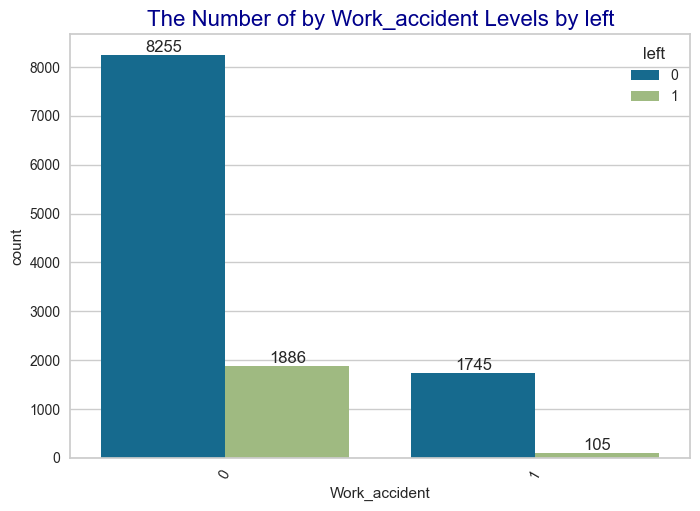

In [97]:
# Visualizing the number of people in each "Work_accident" level by left

ax = sns.countplot(data=df, x="Work_accident", hue="left")

plt.title("Number of Employees by Work_accident Levels for each class:\n Turnover is not higher for the class 1", fontsize=14, color="red")

plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "left" levels by Work_accident and visualize it with pie plot separately**

In [98]:
# The Proportional Distribution of persons in each sub-categories of "Work_accident" by left

edu = df.groupby(["Work_accident"]).left.value_counts(normalize=True)
edu

Work_accident  left
0              0       0.814022
               1       0.185978
1              0       0.943243
               1       0.056757
Name: proportion, dtype: float64

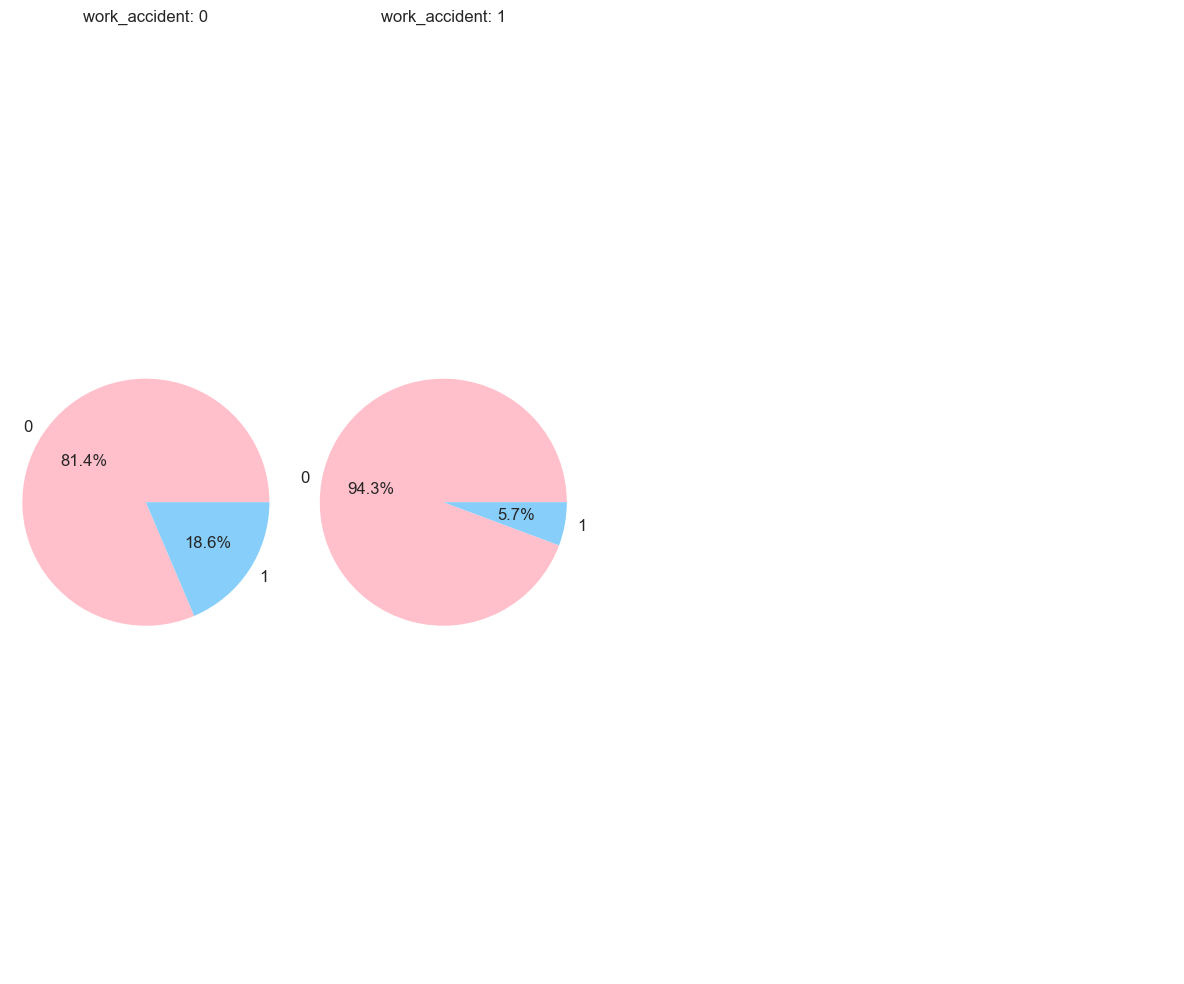

In [99]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["Work_accident"]).left.value_counts(normalize=True)

# Calculate the number of Work_accident
num_Work_accident = len(grouped_data.index.levels[0])

# Calculate the number of rows and columns in the grid
num_columns = 4
num_rows = (num_Work_accident + num_columns - 1) // num_columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 10))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Iterate over each work_accident
for i, work_accident in enumerate(grouped_data.index.levels[0]):
    # Filter data for the current work_accident
    work_accident_data = grouped_data[work_accident]
    
    # Create a pie plot in the corresponding subplot
    axes[i].pie(work_accident_data, labels=work_accident_data.index, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=['pink', 'lightskyblue'],)
    axes[i].set_title(f"work_accident: {work_accident}")
    axes[i].axis('equal')  # Equal aspect ratio ensures a circular pie

# Hide any remaining empty subplots
for j in range(num_Work_accident, num_rows * num_columns):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the pie plots
plt.show()


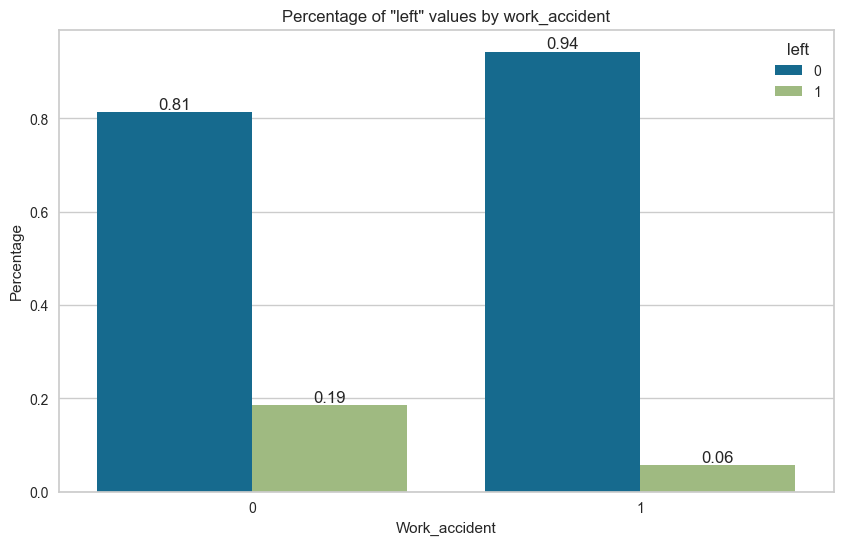

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["Work_accident"]).left.value_counts(normalize=True)

# Reset the index to convert the grouped series to a DataFrame
grouped_data = grouped_data.reset_index(name='percentage')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Work_accident', y='percentage', hue='left')
plt.xlabel('Work_accident')
plt.ylabel('Percentage')
plt.title('Percentage of employees by work_accident for each class:\n Work accidents are not \
the crucial determinant of job leavings', fontsize=14, color="red")
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.bar_label(ax.containers[1], fmt='%.2f')

# Show the bar plot
plt.show();


**Check the the percentage distribution of person in each work_accident by "left" levels and visualize it with bar plot**

In [101]:
# Checking the percentage of persons at "work_accident" by "left" levels 

work_accident = df.groupby("left").Work_accident.value_counts(normalize=True)*100
work_accident

left  Work_accident
0     0                82.550000
      1                17.450000
1     0                94.726268
      1                 5.273732
Name: proportion, dtype: float64

In [102]:
# Creating a dataframe demonstrating the percentage of persons at "work_accident" by "left" levels 

work_accident_df = pd.DataFrame(work_accident)
work_accident_df.rename(columns={"proportion": "percentage"}, inplace=True)
work_accident_df.reset_index(inplace=True)
work_accident_df.sort_values(by=["left", "Work_accident"], inplace=True)
work_accident_df

left  Work_accident  percentage
0     0              0   82.550000
1     0              1   17.450000
2     1              0   94.726268
3     1              1    5.273732

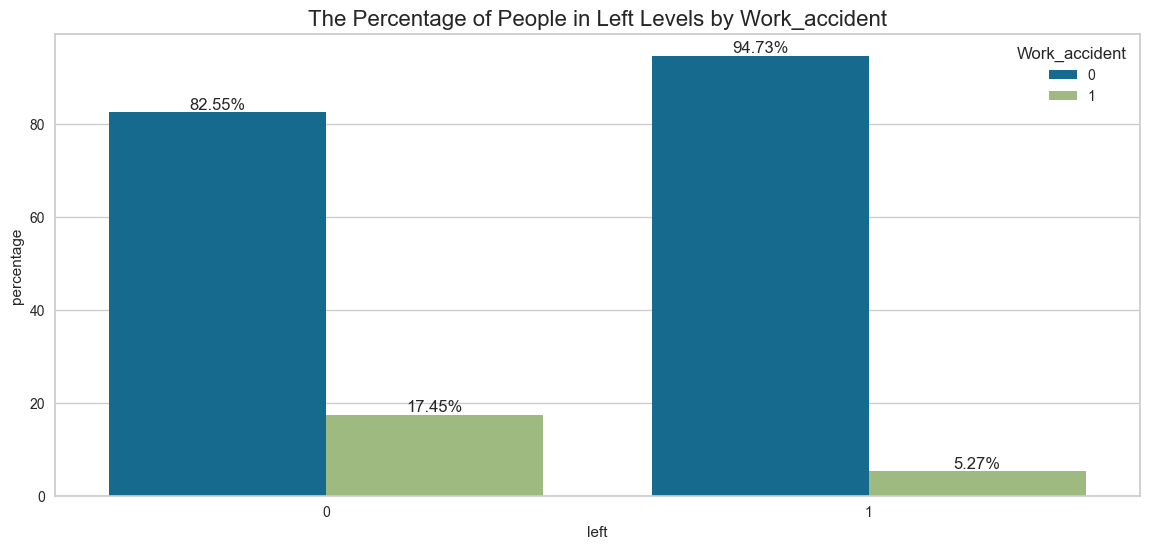

In [103]:
# Visualizing the percentage of persons at "Work_accident" by "left" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=work_accident_df, x="left", y="percentage", hue="Work_accident")

plt.title("Distribution of Employees for each Left Level by Work_accident feature:\n One out \
of ca 5 employees who still works has suffered from work accident at least once", fontsize=14, color="red");

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

**General assessment for work accident feature**:

The average work accident level for white-collar jobs tends to be relatively lower compared to jobs that involve manual labor or physical tasks. White-collar jobs typically involve office-based work, administrative tasks, or professional services that do not pose the same level of physical risk as jobs in industries such as construction, manufacturing, or transportation. While there may still be potential hazards in white-collar workplaces, such as ergonomic issues, slips, trips, and falls, or exposure to certain substances, the overall risk of work accidents is generally lower. White-collar workers typically have a lower likelihood of sustaining severe injuries or accidents related to heavy machinery, hazardous materials, or physically demanding tasks.

In case of this data, it can be seen that the work accidents are pretty high (1850 out of ca 12k). Nevertheless, it is interesting that the most of the employees, both in number and ratio, who suffered from work accidents are fromamong the employees who did not leave the job and still continue working. There can be several factors underlying this fact. Here are some potential reasons:

- **Employee Loyalty**: Some employees may have a strong sense of loyalty towards their job or the company they work for. Despite experiencing a work accident, they may choose to continue working, believing that the incident was an isolated occurrence or that the company will take steps to improve safety measures.

- **Financial Considerations**: The financial implications of leaving a job after a work accident can be a significant factor. Employees may hesitate to quit their job if they rely on their income to support themselves or their families. They may be concerned about finding a new job with similar compensation or benefits, particularly if they have ongoing medical expenses resulting from the work accident.

- **Job Market Concerns**: Employees may perceive limited job opportunities or increased competition in the job market, which could deter them from leaving their current position, even after experiencing a work accident. This concern may be particularly relevant if the employees believe that the work accident was an isolated incident and that their current job still offers long-term stability.

- **Supportive Work Environment**: If the employees feel that their employer is supportive and takes appropriate actions to address the work accident, they may be more inclined to continue working. This could involve providing medical assistance, implementing safety improvements, or offering compensation for any damages or losses incurred.

- **Personal Attachment or Career Prospects**: Employees may have a personal attachment to their job or career prospects within the company that outweigh their concerns about the work accident. They may have invested significant time and effort into their position and see potential for growth or advancement in the future.

It's important to note that individual motivations and circumstances can vary, and these factors are just some potential explanations. Further analysis and investigation for this company, including employee surveys or interviews, can provide deeper insights into the reasons why employees choose to continue working despite experiencing work accidents.

#### promotion_last_5years

In [104]:
# Checking the uniques of "promotion_last_5years" feature and determining their numbers

df.promotion_last_5years.value_counts(dropna=False)

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

**Visualize the count of person in promotion_last_5years**

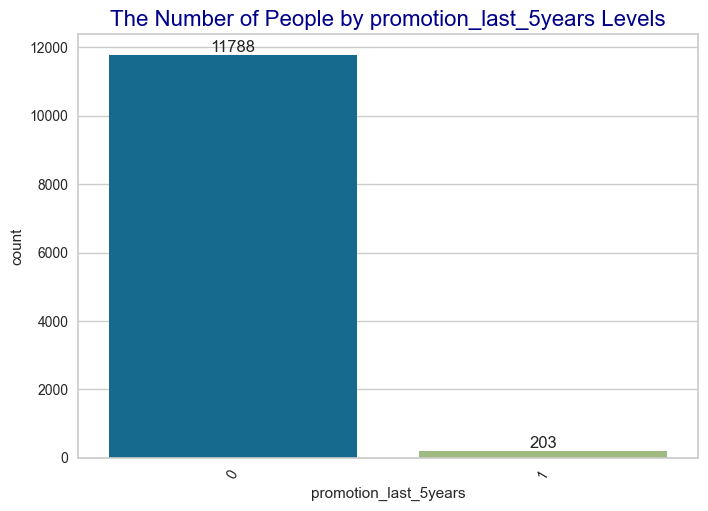

In [105]:
# Visualization of "promotion_last_5years" feature

ax = sns.countplot(data=df, x="promotion_last_5years")

plt.xticks(rotation=60)

plt.title("Number of People promoted:\n Only a small minority could get promotion \
in last 5 years", fontsize=14, color="red")

for container in ax.containers:
    ax.bar_label(container);

**Check the count of person in each "left" levels by promotion_last_5years and visualize them with countplot**

In [106]:
# Checking "promotion_last_5years" feature by left in detail 

df.groupby("promotion_last_5years").left.value_counts()

promotion_last_5years  left
0                      0       9805
                       1       1983
1                      0        195
                       1          8
Name: count, dtype: int64

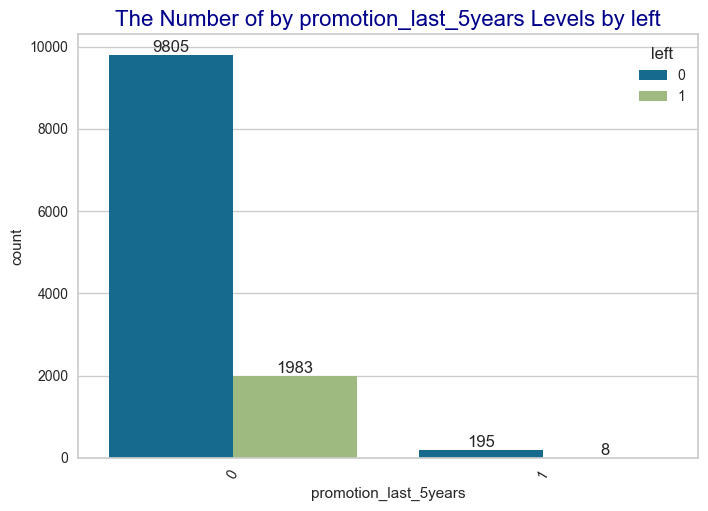

In [107]:
# Visualizing the number of people in each "promotion_last_5years" level by left

ax = sns.countplot(data=df, x="promotion_last_5years", hue="left")

plt.title("Number of employees for each promotion group by target classes", fontsize=14, color="red")

plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

**Check the percentage distribution of person in each "left" levels by promotion_last_5years and visualize it with pie plot separately**

In [108]:
# The Proportional Distribution of persons in each sub-categories of "promotion_last_5years" by left

edu = df.groupby(["promotion_last_5years"]).left.value_counts(normalize=True)
edu

promotion_last_5years  left
0                      0       0.831778
                       1       0.168222
1                      0       0.960591
                       1       0.039409
Name: proportion, dtype: float64

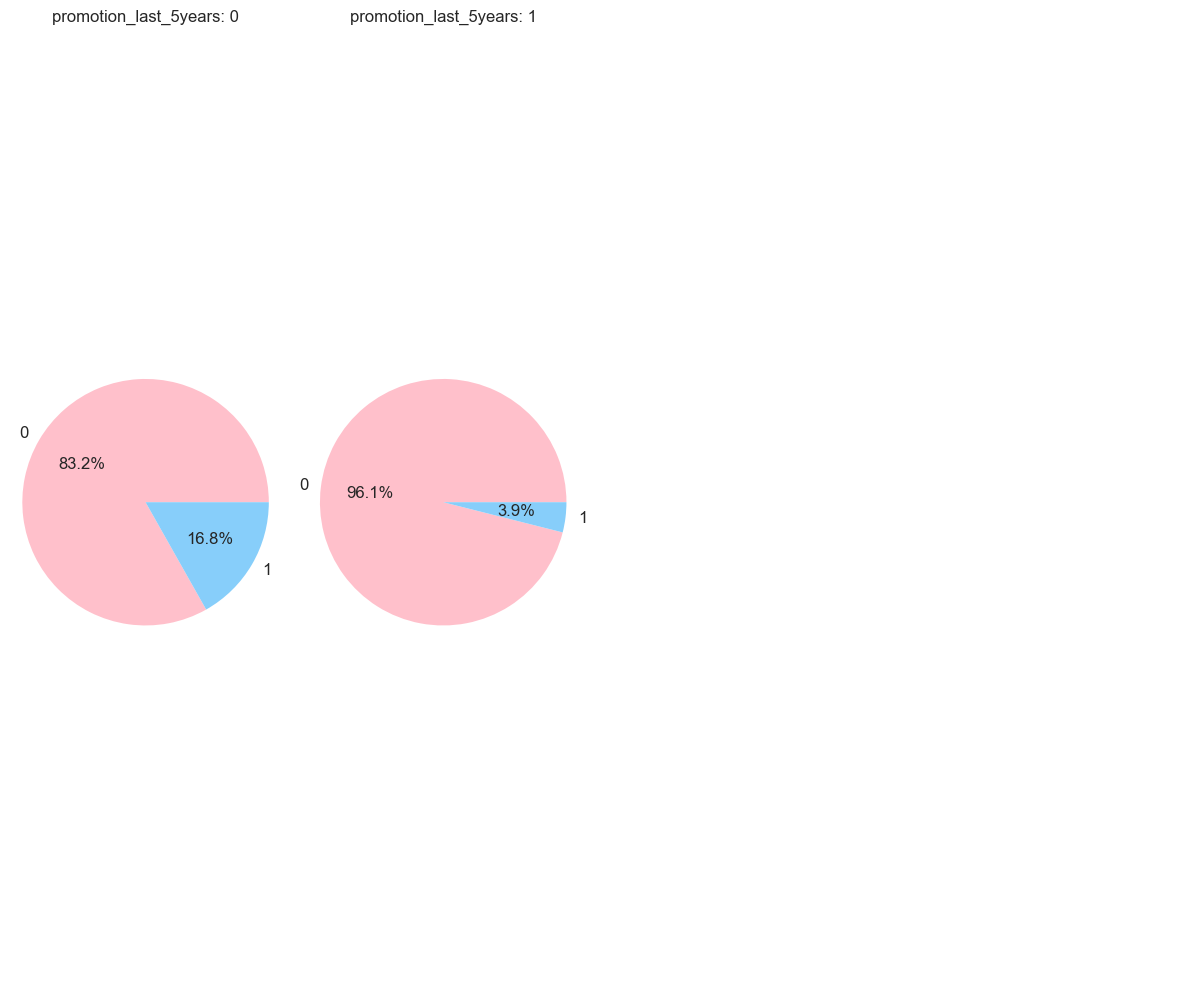

In [109]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["promotion_last_5years"]).left.value_counts(normalize=True)

# Calculate the number of promotion_last_5years
num_promotion_last_5years = len(grouped_data.index.levels[0])

# Calculate the number of rows and columns in the grid
num_columns = 4
num_rows = (num_promotion_last_5years + num_columns - 1) // num_columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 10))

# Flatten the axes array to simplify iteration
axes = axes.flatten()

# Iterate over each promotion_last_5years
for i, promotion_last_5years in enumerate(grouped_data.index.levels[0]):
    # Filter data for the current promotion_last_5years
    promotion_last_5years_data = grouped_data[promotion_last_5years]
    
    # Create a pie plot in the corresponding subplot
    axes[i].pie(promotion_last_5years_data, labels=promotion_last_5years_data.index, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=['pink', 'lightskyblue'],)
    axes[i].set_title(f"promotion_last_5years: {promotion_last_5years}")
    axes[i].axis('equal')  # Equal aspect ratio ensures a circular pie

# Hide any remaining empty subplots
for j in range(num_promotion_last_5years, num_rows * num_columns):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the pie plots
plt.show()


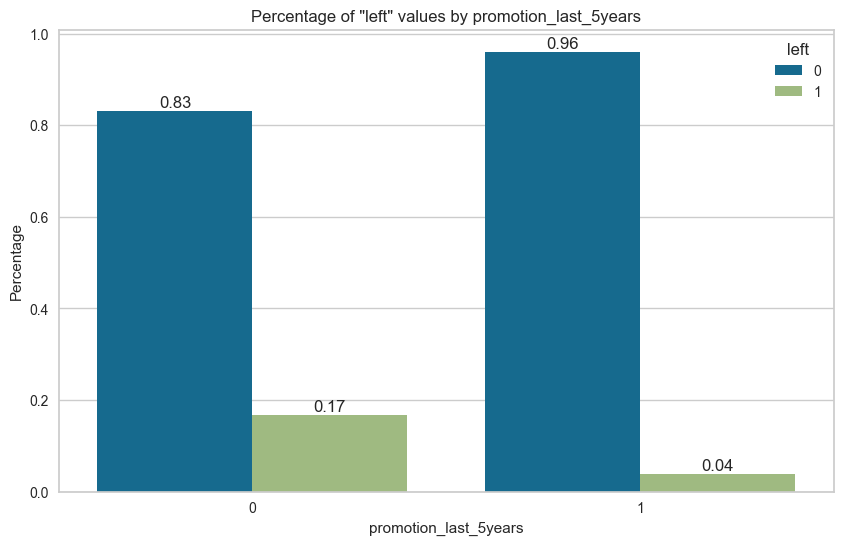

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(["promotion_last_5years"]).left.value_counts(normalize=True)

# Reset the index to convert the grouped series to a DataFrame
grouped_data = grouped_data.reset_index(name='percentage')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='promotion_last_5years', y='percentage', hue='left')
plt.xlabel('promotion_last_5years')
plt.ylabel('Percentage')
plt.title('Percentage of "left" values by promotion_last_5years:\n Promoted Employees leave the job less', 
          fontsize=14, color="red")
plt.bar_label(ax.containers[0], fmt='%.2f')
plt.bar_label(ax.containers[1], fmt='%.2f')

# Show the bar plot
plt.show();


**Check the the percentage distribution of person in each promotion_last_5years by "left" levels and visualize it with bar plot**

In [111]:
# Checking the percentage of persons at "promotion_last_5years" by "left" levels 

promotion_last_5years = df.groupby("left").promotion_last_5years.value_counts(normalize=True)*100
promotion_last_5years

left  promotion_last_5years
0     0                        98.050000
      1                         1.950000
1     0                        99.598192
      1                         0.401808
Name: proportion, dtype: float64

In [112]:
# Creating a dataframe demonstrating the percentage of persons at "promotion_last_5years" by "left" levels 

promotion_last_5years_df = pd.DataFrame(promotion_last_5years)
promotion_last_5years_df.rename(columns={"proportion": "percentage"}, inplace=True)
promotion_last_5years_df.reset_index(inplace=True)
promotion_last_5years_df.sort_values(by=["left", "promotion_last_5years"], inplace=True)
promotion_last_5years_df

left  promotion_last_5years  percentage
0     0                      0   98.050000
1     0                      1    1.950000
2     1                      0   99.598192
3     1                      1    0.401808

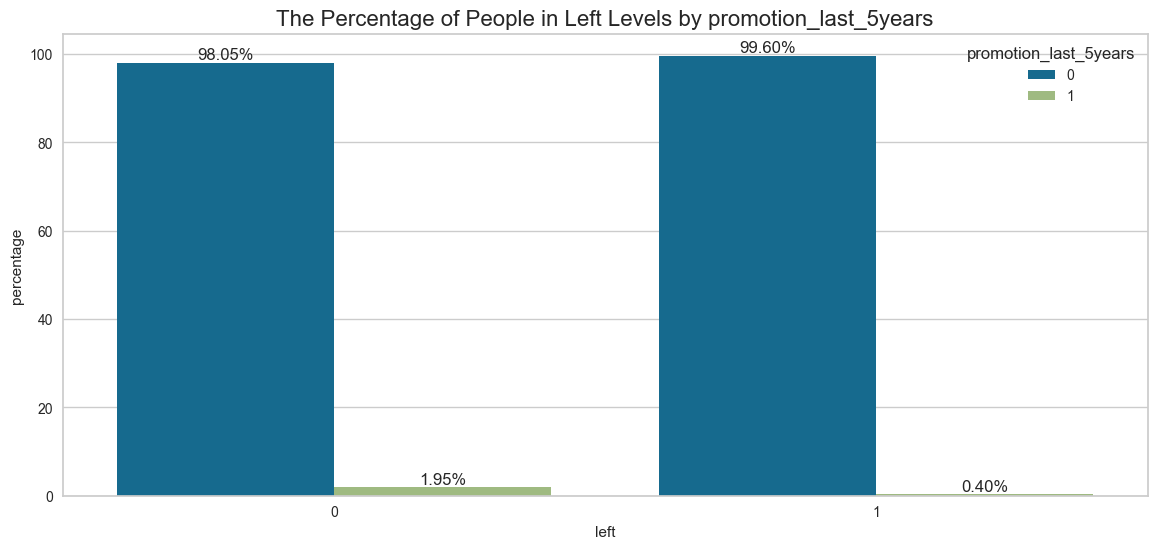

In [113]:
# Visualizing the percentage of persons at "promotion_last_5years" by "left" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=promotion_last_5years_df, x="left", y="percentage", hue="promotion_last_5years")

plt.title("The Percentage of People for target classes by promotion:\n Not a significant determinator \
but there are less promoted employees among the quitters", fontsize=15, color="red");

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

**General assessment of promotion feature**:

Promotions can be an important factor in an employee's decision to stay in or leave a company. There are several underlying reasons for this effect. For example:

- **Career Growth and Development**: Promotions provide employees with opportunities for career advancement and growth within the company. It allows them to take on new responsibilities, learn new skills, and expand their knowledge and experience. Employees who see a clear path for growth and development are more likely to be motivated and engaged in their work, leading to increased job satisfaction and a lower likelihood of leaving the company.

- **Recognition and Rewards**: Promotions often come with increased compensation, benefits, and recognition for the employee's hard work and contributions. Being promoted can signify that their efforts and achievements are valued by the company. This recognition and reward can enhance job satisfaction and increase loyalty towards the organization, reducing the likelihood of seeking employment elsewhere.

- **Increased Responsibility and Authority**: Promotions typically involve higher-level roles with greater responsibility and decision-making authority. Employees who aspire to take on more challenging and impactful roles may see promotions as stepping stones towards their desired career trajectory. Having a sense of autonomy and influence in their work can contribute to job satisfaction and a desire to stay with the company.

- **Competitive Advantage in the Job Market**: Employees who have received promotions and have a track record of career progression are often viewed more favorably in the job market. The promotion demonstrates their capabilities, skills, and potential for future success, making them more attractive to other employers. Offering opportunities for advancement and promoting employees can help companies retain top talent and prevent them from seeking opportunities elsewhere.

- **Motivation and Engagement**: Promotions can serve as motivational factors for employees to perform at their best and strive for excellence. The prospect of advancement and the associated benefits can drive employees to stay committed and engaged in their work. It creates a sense of purpose and challenge that can contribute to job satisfaction and employee retention.

Despite all these advantages of the promotions, as can be seen above, only a couple hundred of employees could get a promotion in this company. Considering that the average working years of employees in this company is only 3, this means that most employees have not worked for a sufficient amount of time to be eligible for promotion. However, on the contrary, if the employees notice that other employees with long service years are not being promoted, they can label the company as an organisation without an accurate promotion policy. This might be a reason for the employees to leave the company in search of better career  opportunities in other companies. For a company with a high turnover rate of around 20%, this second interpretation appears to be more logical.

## Questions and statistical significance tests

In this section of the project, we will attempt to digest the data more by diving into details via some specific questions.The statistical tests such as t test, shapiro,fisher exact or chi-square tests will enable us to check whether the insights we have extrated from the detailed visual analysis above are statistically significant or not.

### What is the distribution of the "left" variable among different categories of the "Work_accident" column?

[Text(0, 0, '1886'), Text(0, 0, '105')]

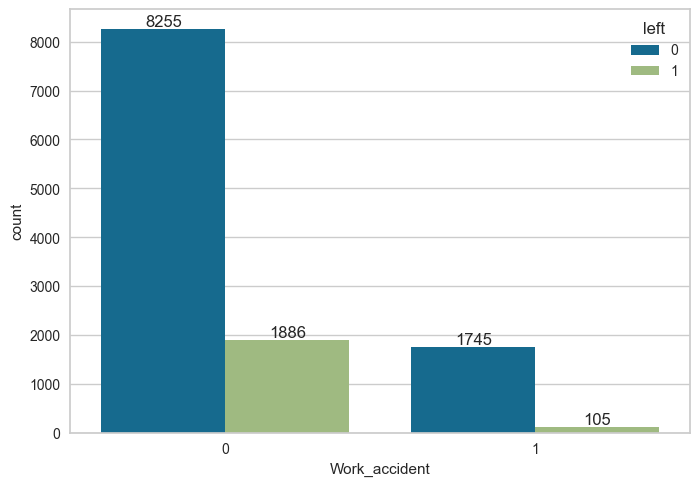

In [114]:
ax = sns.countplot(x='Work_accident', hue='left', data=df)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

### Is there a significant difference in the proportion of employees who left the company based on whether they had a work accident or not?

If the data is imbalanced, it is appropriate to use Fisher's exact test instead of the chi-square test. Fisher's exact test is commonly used when the sample size is small or when the data is imbalanced.

**What is Fisher's Exact test and why is it used?**

The Fisher's exact test is a statistical test used to determine the significance of the association between two categorical variables in a 2x2 contingency table. It is commonly used when the sample size is small or when there are expected cell frequencies below 5.

The Fisher's exact test calculates the probability of obtaining a distribution of data as extreme as the observed data, assuming that the null hypothesis is true (i.e., no association between the variables). If the calculated p-value is below a predetermined significance level (e.g., 0.05), it indicates that the association between the variables is statistically significant.

The Fisher's exact test is particularly useful in situations where other statistical tests, such as the chi-square test, may not be valid due to small sample sizes or low expected cell frequencies. It provides a more accurate assessment of the association between variables in such cases.

In [115]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table of 'Work_accident' and 'left' variables
contingency_table = pd.crosstab(df['Work_accident'], df['left'])

# Perform Fisher's exact test
odds_ratio, p_value = stats.fisher_exact(contingency_table)

# Display the test results
print("Odds ratio:", odds_ratio)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The results are statistically significant at a significance level of", alpha)
    print("There is evidence to suggest a significant difference in the proportion of employees who left the company based on whether they had a work accident or not.")
else:
    print("The results are not statistically significant at a significance level of", alpha)
    print("There is no significant difference in the proportion of employees who left the company based on whether they had a work accident or not.")



Odds ratio: 0.26337179093729396
p-value: 3.594805527537249e-52
The results are statistically significant at a significance level of 0.05
There is evidence to suggest a significant difference in the proportion of employees who left the company based on whether they had a work accident or not.


### What is the distribution of the "left" variable among different categories of the "promotion_last_5years" column?

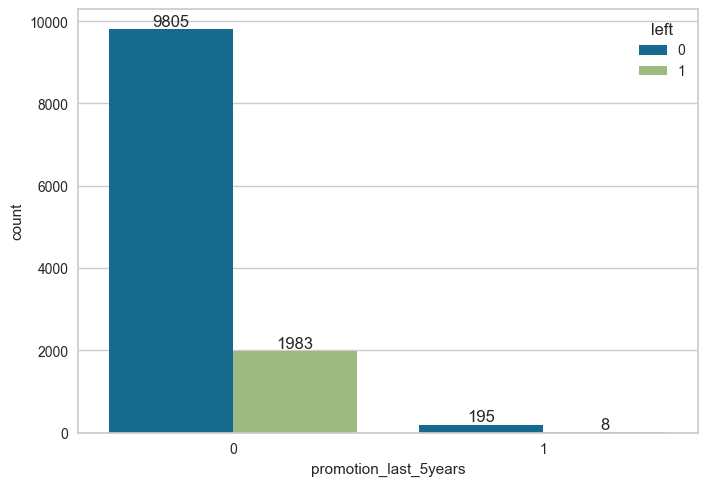

In [116]:
ax = sns.countplot(x='promotion_last_5years', hue='left', data=df)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

### What is the distribution of the "left" variable among different categories of the "time_spend_company" column?

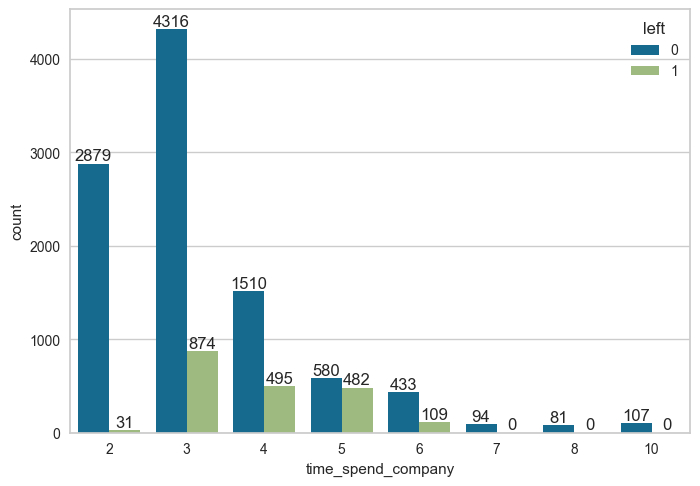

In [117]:
ax = sns.countplot(x='time_spend_company', hue='left', data=df)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

### What is the distribution of the "left" variable among different categories of the "salary" column?

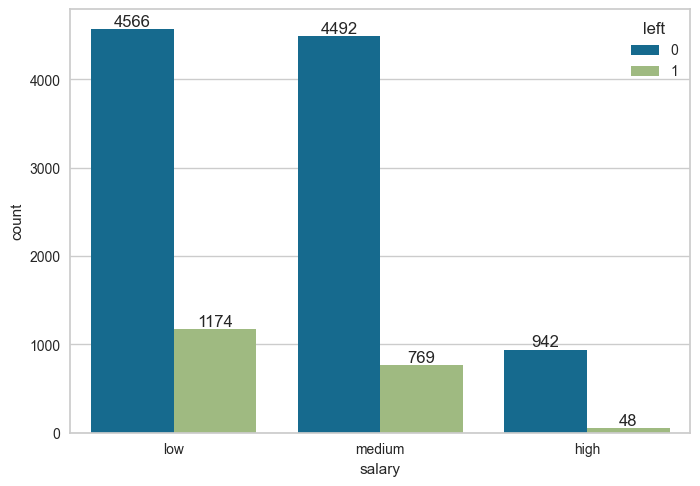

In [118]:
ax = sns.countplot(x='salary', hue='left', data=df)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

### What is the distribution of the "left" variable among different categories of the "number_project" column?

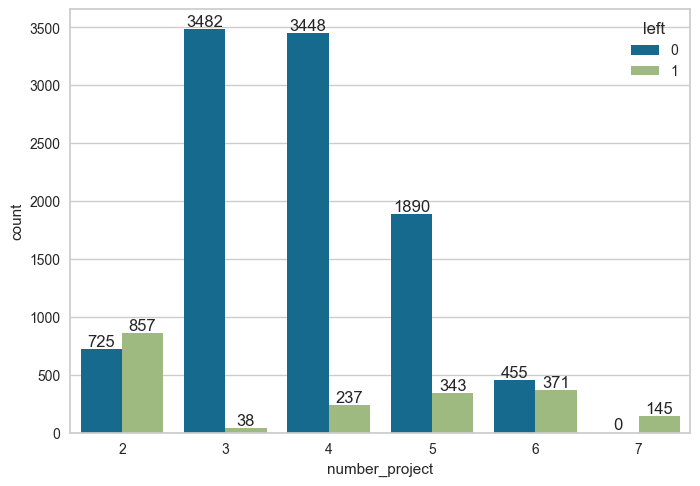

In [119]:
ax = sns.countplot(x='number_project', hue='left', data=df)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1]);

### How is the "left" variable related to the other columns? Are there any significant differences in average values or distributions between employees who left and those who stayed?

In [120]:
df.select_dtypes('number').groupby("left").mean()

satisfaction_level  last_evaluation  number_project   
left                                                        
0               0.667365         0.715667        3.786800  \
1               0.440271         0.721783        3.883476   

      average_montly_hours  time_spend_company  Work_accident   
left                                                            
0                198.94270            3.262000       0.174500  \
1                208.16223            3.881467       0.052737   

      promotion_last_5years  
left                         
0                  0.019500  
1                  0.004018

In [121]:
import pandas as pd
import scipy.stats as stats


# Select numerical columns
numerical_columns = df.select_dtypes('number').columns

# Perform statistical tests for each numerical column
for column in numerical_columns:
    left_values = df[df['left'] == 1][column]
    stayed_values = df[df['left'] == 0][column]
    
    # Perform t-test or Mann-Whitney U test based on data distribution
    if stats.normaltest(df[column])[1] < 0.05:
        # Data is not normally distributed, perform Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(left_values, stayed_values)
        test_name = "Mann-Whitney U test"
    else:
        # Data is normally distributed, perform t-test
        statistic, p_value = stats.ttest_ind(left_values, stayed_values)
        test_name = "t-test"
    
    # Display the results
    print(f"Statistical test for column '{column}':")
    print(f"{test_name} - statistic: {statistic:.4f}, p-value: {p_value:.4f}")
    
    # interpretation of the results based on p-value
    alpha = 0.05
    if p_value < alpha:
        print("The p-value is less than the significance level of", alpha)
        print("There is a significant difference in average values between employees who left and those who stayed for column", column)
    else:
        print("The p-value is greater than or equal to the significance level of", alpha)
        print("There is no significant difference in average values between employees who left and those who stayed for column", column)
    
    print()

Statistical test for column 'satisfaction_level':
Mann-Whitney U test - statistic: 5037062.0000, p-value: 0.0000
The p-value is less than the significance level of 0.05
There is a significant difference in average values between employees who left and those who stayed for column satisfaction_level

Statistical test for column 'last_evaluation':
Mann-Whitney U test - statistic: 10044036.0000, p-value: 0.5278
The p-value is greater than or equal to the significance level of 0.05
There is no significant difference in average values between employees who left and those who stayed for column last_evaluation

Statistical test for column 'number_project':
Mann-Whitney U test - statistic: 9835415.0000, p-value: 0.3810
The p-value is greater than or equal to the significance level of 0.05
There is no significant difference in average values between employees who left and those who stayed for column number_project

Statistical test for column 'average_montly_hours':
Mann-Whitney U test - statist

**Mann-Whitney U test; Definition and Usage**

The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare the distributions of two independent samples. It is commonly used when the data does not meet the assumptions of normality required for parametric tests like the t-test.

The Mann-Whitney U test assesses whether there is a significant difference between the medians of the two groups. It works by ranking all the observations from both groups together and calculating the sum of ranks for each group. The test statistic, U, represents the probability that a randomly selected value from one group will be greater than a randomly selected value from the other group.

The Mann-Whitney U test provides a p-value that indicates the likelihood of observing the data if there is no difference between the groups. If the p-value is below a predetermined significance level (e.g., 0.05), it suggests that there is a statistically significant difference between the groups.

It is important to note that the Mann-Whitney U test does not provide information about the direction or magnitude of the difference between the groups. It only determines if there is a significant difference.

The Mann-Whitney U test is particularly useful when working with ordinal or skewed data, or when the assumptions of parametric tests are not met. It is widely used in various fields, including healthcare, social sciences, and business, to compare two groups and determine if they differ significantly.

**T-Test; Definition and Usage**

The t-test is a statistical test used to compare the means of two independent groups and determine if they are significantly different from each other. It is a parametric test that assumes the data follows a normal distribution.

The t-test calculates a t-statistic, which measures the difference between the means of the two groups relative to the variability within each group. The test also considers the sample sizes of the groups and the standard deviations of the data.

There are two main types of t-tests: the independent samples t-test and the paired samples t-test. The independent samples t-test is used when the two groups being compared are independent and have distinct individuals in each group. The paired samples t-test, on the other hand, is used when the two groups represent measurements from the same individuals or matched pairs.

The t-test provides a p-value, which indicates the probability of obtaining the observed difference in means if there is no true difference between the groups. If the p-value is below a predetermined significance level (e.g., 0.05), it suggests that there is a statistically significant difference between the groups.

### How does the average monthly hours vary across different number of projects done?

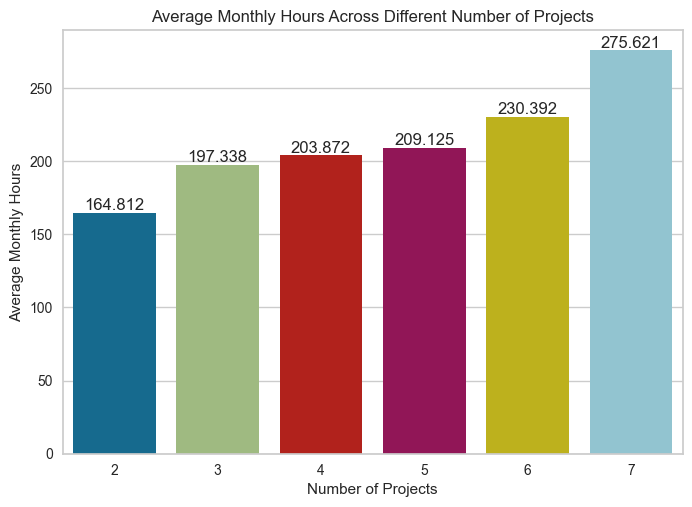

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group the data by 'number_project' and calculate the average monthly hours
avg_hours_by_project = df.groupby('number_project')['average_montly_hours'].mean()

# Plotting the average monthly hours for different number of projects
ax = sns.barplot(x=avg_hours_by_project.index, y=avg_hours_by_project.values)
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours Across Different Number of Projects')
plt.bar_label(ax.containers[0])
plt.show()


### Can we identify any differences in the average satisfaction level between employees who had a work accident and those who didn't?

In [123]:
import pandas as pd
import scipy.stats as stats

# Selecting the relevant columns
columns_of_interest = ['satisfaction_level', 'Work_accident']
data_subset = df[columns_of_interest]

# Splitting the data based on 'Work_accident'
had_accident = data_subset[data_subset['Work_accident'] == 1]
no_accident = data_subset[data_subset['Work_accident'] == 0]

# Performing the Shapiro-Wilk test for normality
_, p_value_had_accident = stats.shapiro(had_accident['satisfaction_level'])
_, p_value_no_accident = stats.shapiro(no_accident['satisfaction_level'])

# Checking normality assumption
if p_value_had_accident > 0.05 and p_value_no_accident > 0.05:
    # Data is normally distributed, performing t-test
    t_statistic, p_value = stats.ttest_ind(had_accident['satisfaction_level'], no_accident['satisfaction_level'])
    test_name = "t-test"
else:
    # Data is not normally distributed, performing Mann-Whitney U test
    t_statistic, p_value = stats.mannwhitneyu(had_accident['satisfaction_level'], no_accident['satisfaction_level'])
    test_name = "Mann-Whitney U test"

# Displaying the results
print("Statistical Test for Average Satisfaction Level:")
print("Test Used:", test_name)
print("p-value:", p_value)
print()

alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level of", alpha)
    print("There is a significant difference in the average satisfaction level between employees who had a work accident and those who didn't.")
else:
    print("The p-value is greater than or equal to the significance level of", alpha)
    print("There is no significant difference in the average satisfaction level between employees who had a work accident and those who didn't.")


Statistical Test for Average Satisfaction Level:
Test Used: Mann-Whitney U test
p-value: 5.9414904057540924e-05

The p-value is less than the significance level of 0.05
There is a significant difference in the average satisfaction level between employees who had a work accident and those who didn't.


**The Shapiro-Wilk test; Definition and Usage**

The Shapiro-Wilk test is a statistical test used to assess the normality of a given dataset. It tests the null hypothesis that the data is normally distributed against the alternative hypothesis that it is not.

The Shapiro-Wilk test calculates a test statistic based on the discrepancy between the observed data and the expected values under the assumption of normality. It produces a p-value, which indicates the probability of obtaining the observed data if the null hypothesis is true (i.e., if the data is normally distributed).

If the p-value from the Shapiro-Wilk test is greater than a predetermined significance level (e.g., 0.05), it suggests that there is no strong evidence to reject the null hypothesis of normality. Conversely, if the p-value is below the significance level, it indicates that the data significantly deviates from a normal distribution.

The Shapiro-Wilk test is particularly useful when determining whether a dataset follows a normal distribution, which is often an assumption for many parametric statistical tests. By assessing the normality of the data, researchers can make informed decisions about the appropriateness of parametric tests or consider alternative non-parametric methods if the data is non-normal.

### Is there a statistically significant association between the salary level of employees and the likelihood of them leaving the company?

In [124]:
import pandas as pd
import scipy.stats as stats

# Creating a contingency table of salary and left columns
contingency_table = pd.crosstab(df['salary'], df['left'])

# Performing the chi-square test of independence
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Displaying the results
print("Chi-Square Test of Independence:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print()

alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level of", alpha)
    print("There is a statistically significant association between the salary level of employees and the likelihood of them leaving the company.")
else:
    print("The p-value is greater than or equal to the significance level of", alpha)
    print("There is no statistically significant association between the salary level of employees and the likelihood of them leaving the company.")


Chi-Square Test of Independence:
Chi-square statistic: 175.21071935727466
p-value: 8.984123357404531e-39

The p-value is less than the significance level of 0.05
There is a statistically significant association between the salary level of employees and the likelihood of them leaving the company.


**The chi-square test; Definiton and Usage**

The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It assesses whether the observed frequencies of the categories in the data differ significantly from the expected frequencies under the assumption of independence.

The test calculates a test statistic, called chi-square (χ²), which measures the discrepancy between the observed and expected frequencies. The expected frequencies are calculated based on the assumption of independence between the variables. The chi-square statistic follows a chi-square distribution, and the test produces a p-value that indicates the probability of obtaining the observed data if the variables are independent.

If the p-value from the chi-square test is below a predetermined significance level (e.g., 0.05), it suggests that there is evidence to reject the null hypothesis of independence. In other words, it indicates that there is a significant association or relationship between the variables. On the other hand, if the p-value is above the significance level, it implies that there is no strong evidence to reject the null hypothesis, and the variables are considered independent.

The chi-square test is commonly used in various fields, such as social sciences, epidemiology, market research, and genetics, to analyze categorical data and examine relationships between variables. It is especially useful when dealing with nominal or ordinal data, where the categories are mutually exclusive and do not have a natural ordering.

## Handling with Outliers

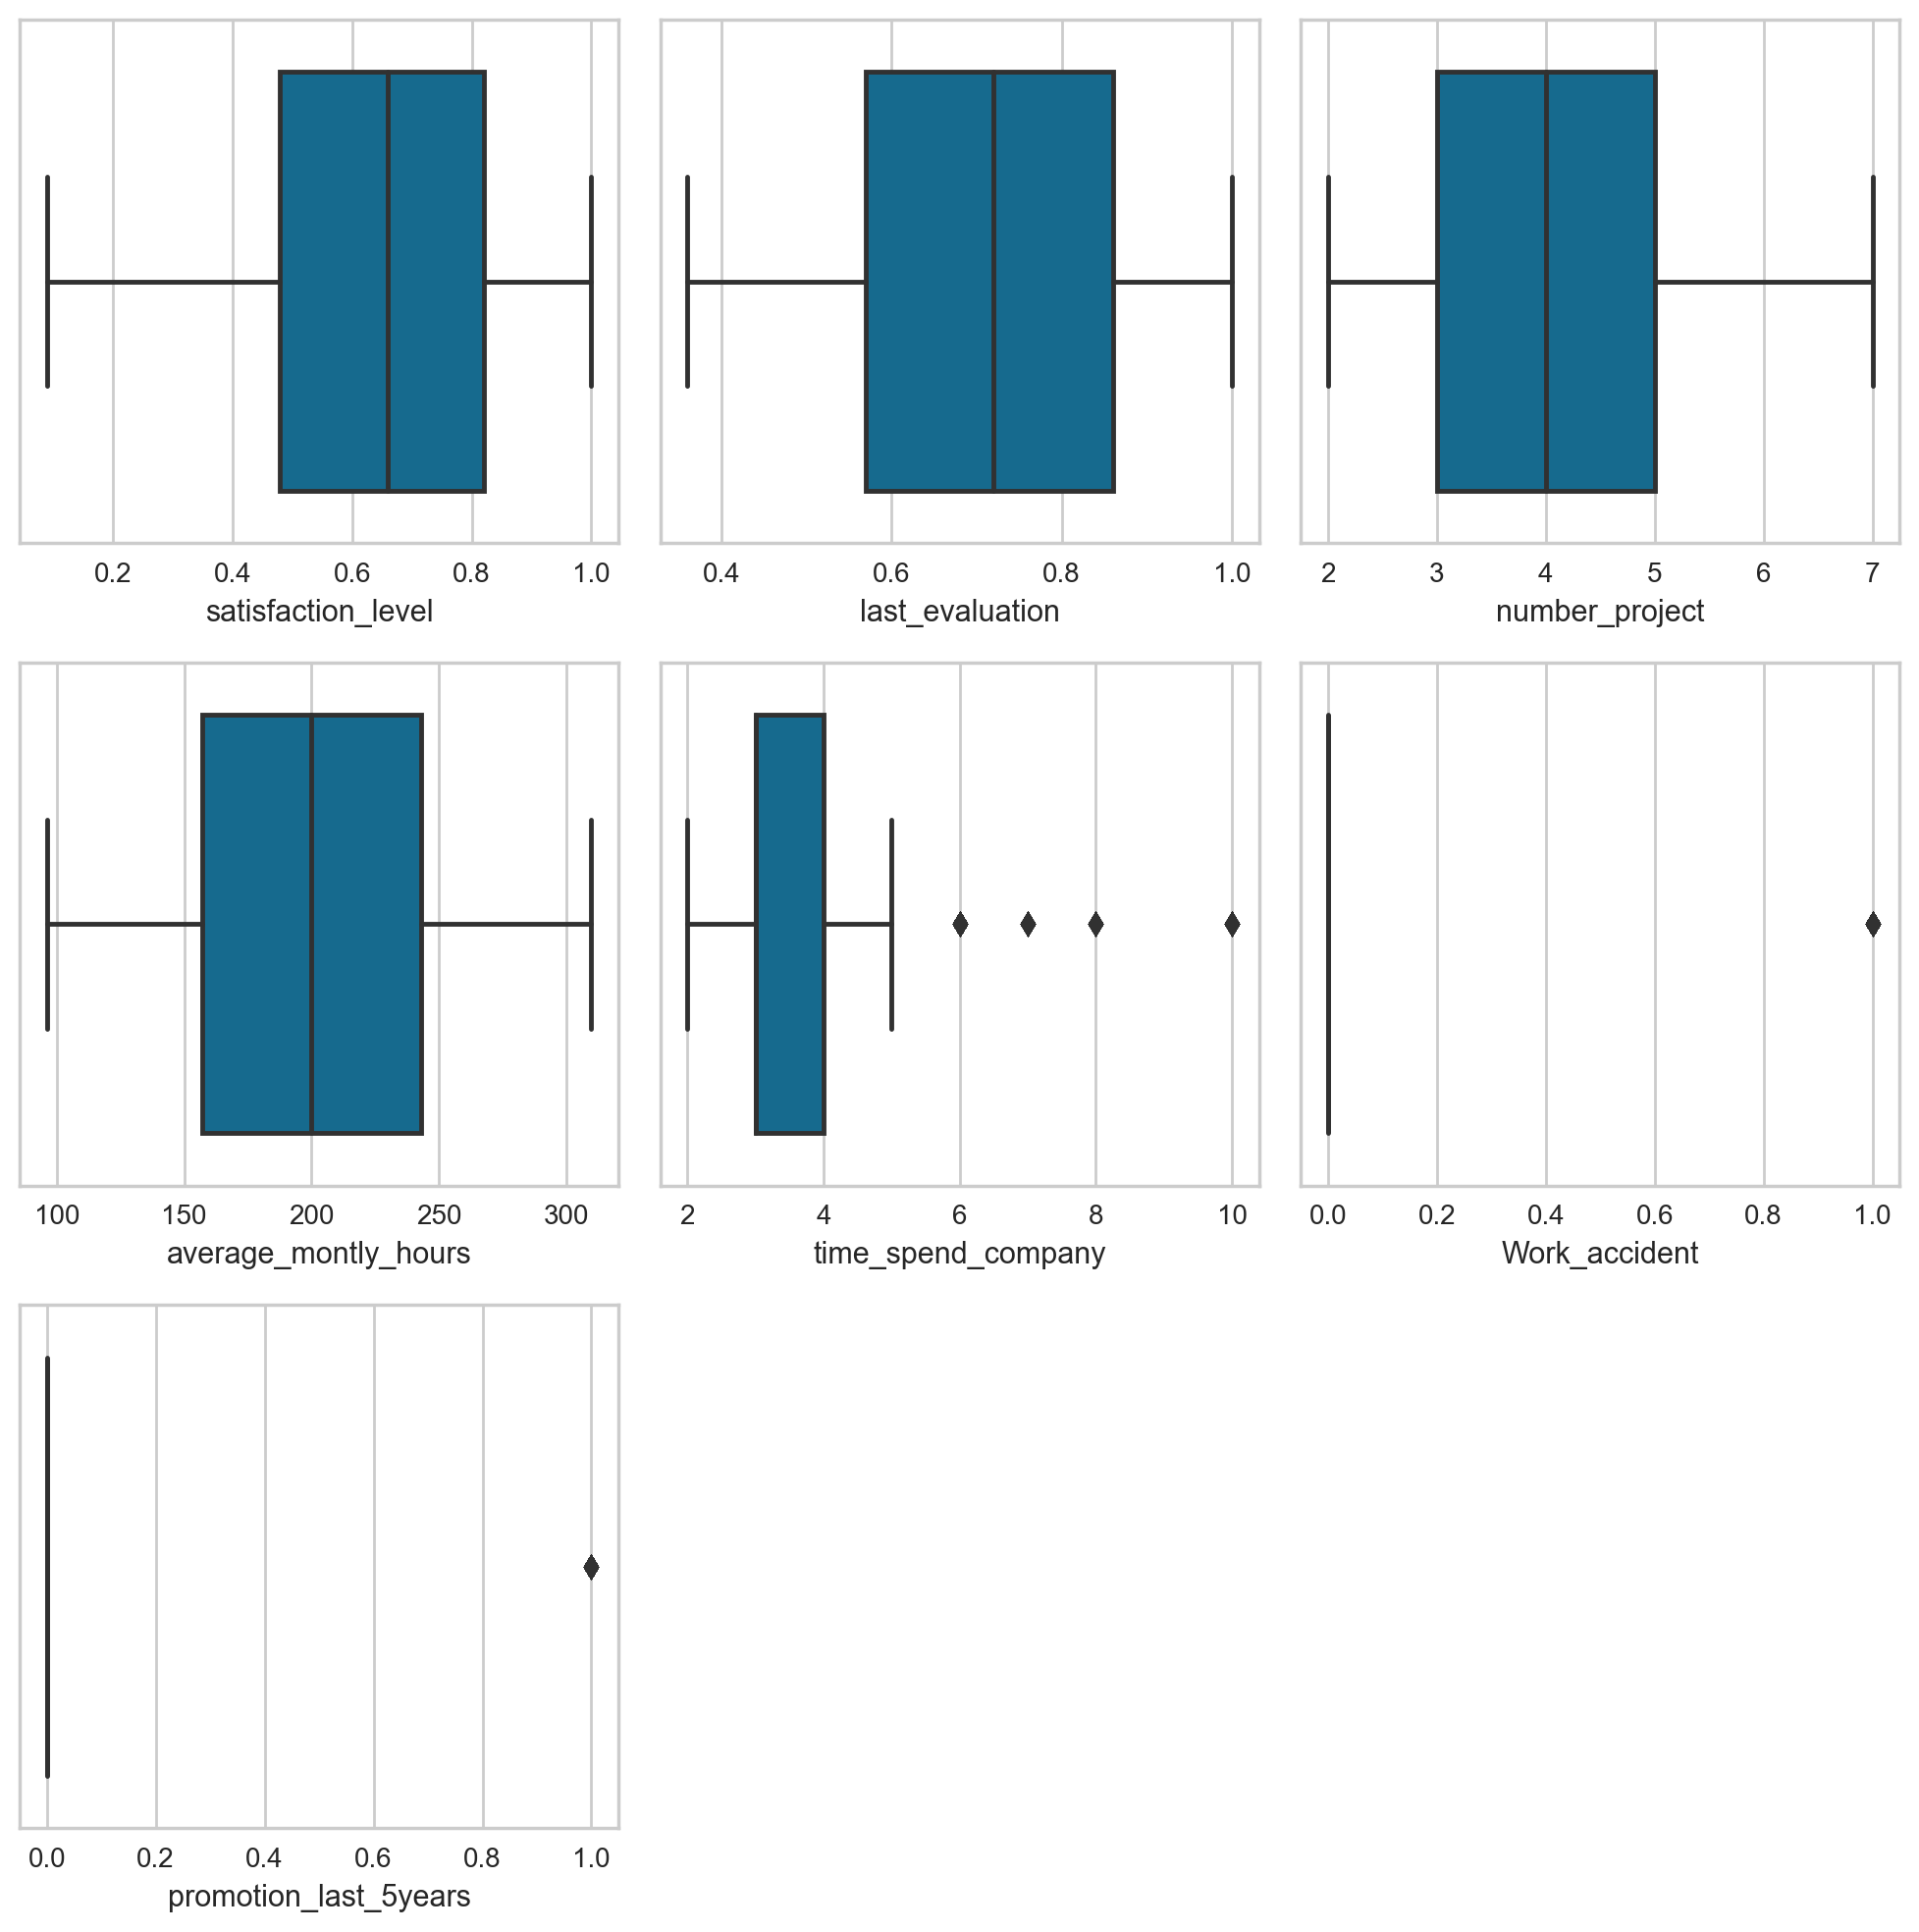

In [125]:
fig = plt.figure(figsize=(10,10), dpi=200)

for i, col in enumerate(df.select_dtypes('number').columns[:-1]):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x=df[col])
        
plt.tight_layout();

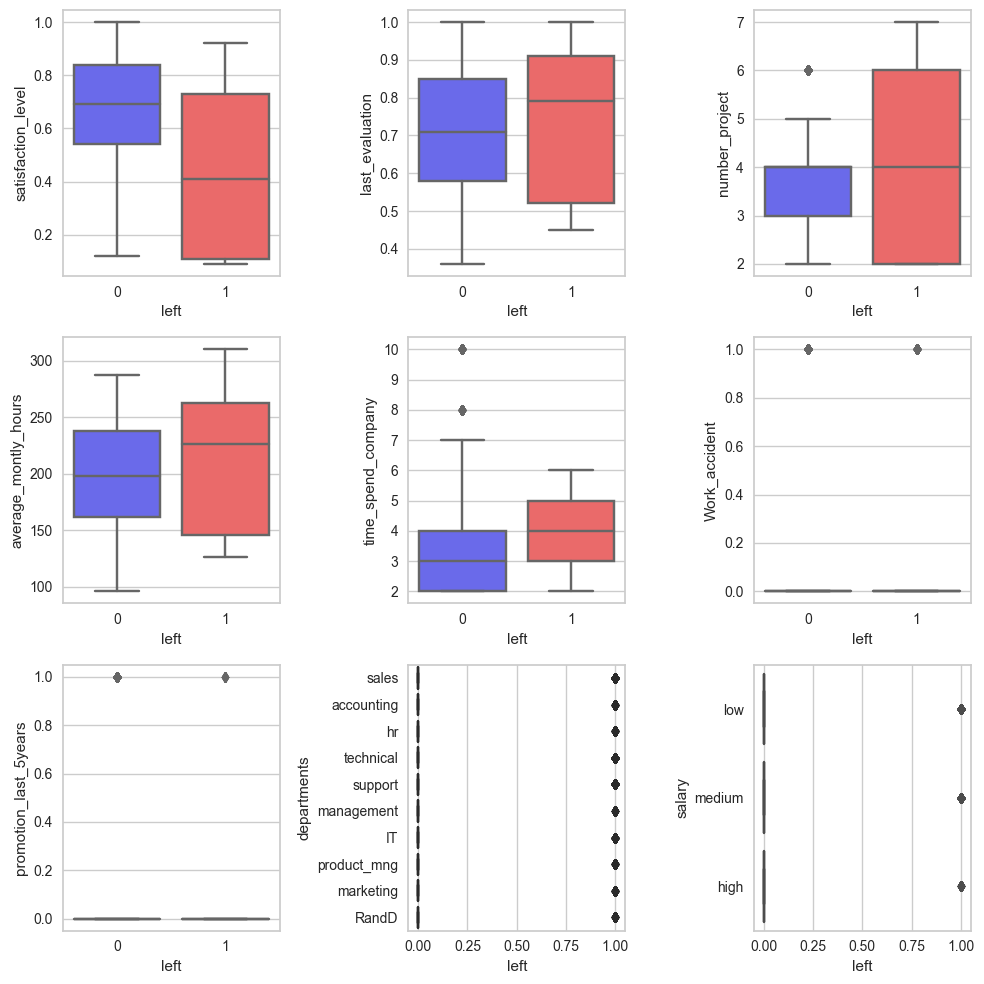

In [126]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df.columns[:-1]):
        plt.subplot(3,3,i+1)
        ax = sns.boxplot(x="left", y=df[col], data=df, palette='seismic')
        
plt.tight_layout();

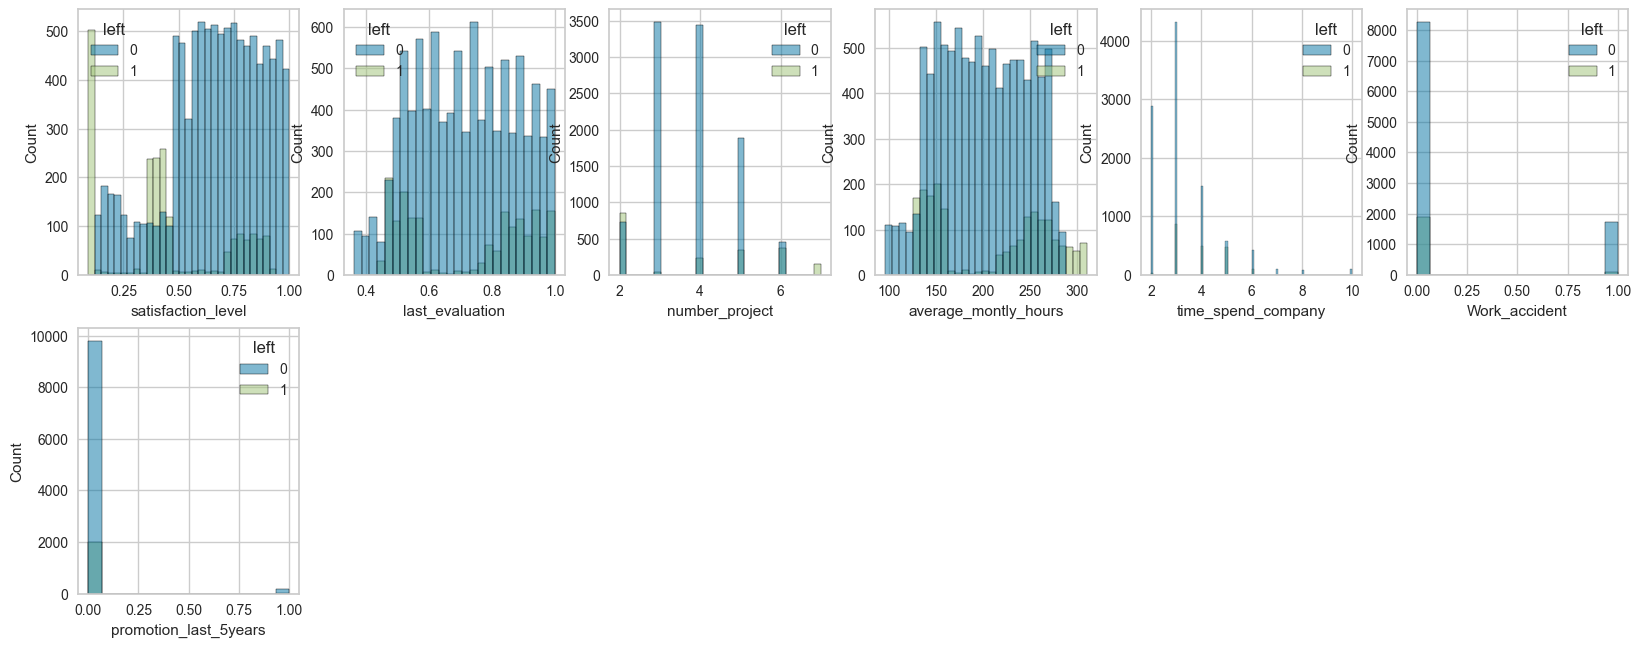

In [127]:
# a general overview of all numerical features for each class
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='left')


In [128]:
# Assuming outliers are values that are more than 1.5 times the IQR away from the first or third quartile

def count_outliers(data):
  columns = data.columns
  # Initialize an empty dictionary to store the results
  results = {}
  # Loop through each column name in the list
  for col in columns:
    # Calculate the first and third quartile of the column
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    # Calculate the IQR
    iqr = q3 - q1
    # Count the number of values that are more than 1.5 times the IQR away from the first or third quartile
    outliers = data[col].apply(lambda x: (x < q1 - 1.5 * iqr) or (x > q3 + 1.5 * iqr)).sum()
    # Count the number of values that are below the first quartile
    below_q1 = data[col].apply(lambda x: x < q1 - 1.5 * iqr).sum()
    # Count the number of values that are above the third quartile
    above_q3 = data[col].apply(lambda x: x > q3 + 1.5 * iqr).sum()
    # Store the result in the dictionary with the column name as the key and a tuple of three numbers as the value
    # The tuple contains the number of outliers, the number of values below q1, and the number of values above q3
    results[col] = (outliers, below_q1, above_q3)
    # Print the result for each column
    print(f"Column {col} has {outliers} outliers, {below_q1} values below Q1, and {above_q3} values above Q3.")
  # Return the dictionary
  return results


In [129]:
count_outliers(df_numeric[df_numeric.left == 0])

Column satisfaction_level has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column last_evaluation has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column number_project has 455 outliers, 0 values below Q1, and 455 values above Q3.
Column average_montly_hours has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column time_spend_company has 188 outliers, 0 values below Q1, and 188 values above Q3.


Column Work_accident has 1745 outliers, 0 values below Q1, and 1745 values above Q3.
Column promotion_last_5years has 195 outliers, 0 values below Q1, and 195 values above Q3.
Column left has 0 outliers, 0 values below Q1, and 0 values above Q3.


{'satisfaction_level': (0, 0, 0),
 'last_evaluation': (0, 0, 0),
 'number_project': (455, 0, 455),
 'average_montly_hours': (0, 0, 0),
 'time_spend_company': (188, 0, 188),
 'Work_accident': (1745, 0, 1745),
 'promotion_last_5years': (195, 0, 195),
 'left': (0, 0, 0)}

In [130]:
count_outliers(df_numeric[df_numeric.left == 1])

Column satisfaction_level has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column last_evaluation has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column number_project has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column average_montly_hours has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column time_spend_company has 0 outliers, 0 values below Q1, and 0 values above Q3.
Column Work_accident has 105 outliers, 0 values below Q1, and 105 values above Q3.
Column promotion_last_5years has 8 outliers, 0 values below Q1, and 8 values above Q3.
Column left has 0 outliers, 0 values below Q1, and 0 values above Q3.


{'satisfaction_level': (0, 0, 0),
 'last_evaluation': (0, 0, 0),
 'number_project': (0, 0, 0),
 'average_montly_hours': (0, 0, 0),
 'time_spend_company': (0, 0, 0),
 'Work_accident': (105, 0, 105),
 'promotion_last_5years': (8, 0, 8),
 'left': (0, 0, 0)}

There is no serious outlier that stands out.

**Check the correlations between the features**

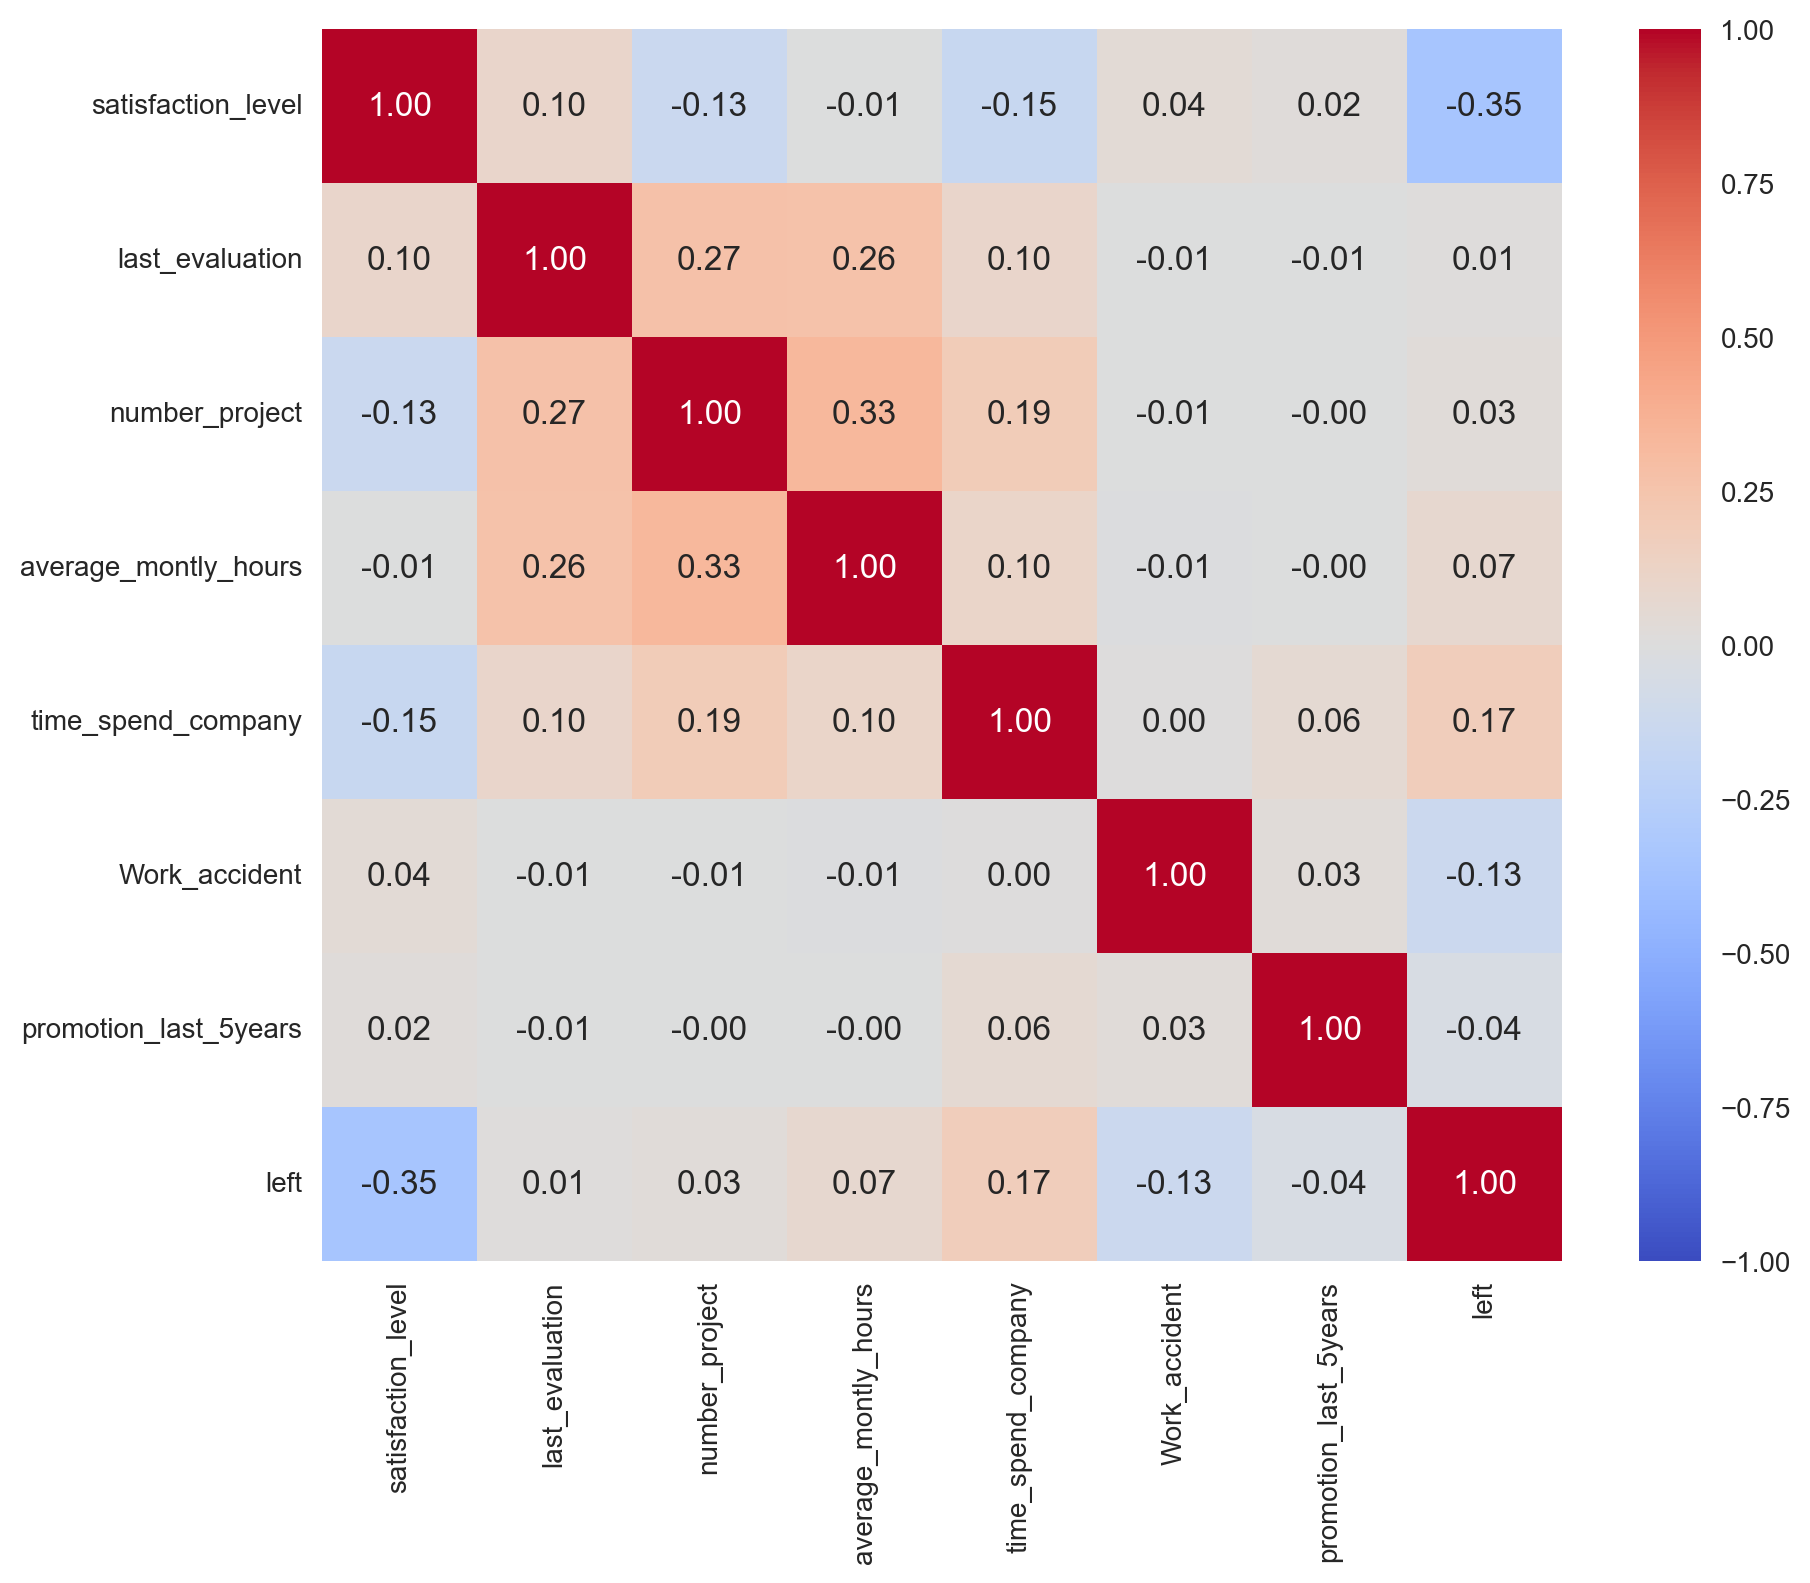

In [131]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt='.2f');

# result: no multicolinearity between the features

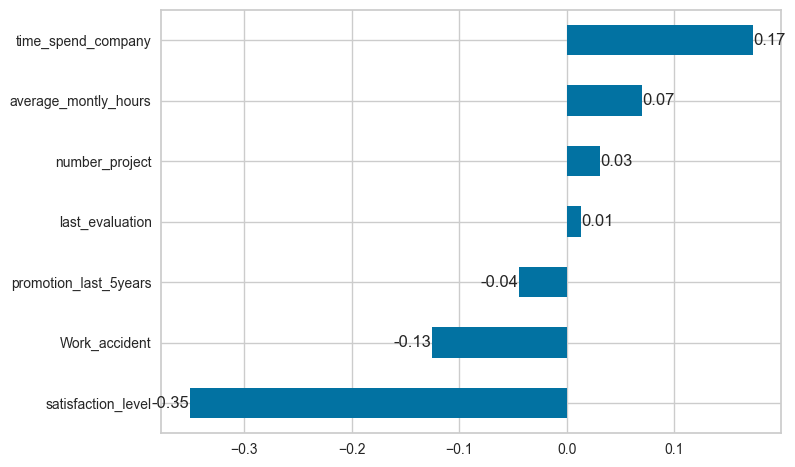

In [132]:
# display the correlation of independent features with target feature "left" and sort theö
ax = df.select_dtypes('number').corr()["left"].drop("left").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

# result: except time_spend__company and satisfaction level, there are no strongly correlated features

## 3. Data Preprocessing

In [133]:
df.sample(1)

satisfaction_level  last_evaluation  number_project   
9113                 0.8             0.85               4  \

      average_montly_hours  time_spend_company  Work_accident   
9113                   239                   3              0  \

      promotion_last_5years departments  salary  left  
9113                      0   technical  medium     0

In [134]:
X = df.drop("left", axis=1)
y = df["left"]

Since there is a hierarchical relationship between salary will implement label encoding on this feature and rename the salary levels as 0 for low, 1 for medium and 2 for high.

In [135]:
X.salary = X.salary.map({"low":0, "medium":1, "high":2})

In [136]:
X.sample(1)

satisfaction_level  last_evaluation  number_project   
1647                 0.1             0.89               7  \

      average_montly_hours  time_spend_company  Work_accident   
1647                   253                   4              0  \

      promotion_last_5years departments  salary  
1647                      0     support       0

Since there is no hierarchical relationship between departments we do onehot encoding on departments feature

In [137]:
X = pd.get_dummies(X, dtype = float)

In [138]:
X.sample(1)

satisfaction_level  last_evaluation  number_project   
5728                0.81             0.49               2  \

      average_montly_hours  time_spend_company  Work_accident   
5728                   205                   5              1  \

      promotion_last_5years  salary  departments_IT  departments_RandD   
5728                      0       0             0.0                0.0  \

      departments_accounting  departments_hr  departments_management   
5728                     0.0             0.0                     0.0  \

      departments_marketing  departments_product_mng  departments_sales   
5728                    0.0                      0.0                1.0  \

      departments_support  departments_technical  
5728                  0.0                    0.0

In [139]:
X.describe().T

count        mean        std    min     25%   
satisfaction_level       11991.0    0.629658   0.241070   0.09    0.48  \
last_evaluation          11991.0    0.716683   0.168343   0.36    0.57   
number_project           11991.0    3.802852   1.163238   2.00    3.00   
average_montly_hours     11991.0  200.473522  48.727813  96.00  157.00   
time_spend_company       11991.0    3.364857   1.330240   2.00    3.00   
Work_accident            11991.0    0.154282   0.361234   0.00    0.00   
promotion_last_5years    11991.0    0.016929   0.129012   0.00    0.00   
salary                   11991.0    0.603870   0.635900   0.00    0.00   
departments_IT           11991.0    0.081394   0.273451   0.00    0.00   
departments_RandD        11991.0    0.057877   0.233520   0.00    0.00   
departments_accounting   11991.0    0.051789   0.221610   0.00    0.00   
departments_hr           11991.0    0.050121   0.218204   0.00    0.00   
departments_management   11991.0    0.036361   0.187194   0.00    0.00   
departments_marketing    11991.0    0.056125   0.230173   0.00    0.00   
departments_product_mng  11991.0    0.057210   0.232252   0.00    0.00   
departments_sales        11991.0    0.270119   0.444040   0.00    0.00   
departments_support      11991.0    0.151864   0.358904   0.00    0.00   
departments_technical    11991.0    0.187140   0.390040   0.00    0.00   

                            50%     75%    max  
satisfaction_level         0.66    0.82    1.0  
last_evaluation            0.72    0.86    1.0  
number_project             4.00    5.00    7.0  
average_montly_hours     200.00  243.00  310.0  
time_spend_company         3.00    4.00   10.0  
Work_accident              0.00    0.00    1.0  
promotion_last_5years      0.00    0.00    1.0  
salary                     1.00    1.00    2.0  
departments_IT             0.00    0.00    1.0  
departments_RandD          0.00    0.00    1.0  
departments_accounting     0.00    0.00    1.0  
departments_hr             0.00    0.00    1.0  
departments_management     0.00    0.00    1.0  
departments_marketing      0.00    0.00    1.0  
departments_product_mng    0.00    0.00    1.0  
departments_sales          0.00    1.00    1.0  
departments_support        0.00    0.00    1.0  
departments_technical      0.00    0.00    1.0

We should do the scaling for clustering since the features are not on the same range.

## 4. Cluster Analysis

In [140]:
from sklearn.neighbors import BallTree


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [141]:
# import the scalers and try both of them to find the one with higher hopkinns score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [142]:
# hopkins without scaler
hopkins(X, X.shape[0])

0.2935206719248113

In [143]:
# hopkins with Standard scaler
hopkins(StandardScaler().fit_transform(X), X.shape[0])

0.08638296985583523

In [144]:
hopkins(MinMaxScaler().fit_transform(X), X.shape[0])
# Compared to standard scaler, MinMaxScaler has a better (lower) score and thus will be used in this project

0.08151507897259087

In [145]:
# check the skewness of the features and perform lof transformation on an unevenly distributed 
# feature to see  if it improves the hopkins score or not
X.skew()

satisfaction_level        -0.538702
last_evaluation           -0.031686
number_project             0.332152
average_montly_hours       0.027208
time_spend_company         1.816577
Work_accident              1.914410
promotion_last_5years      7.490008
salary                     0.570024
departments_IT             3.062158
departments_RandD          3.787231
departments_accounting     4.045725
departments_hr             4.124169
departments_management     4.954409
departments_marketing      3.857515
departments_product_mng    3.813648
departments_sales          1.035579
departments_support        1.940320
departments_technical      1.604510
dtype: float64

In [146]:
X2 = X.copy()

In [147]:
# promotion_last_years or departments features are categorical features. Take time_spend for log_transformation
X2['time_spend_company'] = X2.time_spend_company.apply(np.log)

In [148]:
hopkins(MinMaxScaler().fit_transform(X2), X2.shape[0])

0.08548104765195937

In [149]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

There is no need to do log transformation. MinMaxScaler is enough in this case.

In [150]:
# transform into a dataframe
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head(3)

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0            0.318681         0.265625             0.0              0.285047  \
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   

   time_spend_company  Work_accident  promotion_last_5years  salary   
0               0.125            0.0                    0.0     0.0  \
1               0.500            0.0                    0.0     0.5   
2               0.250            0.0                    0.0     0.5   

   departments_IT  departments_RandD  departments_accounting  departments_hr   
0             0.0                0.0                     0.0             0.0  \
1             0.0                0.0                     0.0             0.0   
2             0.0                0.0                     0.0             0.0   

   departments_management  departments_marketing  departments_product_mng   
0                     0.0                    0.0                      0.0  \
1                     0.0                    0.0                      0.0   
2                     0.0                    0.0                      0.0   

   departments_sales  departments_support  departments_technical  
0                1.0                  0.0                    0.0  
1                1.0                  0.0                    0.0  
2                1.0                  0.0                    0.0

In [151]:
X_scaled.agg(["mean", "std"]).round()

satisfaction_level  last_evaluation  number_project   
mean                 1.0              1.0             0.0  \
std                  0.0              0.0             0.0   

      average_montly_hours  time_spend_company  Work_accident   
mean                   0.0                 0.0            0.0  \
std                    0.0                 0.0            0.0   

      promotion_last_5years  salary  departments_IT  departments_RandD   
mean                    0.0     0.0             0.0                0.0  \
std                     0.0     0.0             0.0                0.0   

      departments_accounting  departments_hr  departments_management   
mean                     0.0             0.0                     0.0  \
std                      0.0             0.0                     0.0   

      departments_marketing  departments_product_mng  departments_sales   
mean                    0.0                      0.0                0.0  \
std                     0.0                      0.0                0.0   

      departments_support  departments_technical  
mean                  0.0                    0.0  
std                   0.0                    0.0

### Choosing The Optimal Number of Clusters

### Elbow metod

In [152]:
from sklearn.cluster import KMeans

In [153]:
ssd = []

K = range(2,15)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

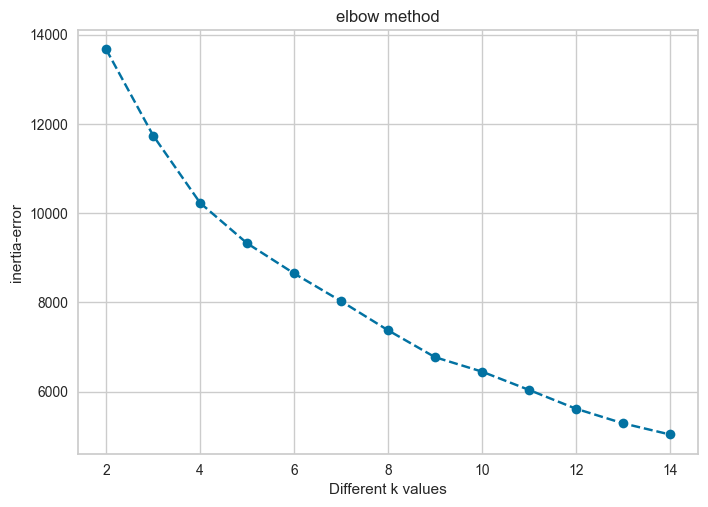

In [154]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [155]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2   1930.925426
3   1509.658798
4    905.695055
5    675.433061
6    621.472307
7    652.888384
8    603.098184
9    324.103852
10   409.428830
11   421.864012
12   327.420986
13   250.510118

<Axes: >

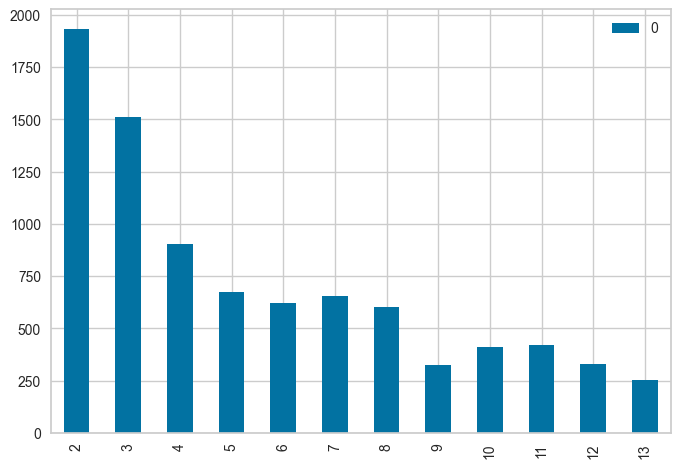

In [156]:
df_diff[1:].plot(kind='bar')

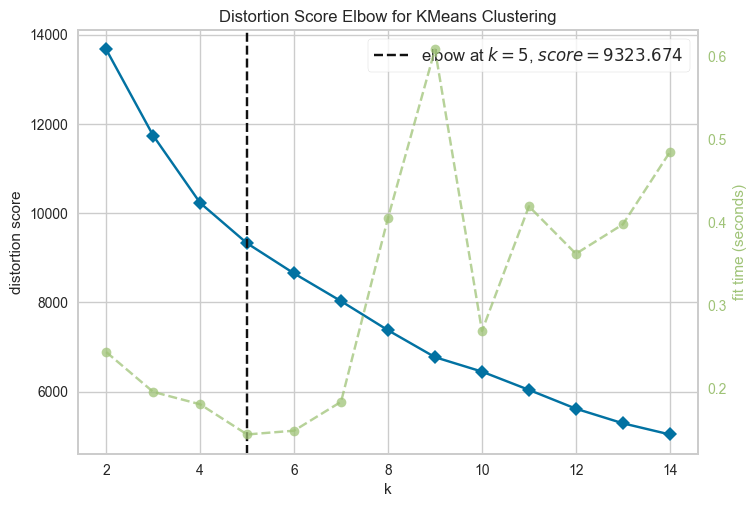

In [157]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,15))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.poof();

### Silhouette Score

In [159]:
# The distance between clusters

In [160]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.17047043697241024
For n_clusters=3, the silhouette score is 0.24141217469026907
For n_clusters=4, the silhouette score is 0.29754476111356937
For n_clusters=5, the silhouette score is 0.33015848966681965
For n_clusters=6, the silhouette score is 0.3555147841999322
For n_clusters=7, the silhouette score is 0.37885214316346383
For n_clusters=8, the silhouette score is 0.40092247196139136
For n_clusters=9, the silhouette score is 0.4259663348954694
For n_clusters=10, the silhouette score is 0.38080620986676517
For n_clusters=11, the silhouette score is 0.4076397619791264
For n_clusters=12, the silhouette score is 0.39936508169324264
For n_clusters=13, the silhouette score is 0.35960752839678256


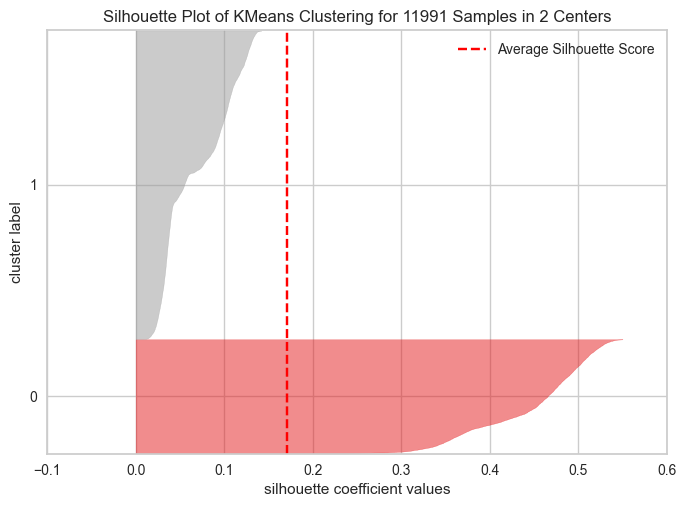

In [161]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model2 = KMeans(n_clusters=2, 
                random_state=42)          # n_clusters=2'e karar verdik !
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [162]:
for i in range(2):
    label = (model2.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.4470202794752896
mean silhouette score for label 1    : 0.06812298040627375
mean silhouette score for all labels : 0.17047043697241024


In [163]:
# since we know the number of actual clusters (2) in this data, we will build the model with 2 clusters

kmeans = KMeans(n_clusters = 2).fit(X_scaled)

In [164]:
# get the labels
labels = kmeans.labels_

In [165]:
pd.DataFrame(labels).value_counts()

1    8752
0    3239
Name: count, dtype: int64

In [166]:
y.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [167]:
# display actual and predicted clusters in the same dataframe
df_compare = pd.concat([y, pd.Series(labels,name='kmeans_label')], axis=1)

In [168]:
df_compare

left  kmeans_label
0         1             0
1         1             0
2         1             0
3         1             0
4         1             0
...     ...           ...
11986     0             1
11987     0             1
11988     0             1
11989     0             1
11990     0             1

[11991 rows x 2 columns]

In [169]:
# 4130 out of 11991 are correctly predicted
df_compare[df_compare.left == df_compare.kmeans_label]

left  kmeans_label
28        1             1
29        1             1
30        1             1
31        1             1
32        1             1
...     ...           ...
11972     0             0
11973     0             0
11974     0             0
11975     0             0
11976     0             0

[4130 rows x 2 columns]

In [170]:
# 7861 out of 11991 are incorrectly predicted
df_compare[df_compare.left != df_compare.kmeans_label]

left  kmeans_label
0         1             0
1         1             0
2         1             0
3         1             0
4         1             0
...     ...           ...
11986     0             1
11987     0             1
11988     0             1
11989     0             1
11990     0             1

[7861 rows x 2 columns]

In [171]:
confusion_matrix(y,labels)

array([[2689, 7311],
       [ 550, 1441]])

In [172]:
df_cluster = pd.concat([X_scaled,pd.Series(labels,name='predicted_cluster')], axis=1)

In [173]:
df_cluster

satisfaction_level  last_evaluation  number_project   
0                0.318681         0.265625             0.0  \
1                0.780220         0.781250             0.6   
2                0.021978         0.812500             1.0   
3                0.692308         0.796875             0.6   
4                0.307692         0.250000             0.0   
...                   ...              ...             ...   
11986            0.890110         0.296875             0.2   
11987            0.714286         0.921875             0.6   
11988            0.835165         0.281250             0.2   
11989            0.263736         0.453125             0.2   
11990            0.450549         0.578125             0.4   

       average_montly_hours  time_spend_company  Work_accident   
0                  0.285047               0.125            0.0  \
1                  0.775701               0.500            0.0   
2                  0.822430               0.250            0.0   
3                  0.593458               0.375            0.0   
4                  0.294393               0.125            0.0   
...                     ...                 ...            ...   
11986              0.761682               1.000            1.0   
11987              0.794393               1.000            0.0   
11988              0.415888               1.000            0.0   
11989              0.355140               1.000            0.0   
11990              0.392523               0.125            0.0   

       promotion_last_5years  salary  departments_IT  departments_RandD   
0                        0.0     0.0             0.0                0.0  \
1                        0.0     0.5             0.0                0.0   
2                        0.0     0.5             0.0                0.0   
3                        0.0     0.0             0.0                0.0   
4                        0.0     0.0             0.0                0.0   
...                      ...     ...             ...                ...   
11986                    1.0     1.0             0.0                0.0   
11987                    1.0     1.0             0.0                0.0   
11988                    1.0     1.0             0.0                0.0   
11989                    1.0     1.0             0.0                0.0   
11990                    0.0     0.0             1.0                0.0   

       departments_accounting  departments_hr  departments_management   
0                         0.0             0.0                     0.0  \
1                         0.0             0.0                     0.0   
2                         0.0             0.0                     0.0   
3                         0.0             0.0                     0.0   
4                         0.0             0.0                     0.0   
...                       ...             ...                     ...   
11986                     0.0             0.0                     1.0   
11987                     0.0             0.0                     1.0   
11988                     0.0             0.0                     1.0   
11989                     0.0             0.0                     0.0   
11990                     0.0             0.0                     0.0   

       departments_marketing  departments_product_mng  departments_sales   
0                        0.0                      0.0                1.0  \
1                        0.0                      0.0                1.0   
2                        0.0                      0.0                1.0   
3                        0.0                      0.0                1.0   
4                        0.0                      0.0                1.0   
...                      ...                      ...                ...   
11986                    0.0                      0.0                0.0   
11987                    0.0                      0.0                0.0   
11988  

In [174]:
df_cluster.groupby('predicted_cluster').agg({np.mean,np.std})

satisfaction_level           last_evaluation             
                                mean       std            mean       std   
predicted_cluster                                                          
0                           0.594889  0.266538        0.547497  0.263353  \
1                           0.592343  0.264320        0.560950  0.262840   

                  number_project           average_montly_hours             
                            mean       std                 mean       std   
predicted_cluster                                                           
0                       0.355418  0.233962             0.487112  0.226517  \
1                       0.362477  0.232144             0.488594  0.228148   

                  time_spend_company            ... departments_marketing   
                                mean       std  ...                  mean   
predicted_cluster                               ...                         
0                           0.172584  0.171591  ...              0.000000  \
1                           0.169875  0.164275  ...              0.076897   

                            departments_product_mng             
                        std                    mean       std   
predicted_cluster                                               
0                  0.000000                0.000000  0.000000  \
1                  0.266443                0.078382  0.268787   

                  departments_sales      departments_support             
                               mean  std                mean       std   
predicted_cluster                                                        
0                               1.0  0.0            0.000000  0.000000  \
1                               0.0  0.0            0.208067  0.405948   

                  departments_technical            
                                   mean       std  
predicted_cluster                                  
0                              0.000000  0.000000  
1                              0.256399  0.436669  

[2 rows x 36 columns]

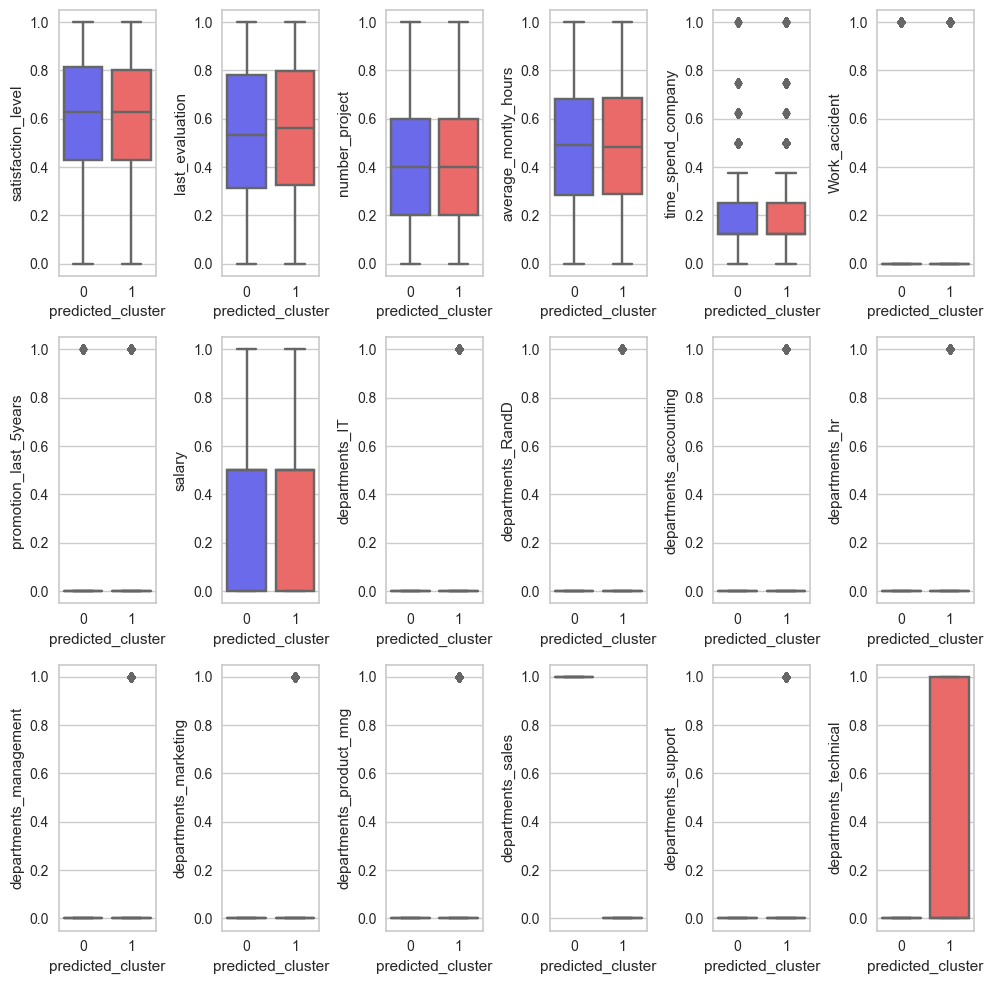

In [175]:
fig = plt.figure(figsize=(10,10))

for i, col in enumerate(df_cluster.columns[:-1]):
        plt.subplot(3,6,i+1)
        ax = sns.boxplot(x="predicted_cluster", y=df_cluster[col], data=df_cluster, palette='seismic')
        
plt.tight_layout();

### ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [176]:
from sklearn.metrics.cluster import adjusted_rand_score

In [177]:
adjusted_rand_score(y, labels)


0.002736190938891918


A Adjusted Rand Score (ARS) of 0.0027 indicates a very low similarity between the clustering results and the ground truth labels (if available). This score suggests that the clustering algorithm, in this case, k-means, did not capture the underlying structure of the data well or did not align with the true cluster assignments.

A score close to zero suggests that the clustering is essentially random or provides results that are not significantly better than random chance. It implies that the clusters formed by the algorithm do not correspond well to the actual clusters or groups in the data.

In practical terms, such a low ARS score may indicate that the chosen number of clusters, the clustering algorithm itself, or the data itself may not be suitable for the clustering task.

## 5. Predictive Model Building

### 5.1. Preprocessing

In [777]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [778]:
# check the df
df.head(1)

satisfaction_level  last_evaluation  number_project  average_montly_hours   
0                0.38             0.53               2                   157  \

   time_spend_company  Work_accident  promotion_last_5years departments   
0                   3              0                      0       sales  \

  salary  left  
0    low     1

In [779]:
# split the data as features and target
X = df.drop("left", axis=1)
y = df["left"]

In [780]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

### 5.2 Classification Algorithms

In [181]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


#### 5.2.1 Logistic Regression

Logistic regression is a popular supervised machine learning algorithm used for binary classification tasks. It is a statistical model that predicts the probability of an instance belonging to a particular class.

The main idea behind logistic regression is to model the relationship between the input features (independent variables) and the binary target variable (dependent variable) using a logistic function. The logistic function, also known as the sigmoid function, maps any real-valued number to a value between 0 and 1, representing the probability of the instance belonging to the positive class.

The logistic regression model assumes that the log-odds of the target variable being in the positive class is a linear combination of the input features. The model calculates the weighted sum of the input features, applies the logistic function to it, and produces the probability of the positive class.

During the training phase, logistic regression optimizes the model parameters using optimization techniques like maximum likelihood estimation or gradient descent. The goal is to find the parameter values that maximize the likelihood of the observed data given the model.

Once the model is trained, it can be used to predict the class labels of new instances by comparing the predicted probabilities to a predefined threshold. If the predicted probability is above the threshold, the instance is classified as the positive class; otherwise, it is classified as the negative class.

Logistic regression has several advantages, including simplicity, interpretability, and efficiency. It works well with both linearly separable and non-linearly separable data, and it can handle categorical and continuous input features. However, logistic regression assumes a linear relationship between the features and the log-odds, and it may not perform well in cases where the relationship is highly non-linear.

The main parameters of logistic regression are as follows:

1) **Penalty**: Logistic regression can apply regularization to the model to prevent overfitting. The penalty parameter determines the type and strength of regularization. There are two commonly used penalties: L1 regularization (Lasso) and L2 regularization (Ridge). The choice of penalty depends on the problem and the nature of the data.

2) **C**: The inverse of the regularization strength is represented by the parameter C. A smaller value of C indicates stronger regularization, while a larger value of C indicates weaker regularization. It controls the trade-off between fitting the training data well and preventing overfitting.

3) **Solver**: Logistic regression models can be solved using different algorithms or solvers. The solver parameter determines the optimization algorithm to use for finding the optimal parameter values. Some popular solver options include 'liblinear', 'lbfgs', 'newton-cg', and 'sag'. The choice of solver depends on the size of the dataset and the computational efficiency required.

4) **Maximum Iterations**: The maximum number of iterations is the maximum number of times the solver iterates to converge on the optimal parameter values. It is important to set a sufficiently large value for this parameter to ensure convergence of the optimization algorithm.

5) **Class Weight**: In cases where the classes are imbalanced, you can assign different weights to each class to give more importance to the minority class. The class_weight parameter allows you to specify the weights for each class. This can help improve the performance of the model on the minority class.

In [183]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

# prepare the features for encoding
cat_onehot = ['departments'] # onehot encoding for departments feature (no hierarchy between various departments)
cat_ordinal = ['salary'] # ordinal encoding for salary bec of hierarchical order betweenn the labels

cat_for_salary = ["low", "medium", "high"] # define the order among different salary groups 

In [184]:
# encode the abovementioned features
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_salary])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [185]:
# operation order for pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("model", LogisticRegression(C=1, max_iter=1000, class_weight="balanced", random_state=101))]

log_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# Fit the pipeline on the training data
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [186]:
print("LOG MODEL")
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

LOG MODEL
Test_Set
[[1544  457]
 [  62  336]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399


Train_Set
[[6073 1926]
 [ 279 1314]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.86      0.77      0.80      9592



In [187]:
# check overfitting with cv
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("model", LogisticRegression(C=1, max_iter=1000, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations).set_output(transform="pandas")

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train, 
                        scoring = scoring, 
                        cv = 5, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 6))
df_scores.mean()[2:]

# no overfitting but poor scores

test_accuracy      0.768558
train_accuracy     0.769495
test_f1            0.540430
train_f1           0.542281
test_recall        0.819207
train_recall       0.822191
test_precision     0.403328
train_precision    0.404558
dtype: float64

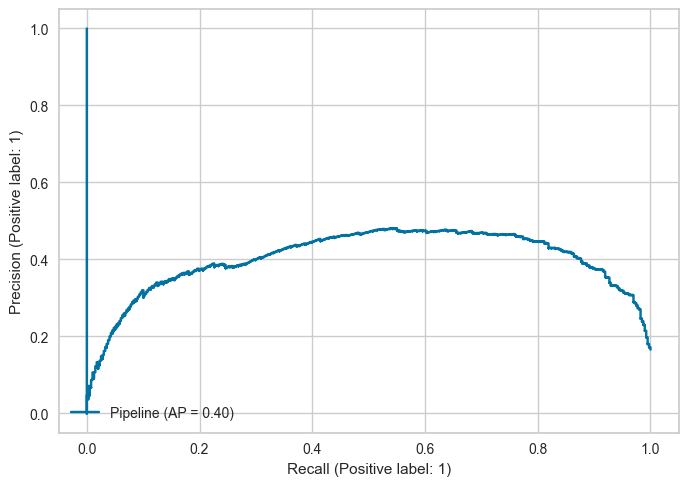

In [188]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log_pipe, 
                                      X_test, 
                                      y_test);
# overall performance of the log model is quite low, it can separate the classes with only a 40% performance

In [437]:
# save the scores to compare in the end with the scores of other models
y_pred = log_pipe.predict(X_test)
y_pred_proba= log_pipe.predict_proba(X_test)[:,1]

log_AP = average_precision_score(y_test, y_pred_proba)
log_rec = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test,y_pred)
log_matthews =  matthews_corrcoef(y_test, y_pred)
log_time = measure_prediction_time(log_pipe,X_test)

log_AP,log_rec,log_f1,log_matthews,log_time

(0.396247497509286,
 0.8442211055276382,
 0.5642317380352645,
 0.4869902814700124,
 0.018836712837219237)

**What is Matthews Correlation Coefficient and why we use it for this data?**

The Matthews Correlation Coefficient (MCC) is **a measure of the quality of binary classifications, particularly in imbalanced datasets**. It takes into account true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) to calculate a single score that represents the overall performance of a binary classifier.

MCC ranges from -1 to 1, where a value of 1 indicates a perfect classifier, 0 indicates a random classifier, and -1 indicates a completely incorrect classifier. MCC considers all four classification results, unlike some other metrics that focus only on a specific aspect, such as accuracy or precision.

**MCC is particularly useful in imbalanced datasets because it balances the effect of true negatives against false negatives.** In imbalanced datasets, where the negative class (majority class) significantly outweighs the positive class (minority class), traditional metrics like accuracy can be misleading. For example, a classifier that always predicts the negative class will have a high accuracy but fails to capture the minority class correctly. MCC, on the other hand, takes into account the true negatives and false negatives and **provides a more reliable evaluation of classifier performance**.

In summary, MCC is a useful metric for evaluating the performance of binary classifiers, especially in imbalanced datasets, as it provides a balanced assessment of the classifier's ability to handle both positive and negative classes.

**Result: LOGISTIC REG model**:

What are the main measures in Confusion Matrix for this data:

- **True Negative (TN)**: The model correctly predicted that an employee continues to work (0) when they actually continue to work.
- **False Positive (FP)**: The model incorrectly predicted that an employee has churned (1) when they actually continue to work.
- **False Negative (FN)**: The model incorrectly predicted that an employee continues to work when they have actually churned.
- **True Positive (TP)**: The model correctly predicted that an employee has churned.

Based on the results otained from the vanilla model above, the logistic regression model shows lower precision, recall, and F1-score. This indicates that the model has more difficulty correctly identifying churned employees (class 1). The precision for class 1 is particularly low, meaning there is a higher rate of false positive predictions.

The accuracy of the model is moderate, suggesting that it provides reasonably accurate predictions overall. In addition, the lower recall for class 0 indicates a higher rate of false negatives, meaning some employees who have churned are not correctly identified by the model.

#### 5.2.2 KNN MODEL

K-Nearest Neighbors (KNN) is a simple yet powerful supervised learning algorithm used for both classification and regression tasks.

**Key Parameters of KNN**:

- **n_neighbors**: The number of neighbors to consider when making predictions. It is an integer value and should be carefully chosen to balance between overfitting and underfitting. A smaller value tends to increase model complexity and may lead to overfitting, while a larger value may increase bias and result in underfitting.

- **weights**: The weight function used in prediction. It can be set to 'uniform' (equal weights) or 'distance' (weights inversely proportional to distance). The choice of weights can have an impact on the performance of the algorithm.

- **metric** : The distance metric used to measure the similarity between instances. Common options include 'euclidean' (Euclidean distance), 'manhattan' (Manhattan distance), and 'cosine' (cosine similarity). The choice of metric depends on the nature of the data and the problem at hand.

It's important to note that **KNN is sensitive to the scale** and distribution of the features, so it's often beneficial to perform feature scaling before applying KNN.

In [781]:
from sklearn.neighbors import KNeighborsClassifier

In [782]:
# prepare the features for encoding
cat_onehot = ['departments'] # onehot encoding for departments feature (no hierarchy between various departments)
cat_ordinal = ['salary'] # ordinal encoding for salary bec of hierarchical order betweenn the labels

cat_for_salary = ["low", "medium", "high"] # define the order among different salary groups 

In [783]:
# encode the abovementioned features
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_salary])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [784]:
# operation order for pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("knn", KNeighborsClassifier(n_neighbors=5))]

knn_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# Fit the pipeline on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [785]:
y_pred = knn_pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [786]:
# probabilities for being 0 or 1
y_pred_proba = knn_pipe.predict_proba(X_test)

In [787]:
confusion_matrix(y_test, y_pred)

array([[1931,   70],
       [  43,  355]])

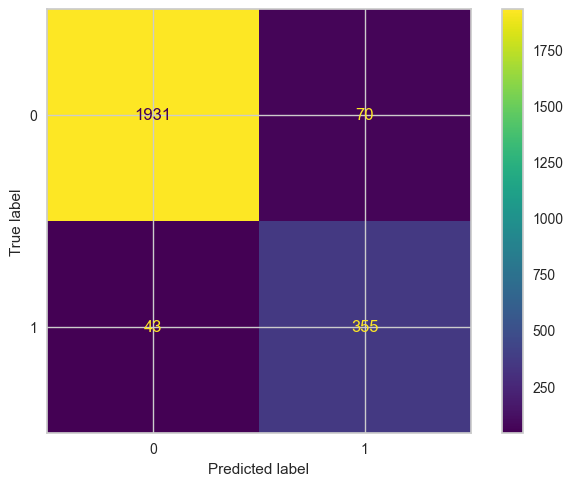

In [788]:
# visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_pipe,X_test, y_test)

In [789]:
# check the scores
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

# KNN algorith gave higher scores even with vanilla model

Test_Set
[[1931   70]
 [  43  355]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.89      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7803  196]
 [ 189 1404]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



**Elbow Method for Choosing Reasonable K Values and  Overfiting and underfiting control for k values**

In [790]:
# cross val and gridsearch for best k values and overfitting control
test_recall_rates = []
train_recall_rates = []


for k in range(1,30):
    
    operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()),  
                  ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 5, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_recall = recall_test_mean
    train_recall = recall_train_mean
    test_recall_rates.append(test_recall)
    train_recall_rates.append(train_recall)

Text(0, 0.5, 'Recall')

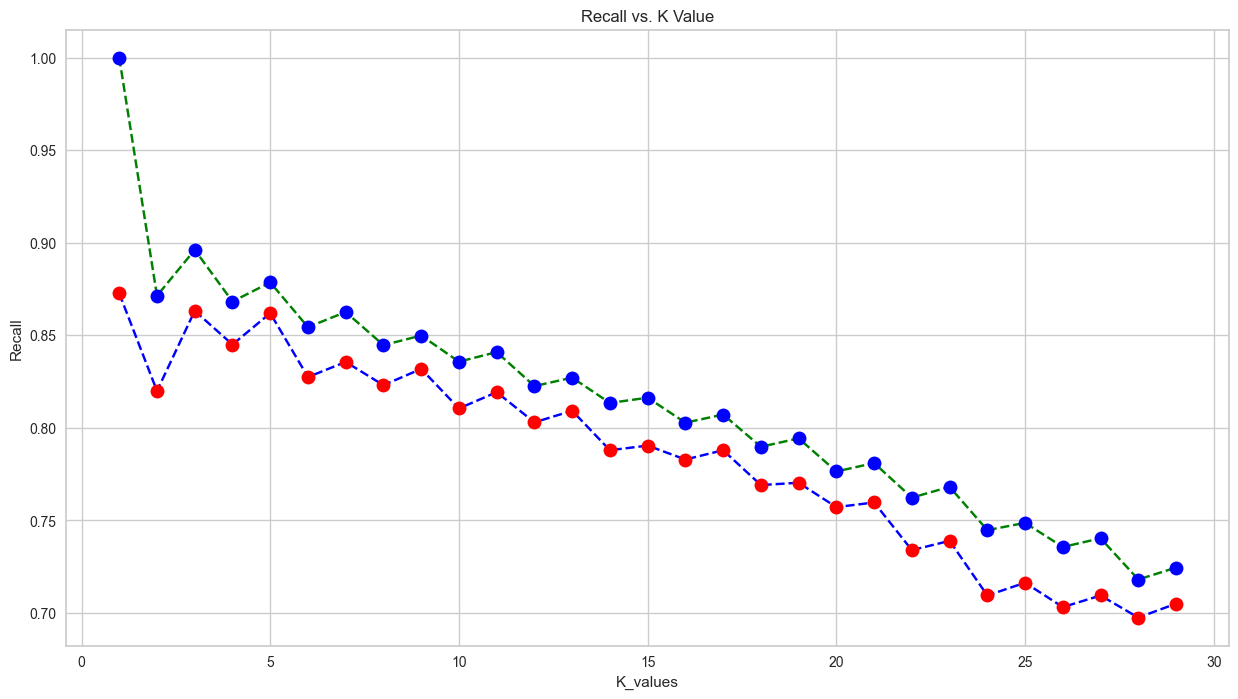

In [791]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_recall_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_recall_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Recall vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Recall')
#plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
#plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Red: validation - blues : train

# result: 5 k is the best value for highest recall and no overfitting

**Cross validate for optimal k-value**

In [792]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()),  
                  ("knn", KNeighborsClassifier(n_neighbors=5))] # with 5 k 

knn_model = Pipeline(steps=operations)

scores = cross_validate(knn_model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

# no overfitting

test_accuracy      0.947352
train_accuracy     0.957986
test_precision     0.828579
train_precision    0.869825
test_recall        0.861907
train_recall       0.878531
test_f1            0.844664
train_f1           0.874148
dtype: float64

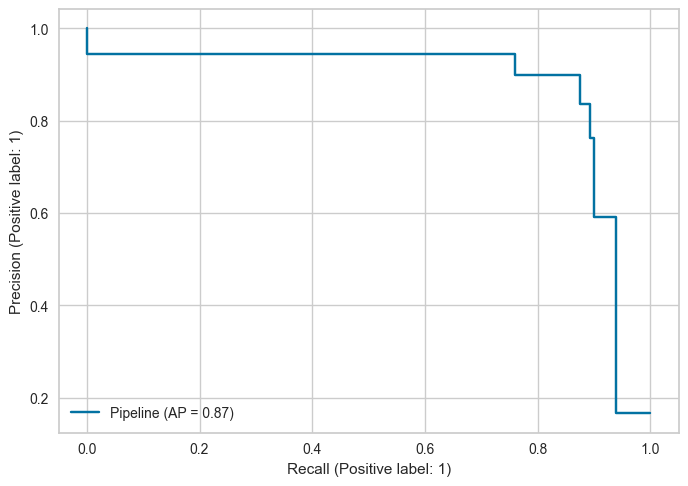

In [793]:
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
PrecisionRecallDisplay.from_estimator(knn_pipe, X_test, y_test);

# general performance of model is 87%

In [794]:
# save the scores to compare in the end with the scores of other models
y_pred = knn_pipe.predict(X_test)
y_pred_proba= knn_pipe.predict_proba(X_test)[:,1]

knn_AP = average_precision_score(y_test, y_pred_proba)
knn_rec = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test,y_pred)
knn_matthews =  matthews_corrcoef(y_test, y_pred)
knn_time = measure_prediction_time(knn_pipe,X_test)

knn_AP,knn_rec,knn_f1,knn_matthews,knn_time

(0.8742811357834483,
 0.8919597989949749,
 0.8626974483596598,
 0.8349613151335263,
 0.3956882476806641)

**RESULT for KNN**

Based on the scores above, the KNN algorithm consistently performed well and yielded relatively higher scores for each metric. When considering the recall score for this imbalanced data, it reached 89, while the precision and F1 scores were also higher compared to logistic regression. However, as demonstrated below, tree-based algorithms outperformed KNN and achieved higher scores for this particular dataset. Therefore, we will keep the KNN model with k=5 (the optimal number of neighbors) as is and will not conduct a grid search for it.

#### 5.2.3 Support Vector Machines (SVC)


Support Vector Machines (SVM) is a popular supervised machine learning algorithm used for both classification and regression tasks. SVM is a binary classifier that aims to find an optimal hyperplane that separates data points belonging to different classes in the feature space.

The basic idea behind SVM is to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. The hyperplane is chosen in such a way that it maximally separates the classes and minimizes the generalization error. The data points that lie closest to the hyperplane are called support vectors, and they play a crucial role in defining the decision boundary.

SVM can handle both linearly separable and non-linearly separable data by using various kernel functions. The kernel function transforms the input features into a higher-dimensional space, where the data may become linearly separable. Commonly used kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

The training process of SVM involves solving an optimization problem to find the optimal hyperplane. This problem aims to minimize the classification error while maximizing the margin. SVM also introduces the concept of regularization to handle overfitting by adding a penalty term that balances the margin and the classification error.

Once trained, SVM can be used to predict the class labels of unseen data points. It assigns new data points to the class on the basis of which side of the decision boundary they fall.

SVM has several advantages, such as effective in high-dimensional spaces, robust against overfitting, and ability to handle both linear and non-linear data. However, SVM may suffer from scalability issues with large datasets and requires careful selection of hyperparameters for optimal performance.

The main parameters of Support Vector Machines (SVM) are as follows:

1) **Kernel**: SVM can use different types of kernels to transform the data into a higher-dimensional space. The kernel parameter determines the type of kernel to be used. Some commonly used kernels are linear, polynomial, radial basis function (RBF), and sigmoid. The choice of kernel depends on the nature of the data and the problem being solved.

2) **C**: The parameter C in SVM controls the trade-off between achieving a low training error and a low-margin decision boundary. A smaller value of C allows for a larger margin but may result in more training errors, while a larger value of C aims to minimize the training errors at the expense of a narrower margin. It determines the level of misclassification that is acceptable.

3) **Gamma**: Gamma is a parameter used in non-linear kernels (such as RBF) and controls the influence of each training example. A low value of gamma indicates a larger influence radius, resulting in a smoother decision boundary, while a high value of gamma indicates a smaller influence radius, resulting in a more complex and wiggly decision boundary.

4) **Class Weight**: Similar to logistic regression, SVM can also handle imbalanced datasets by assigning different weights to each class. The class_weight parameter allows you to specify the weights for each class. It can be useful when the classes are imbalanced, and you want to give more importance to the minority class.

5) **Kernel Coefficient (Degree)**: This parameter is used in polynomial kernels and determines the degree of the polynomial function used to map the data into higher-dimensional space. It controls the flexibility of the model to capture non-linear relationships in the data.

In [507]:
# prepare the features for encoding
cat_onehot = ['departments'] # onehot encoding for departments feature (no hierarchy between various departments)
cat_ordinal = ['salary'] # ordinal encoding for salary bec of hierarchical order betweenn the labels

cat_for_salary = ["low", "medium", "high"] # define the order among different salary groups 

In [508]:
# encode the abovementioned features
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_salary])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [509]:
# operation order for pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]

SVC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

# Fit the pipeline on the training data
SVC_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(class_weight='balanced', max_iter=1000,
                     random_state=101))])

In [510]:
# check the scores
eval_metric(SVC_pipe, X_train, y_train, X_test, y_test)

# poor recall for 0 class and precision for  1 class

Test_Set
[[ 479 1522]
 [   5  393]]
              precision    recall  f1-score   support

           0       0.99      0.24      0.39      2001
           1       0.21      0.99      0.34       398

    accuracy                           0.36      2399
   macro avg       0.60      0.61      0.36      2399
weighted avg       0.86      0.36      0.38      2399


Train_Set
[[1759 6240]
 [  10 1583]]
              precision    recall  f1-score   support

           0       0.99      0.22      0.36      7999
           1       0.20      0.99      0.34      1593

    accuracy                           0.35      9592
   macro avg       0.60      0.61      0.35      9592
weighted avg       0.86      0.35      0.36      9592



In [511]:
# check overfitting
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]
SVC_pipe = Pipeline(steps=operations)

scores = cross_validate(SVC_pipe, 
                        X_train, 
                        y_train, 
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

# too low precision scores

test_accuracy      0.358938
train_accuracy     0.355272
test_precision     0.205487
train_precision    0.204763
test_recall        0.994349
train_recall       0.997018
test_f1            0.340491
train_f1           0.339678
dtype: float64

**SVC with Best Parameters (GridsearchCV)**

**What is Gridsearch and why is it important?**

Grid search is a hyperparameter optimization technique used in machine learning to find the best combination of hyperparameter values for a given model. Hyperparameters are parameters that are not learned from the data but are set before training the model, such as the learning rate, regularization parameter, or number of hidden units in a neural network.

Grid search involves defining a grid of possible values for each hyperparameter and exhaustively searching through all possible combinations. For each combination, the model is trained and evaluated using a specified evaluation metric, such as accuracy or mean squared error. The combination of hyperparameter values that achieves the best performance on the evaluation metric is selected as the optimal set of hyperparameters.

In [512]:
# import gridsearch
from sklearn.model_selection import GridSearchCV

In [513]:
# define the param-grid
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3], # float values can be given in addition to scale and auto 
              'SVC__kernel': ['rbf', 'linear'], # try rbf and linear
              'SVC__class_weight': ["balanced", None]}

In [514]:
%%time
# build the model
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(SVC_pipe_model, 
                              param_grid, 
                              scoring="recall", # recall in an imbalanced data
                              cv=5, 
                              return_train_score=True)

CPU times: user 77 µs, sys: 133 µs, total: 210 µs
Wall time: 232 µs


In [515]:
%%time
svm_model_grid.fit(X_train, y_train)

CPU times: user 10min 37s, sys: 11.2 s, total: 10min 48s
Wall time: 11min 48s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=1000,
                                            random_state=101))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall')

In [517]:
svm_model_grid.best_estimator_
# C_0.001, kernel default rbf

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=0.001, class_weight='balanced', max_iter=1000,
                     random_state=101))])

In [518]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     1.0
mean_train_score    1.0
Name: 0, dtype: object

In [519]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

#  model predicted all samples as belonging to the 1 class, resulting in a recall score of 1 for the 
# 1 class and a recall score of 0 for the 0 class. 

Test_Set
[[   0 2001]
 [   0  398]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2001
           1       0.17      1.00      0.28       398

    accuracy                           0.17      2399
   macro avg       0.08      0.50      0.14      2399
weighted avg       0.03      0.17      0.05      2399


Train_Set
[[   0 7999]
 [   0 1593]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7999
           1       0.17      1.00      0.28      1593

    accuracy                           0.17      9592
   macro avg       0.08      0.50      0.14      9592
weighted avg       0.03      0.17      0.05      9592



In [520]:
%%time
# build the model by changing recall with f1-score this time. We aim to improve the precision scores too
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), 
              ("SVC", SVC(max_iter=1000, class_weight="balanced", random_state=101))]

SVC_pipe_model_f1 = Pipeline(steps=operations)

svm_model_grid_f1 = GridSearchCV(SVC_pipe_model_f1, 
                              param_grid, 
                              scoring="f1",
                              cv=5, 
                              return_train_score=True)

CPU times: user 80 µs, sys: 87 µs, total: 167 µs
Wall time: 192 µs


In [521]:
%%time
svm_model_grid_f1.fit(X_train, y_train)

CPU times: user 11min 19s, sys: 13.4 s, total: 11min 33s
Wall time: 14min 13s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=1000,
                                            random_state=101))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1')

In [522]:
svm_model_grid_f1.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('SVC', SVC(C=0.1, max_iter=1000, random_state=101))])

In [523]:
pd.DataFrame(svm_model_grid_f1.cv_results_).loc[svm_model_grid_f1.best_index_, ["mean_test_score", "mean_train_score"]]

#overfiting kontrolü

mean_test_score     0.634027
mean_train_score    0.654503
Name: 56, dtype: object

In [524]:
eval_metric(svm_model_grid_f1, X_train, y_train, X_test, y_test)

Test_Set
[[1608  393]
 [  82  316]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2001
           1       0.45      0.79      0.57       398

    accuracy                           0.80      2399
   macro avg       0.70      0.80      0.72      2399
weighted avg       0.87      0.80      0.82      2399


Train_Set
[[6369 1630]
 [ 306 1287]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7999
           1       0.44      0.81      0.57      1593

    accuracy                           0.80      9592
   macro avg       0.70      0.80      0.72      9592
weighted avg       0.87      0.80      0.82      9592



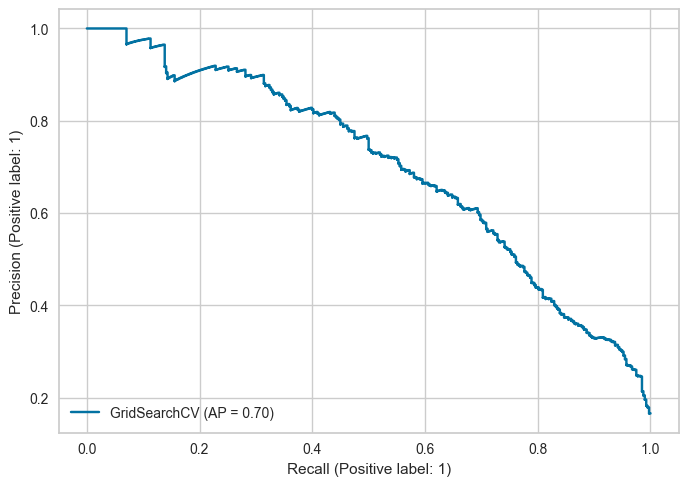

In [525]:
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
PrecisionRecallDisplay.from_estimator(svm_model_grid_f1, X_test, y_test);

In [530]:
# save the metric scores to comare with other models in the end
y_pred = svm_model_grid_f1.predict(X_test)
decision_function= svm_model_grid_f1.decision_function(X_test)

SVM_AP = average_precision_score(y_test, decision_function)
SVM_rec = recall_score(y_test, y_pred)
SVM_f1 = f1_score(y_test,y_pred)
SVM_matthews =  matthews_corrcoef(y_test, y_pred)
SVM_time =  measure_prediction_time(svm_model_grid_f1,X_test)


In [531]:
SVM_AP, SVM_rec, SVM_f1, SVM_matthews, SVM_time

(0.699034621657618,
 0.7939698492462312,
 0.5709123757904245,
 0.48717610590661103,
 1.1828299283981323)

**Result for SVM**: 

The scores of the SVM are lower than the other algorithms. In particular, precision scores were low for both classes. After tuning the hyperparameters via Gridsearch, the precison and f1 scores increased significantly, however as it can be seen below, other algorithms such as cat boost or xgboost perform far better than log reg or svm.

#### 5.2.4 RANDOM FOREST

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. How does Random Forest work:

- **Random Subsampling**: Random Forest randomly selects a subset of the dataset (with replacement) to create a new training set for each decision tree in the ensemble. This process is known as bootstrapping.
- **Decision Tree Training**: Each decision tree in the Random Forest is trained on the bootstrapped training set using a random subset of features. This randomness helps introduce diversity among the trees.
- **Voting**: Once all the decision trees are trained, they individually make predictions on unseen data. In classification problems, the final prediction is determined by majority voting, where each tree's prediction is considered, and the class with the most votes is selected. For regression problems, the final prediction is usually the average of the individual tree predictions.

**Main advantages of Random Forests**:

- **Reduced Overfitting**: The ensemble of decision trees reduces the risk of overfitting compared to a single decision tree, as individual trees are prone to overfitting the training data.
- **Feature Importance**: Random Forests provide a measure of feature importance based on how much each feature contributes to the overall performance of the ensemble.
- **Robustness**: Random Forests are generally robust to outliers and noisy data due to the aggregation of multiple decision trees.
- **Efficiency**: The training process of Random Forests can be parallelized, making it efficient for large datasets.
- **Non-linear Relationships**: Random Forests can capture non-linear relationships between features and target variables.

It's worth noting that Random Forests have some limitations as well, such as decreased interpretability compared to individual decision trees and increased computational complexity with a large number of trees.

**Key parameters of RF**

- **n_estimators**: This parameter determines the number of decision trees in the forest. Increasing the number of trees generally improves performance, but it also increases computation time.
- **max_depth**: It controls the maximum depth of each decision tree in the forest. Limiting the depth helps to prevent overfitting. Setting it to a lower value reduces complexity and can help improve generalization.
- **min_samples_split**: This parameter sets the minimum number of samples required to split an internal node. Increasing this value can prevent the model from creating small leaf nodes and can be used to control overfitting.
- **min_samples_leaf**: It sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, increasing this value can help prevent overfitting by avoiding the creation of small leaf nodes.
- **max_features**: This parameter controls the number of features to consider when looking for the best split. The value can be an integer, float, or string. The "sqrt" option uses the square root of the total number of features, while "log2" uses the logarithm base 2 of the total number of features. Choosing a smaller value reduces the correlation between trees and increases randomness.
- **bootstrap** : It determines whether bootstrap samples are used when building decision trees. By default, it is set to True, which means that bootstrap samples are used. Setting it to False would train each decision tree on the entire dataset.
- **class_weight**: It allows you to assign different weights to different classes. This can be useful if the dataset is imbalanced, as it helps the model to pay more attention to the minority class.

In [486]:
# categorical features for encoding - ordinal encoder with better scores for RF
cat_ordinal = ['salary','departments']

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value'
                             ,unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [487]:
# set the class weights
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [488]:
operations_rf = [("OrdinalEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(random_state=100 ))]

rf_pipe = Pipeline(steps=operations_rf)


params_pipe_rf = {
    'RF_model__sample_weight': classes_weights,
    # 'XGB_model__early_stopping_rounds': 10,   # Number of rounds with no improvement before stopping
    # 'XGB_model__eval_metric':'logloss',      # Evaluation metric for early stopping
    # 'XGB_model__eval_set':[(X_test, y_test)]
}

# Fit the pipeline on the training data
rf_pipe.fit(X_train, y_train,**params_pipe_rf)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'departments'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=100))])

In [489]:
print("RF MODEL")
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

RF MODEL
Test_Set
[[1998    3]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   1 1592]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [490]:
# Define the operations in the pipeline
operations_rf = [
    ("OrdinalEncoder", OrdinalEncoder()),
    ("RF_model", RandomForestClassifier (random_state=101))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_rf)

# Defining fit params for cross-validation
rf_pipe_params = {'RF_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=rf_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

# overfitting

Mean cross-validation scores:
test_accuracy      0.982694
train_accuracy     1.000000
test_f1            0.945546
train_f1           1.000000
test_recall        0.905838
train_recall       1.000000
test_precision     0.989049
train_precision    1.000000
dtype: float64


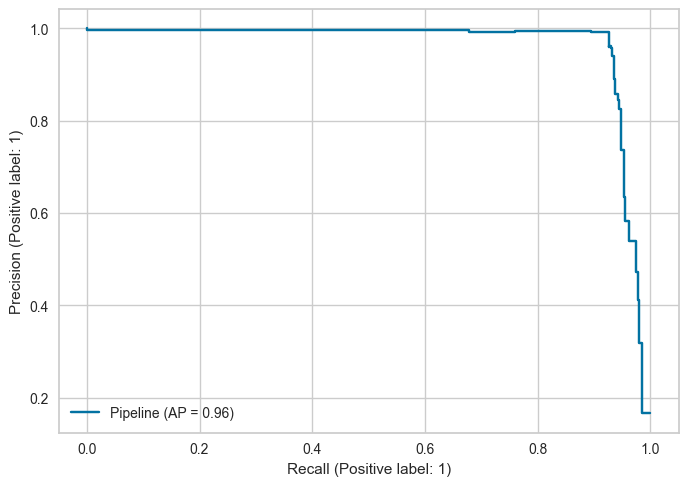

In [491]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(rf_pipe,
                                      X_test,
                                      y_test);

**How can we deal with overfitting in tree based models, RF in particular**

As seen above, scores for train data are 1.00 and for test data 0.92-0.93 which indicates a clear overfitting. Therefore we should tüne some of the hyperparameters to avoid overfitting. In case of tree based models, the most important hyperparameter to deal with overfitting is **max_depth** which cuts the split of the trees at a given point (3 in our case). Another hyperparameter to avoid overfitting is **n_estimators**. We will increase its from 100 (default value) to 150 to enable the model learn better.

In [492]:
# rebuild the model
operations_rf = [("OrdinalEncoder", column_trans),
                  ("RF_model", RandomForestClassifier(random_state=100, max_depth=3, n_estimators=150))]

rf_pipe = Pipeline(steps=operations_rf)


params_pipe_rf = {
    'RF_model__sample_weight': classes_weights,
}

# Fit the pipeline on the training data
rf_pipe.fit(X_train, y_train,**params_pipe_rf)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'departments'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_depth=3, n_estimators=150,
                                        random_state=100))])

In [493]:
print("RF MODEL")
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

RF MODEL
Test_Set
[[1882  119]
 [  25  373]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2001
           1       0.76      0.94      0.84       398

    accuracy                           0.94      2399
   macro avg       0.87      0.94      0.90      2399
weighted avg       0.95      0.94      0.94      2399


Train_Set
[[7520  479]
 [ 106 1487]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7999
           1       0.76      0.93      0.84      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.94      0.90      9592
weighted avg       0.95      0.94      0.94      9592



In [494]:
# check overfitting with cross val
operations_rf = [
    ("OrdinalEncoder", OrdinalEncoder()),
    ("RF_model", RandomForestClassifier (random_state=101, max_depth=3, n_estimators=150))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_rf)

# Defining fit params for cross-validation
rf_pipe_params = {'RF_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=rf_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

# no overfitting

Mean cross-validation scores:
test_accuracy      0.939533
train_accuracy     0.941592
test_f1            0.835867
train_f1           0.841218
test_recall        0.926549
train_recall       0.931105
test_precision     0.761551
train_precision    0.767319
dtype: float64


In [500]:
# save the metrcis to compare in the end
y_pred = rf_pipe.predict(X_test)
y_pred_proba= rf_pipe.predict_proba(X_test)[:,1]

rf_AP = average_precision_score(y_test, y_pred_proba)
rf_rec = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test,y_pred)
rf_matthews =  matthews_corrcoef(y_test, y_pred)
rf_time =  measure_prediction_time(rf_pipe,X_test,10)

In [502]:
rf_AP, rf_rec, rf_f1, rf_matthews, rf_time

(0.9471948196677695,
 0.9371859296482412,
 0.8382022471910113,
 0.8086508210185859,
 0.11478137969970703)

***Feature Importance with RF**

In [503]:
rf_pipe["RF_model"].feature_importances_

array([4.74444270e-03, 1.30364565e-04, 3.27861873e-01, 1.14836534e-01,
       1.65087304e-01, 1.30952928e-01, 2.43701705e-01, 1.26734298e-02,
       1.14191422e-05])

In [504]:
features = rf_pipe["OrdinalEncoder"].get_feature_names_out()
features

array(['salary', 'departments', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years'], dtype=object)

In [505]:
rf_feature_imp = pd.DataFrame(data=rf_pipe["RF_model"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
satisfaction_level               0.327862
time_spend_company               0.243702
number_project                   0.165087
average_montly_hours             0.130953
last_evaluation                  0.114837
Work_accident                    0.012673
salary                           0.004744
departments                      0.000130
promotion_last_5years            0.000011

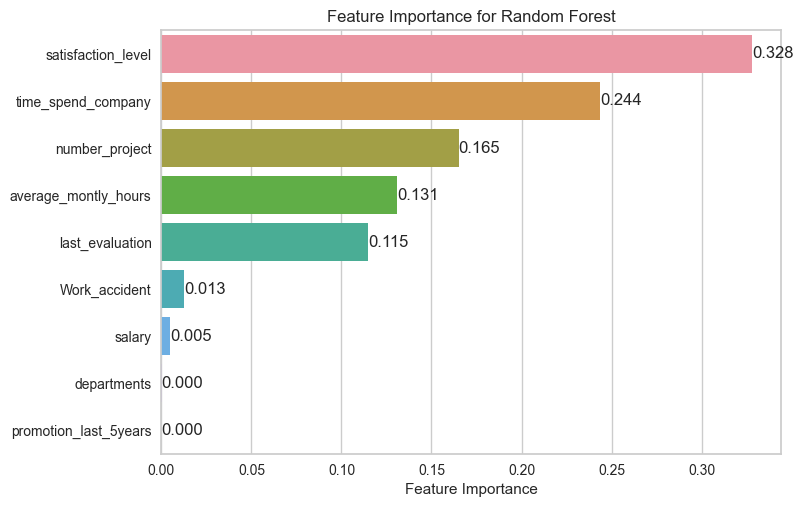

In [506]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

**Why we will not rebuild the model with more important features:**

Normally we can rebuild the RF model with the more important features, however, since we have already limited number of features, we do not need to rebuild the model by decreasing the number of features. In addition, we willl get higher scores with other tree based models below.

#### 5.2.5 Catboost

CatBoost stands for Categorical Boosting, and it is based on a boosting technique that combines multiple weak predictive models (decision trees) to create a strong predictive model. It is known for its ability to handle categorical features naturally, without requiring explicit encoding.

The algorithm works by iteratively building decision trees that predict the target variable (e.g., whether an employee will churn or not) based on the input features (e.g., employee characteristics). It uses a technique called gradient boosting, which focuses on improving the model's performance by minimizing prediction errors in each iteration.

One of the key advantages of CatBoost is its ability to automatically handle categorical features, which are often found in real-world datasets. It uses an innovative approach called ordered boosting, which transforms categorical features into numerical representations during the training process. This helps capture the underlying patterns and relationships between the categorical variables and the target variable.

Additionally, CatBoost incorporates advanced techniques to avoid overfitting and handle imbalanced datasets. It employs a combination of random permutations and ordered statistics to prevent the model from relying too heavily on individual data points or features.

In sum, CatBoost is a powerful and user-friendly algorithm that can deliver accurate predictions even with complex datasets containing categorical features. It simplifies the preprocessing steps and provides good performance out of the box, making it a popular choice for classification tasks.

Some of the main parameters of Catboost algorithm  are:

- **learning_rate**: This parameter controls the step size at each iteration of the boosting process. A higher learning rate allows for faster convergence but may lead to overfitting, while a lower learning rate can help prevent overfitting but may require more iterations for convergence.

- **depth**: This parameter determines the depth of each decision tree in the ensemble. Increasing the depth allows the model to capture more complex interactions in the data but also increases the risk of overfitting. It is important to find an optimal depth that balances model complexity and generalization.

- **iterations**: This parameter specifies the number of boosting iterations to perform. Each iteration adds a new decision tree to the ensemble. Increasing the number of iterations can improve the model's performance, but it also increases the computational time.

- **l2_leaf_reg**: This parameter controls the L2 regularization applied to the leaf weights of the decision trees. It helps to prevent overfitting by adding a penalty term to the loss function based on the magnitudes of the leaf weights.

- **random_strength**: This parameter introduces randomness into the feature selection process during tree construction. It controls the probability of selecting a random feature at each split. Adding randomness can help improve generalization and reduce overfitting.

- **border_count**: This parameter determines the number of discrete values used to approximate numerical features. A higher value allows for more precise representation of numerical features but also increases memory usage.

In [190]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()


# Create a CatBoostClassifier model
cat_model = CatBoostClassifier(random_state = 42, verbose=500, auto_class_weights='Balanced', cat_features = cat_features, 
                               early_stopping_rounds=10, depth=3, use_best_model=True) 

# Fit the model on the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.055391
0:	learn: 0.6423499	test: 0.6410303	best: 0.6410303 (0)	total: 78.1ms	remaining: 1m 17s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.1359220334
bestIteration = 239

Shrink model to first 240 iterations.


In [191]:
print("CATBOOST MODEL")
eval_metric(cat_model, X_train, y_train, X_test, y_test)

CATBOOST MODEL
Test_Set
[[1946   55]
 [  25  373]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.87      0.94      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7788  211]
 [  93 1500]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7999
           1       0.88      0.94      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.93      0.96      0.94      9592
weighted avg       0.97      0.97      0.97      9592



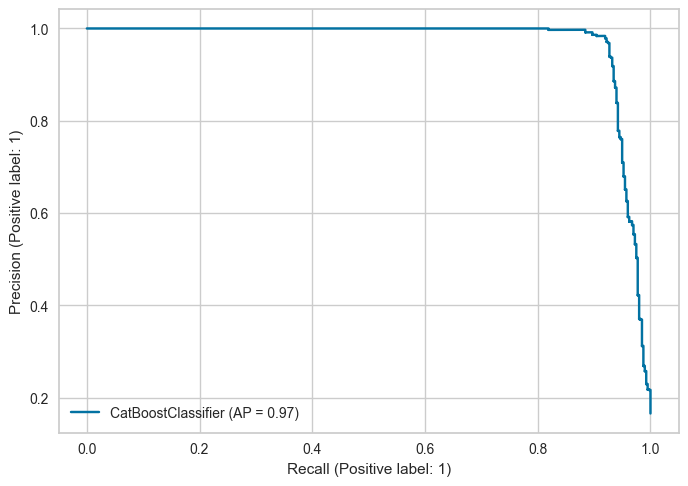

In [192]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = cat_model.predict_proba(X_test)

PrecisionRecallDisplay.from_estimator(cat_model,X_test, y_test)
plt.show();

In [438]:
y_pred = cat_model.predict(X_test)
y_pred_proba= cat_model.predict_proba(X_test)[:,1]

cat_AP = average_precision_score(y_test, y_pred_proba)
cat_rec = recall_score(y_test, y_pred)
cat_f1 = f1_score(y_test,y_pred)
cat_matthews =  matthews_corrcoef(y_test, y_pred)
cat_time =  measure_prediction_time(cat_model,X_test)

cat_AP,cat_rec,cat_f1,cat_matthews,cat_time

(0.9688734453740755,
 0.9371859296482412,
 0.9031476997578693,
 0.8838893929306114,
 0.03559629917144776)

**Catboost Hyperparameter Tuning**

In [227]:
from flaml import AutoML

cat_automl = AutoML()
settings = {
    "time_budget": 120,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['catboost'],  # list of ML learners; we tune XGBoost in this example
    "task": 'classification',  # task type
    "seed": 42,  # random seed
}
cat_automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.automl: 06-13 18:26:31] {2726} INFO - task = classification
[flaml.automl.automl: 06-13 18:26:31] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 06-13 18:26:31] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 06-13 18:26:31] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 06-13 18:26:31] {3004} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl.automl: 06-13 18:26:31] {3334} INFO - iteration 0, current learner catboost
[flaml.automl.automl: 06-13 18:26:49] {3472} INFO - Estimated sufficient time budget=176919s. Estimated necessary time budget=177s.
[flaml.automl.automl: 06-13 18:26:49] {3519} INFO -  at 17.8s,	estimator catboost's best error=0.0185,	best estimator catboost's best error=0.0185
[flaml.automl.automl: 06-13 18:26:49] {3334} INFO - iteration 1, current learner catboost
[flaml.automl.automl: 06-13 18:27:09] {3519} INFO -  at 37.8s,	estimator catboost's best error=0.0185,	best estimator catbo

In [228]:
'''retrieve best config and best learner'''
print('Best ML leaner:', cat_automl.best_estimator)
print('Best hyperparmeter config:', cat_automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-cat_automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(cat_automl.best_config_train_time))

Best ML leaner: catboost
Best hyperparmeter config: {'early_stopping_rounds': 10, 'learning_rate': 0.11960541782042483, 'n_estimators': 128}
Best accuracy on validation data: 0.9819
Training duration of best run: 2.636 s


In [229]:
print("CAT-Tuned MODEL")
eval_metric(cat_automl, X_train, y_train, X_test, y_test)

CAT-Tuned MODEL
Test_Set
[[1990   11]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7966   33]
 [ 121 1472]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.98      0.92      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



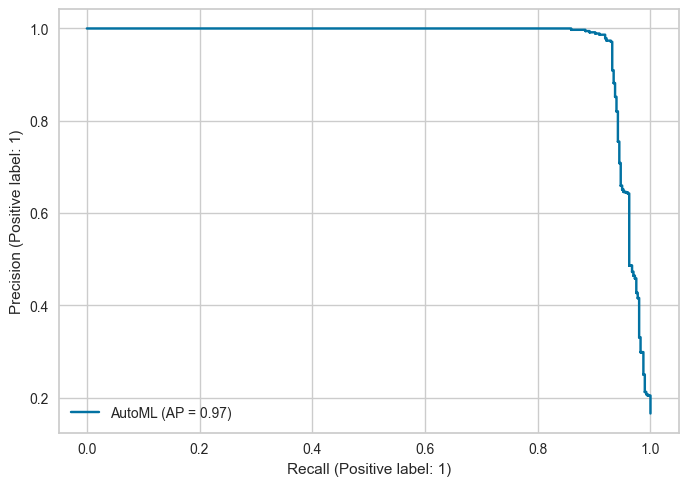

In [230]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(cat_automl, 
                                      X_test, 
                                      y_test);

In [533]:
y_pred = cat_automl.predict(X_test)
y_pred_proba= cat_automl.predict_proba(X_test)[:,1]

cata_AP = average_precision_score(y_test, y_pred_proba)
cata_rec = recall_score(y_test, y_pred)
cata_f1 = f1_score(y_test,y_pred)
cata_matthews =  matthews_corrcoef(y_test, y_pred)
cata_time =  measure_prediction_time(cat_automl,X_test)

cata_AP,cata_rec,cata_f1,cata_matthews,cata_time

(0.9666990728474388,
 0.9296482412060302,
 0.9499358151476253,
 0.9405566201555938,
 0.026718878746032716)

**Result for CATBOOST**:

Since the scores of tuned model is better than untuned model, we will use the former one. Here is a breakdown of the different metrics and what they mean in the context of this churn prediction task:

Test Set:

- **True Negative (TN)**: 1990 - The number of instances correctly predicted as non-churned employees.
- **False Positive (FP)**: 11 - The number of instances incorrectly predicted as churned employees when they are actually non-churned employees.
- **False Negative (FN)**: 28 - The number of instances incorrectly predicted as non-churned employees when they are actually churned employees.
- **True Positive (TP)**: 370 - The number of instances correctly predicted as churned employees.

**Precision**: Precision is the ratio of true positives to the sum of true positives and false positives. In the test set, the precision for churned employees is 0.97, which means that 97% of the employees predicted as churned by the model are actually churned employees.

**Recall**: Recall is the ratio of true positives to the sum of true positives and false negatives. In the test set, the recall for churned employees is 0.93, indicating that the model identifies 93% of the actual churned employees.

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. In the test set, the F1-score for churned employees is 0.95, indicating a good balance between precision and recall.

**Accuracy**: Accuracy is the overall correct prediction rate of the model. In the test set, the accuracy is 0.98, which means that the model accurately predicts whether an employee will churn or not with 97% accuracy.

All in all, the CatBoost model shows strong performance in predicting employee churn, with high precision, recall, and F1-score for churned employees. The model correctly identifies a significant number of churned employees (TP), while minimizing false positives (FP). 

### 5.2.6 XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm known for its high performance and efficiency in handling structured data. It belongs to the family of gradient boosting algorithms, which are ensemble methods that combine multiple weak predictive models (typically decision trees) to create a strong predictive model.

**How does XGBoost work?**:

- **Boosting**: XGBoost uses a boosting technique where models are trained sequentially, with each model attempting to correct the mistakes made by the previous models. It trains a new model to predict the errors (residuals) of the previous models.
- **Gradient Optimization**: XGBoost uses gradient optimization to train the models. It calculates the gradient of a loss function (such as mean squared error or log loss) with respect to the predicted values of the previous models. The new model is trained to minimize this gradient, which helps improve the overall model's performance.
- **Decision Trees**: XGBoost uses decision trees as base learners. Decision trees are simple, hierarchical models that make predictions based on a series of if-else conditions. XGBoost can create decision trees of varying depth and complexity.
- **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting and improve generalization. It includes terms in the objective function that penalize complex models, such as adding a regularization term to the loss function.
- **Feature Importance**: XGBoost provides a measure of feature importance, indicating the relevance of each feature in the predictive model. It calculates the total reduction in the loss function that is achieved by splits on a particular feature, giving insights into which features are more influential.

**The main parameters of XGBoost** can be categorized into three groups: general parameters, booster parameters, and task-specific parameters. Here's a simplified explanation of each group:

1) **General Parameters**:

- **n_estimators**: The number of boosting rounds (or decision trees) to build. It controls the overall complexity and number of models in the ensemble.
- **learning_rate**: Controls the step size at each boosting iteration. A lower learning rate requires more boosting rounds but can yield better generalization.
- **max_depth**: The maximum depth of each decision tree. It determines the complexity of individual trees and affects the model's ability to capture interactions.
- **subsample**: The fraction of training samples used for training each tree. It helps combat overfitting by introducing randomness into the training process.
- **colsample_bytree**: The fraction of features (columns) used for training each tree. It helps control the diversity of the features considered in each tree.

**Booster Parameters**:

- **booster**: The type of booster to use, such as "gbtree" for tree-based models or "gblinear" for linear models.
- **gamma**: Controls the minimum loss reduction required to make a further partition on a leaf node of the tree. It helps control the tree's complexity.
- **reg_alpha and reg_lambda**: L1 and L2 regularization terms applied to the weights of the tree. They help control overfitting by adding regularization penalties.
- **min_child_weight**: Controls the minimum sum of instance weights required in a child node. It helps control the tree's complexity and can improve robustness.

In [209]:
cat_ordinal = ['salary','departments']

In [210]:
enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value'
                             ,unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [211]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [197]:
# X_train_xgb = X_train.copy()
# X_train_xgb = column_trans.fit_transform(X_train_xgb)
# X_test_xgb = column_trans.transform(X_test)

In [212]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=101, max_depth =3))]

xgb_pipe = Pipeline(steps=operations_xgb)

# XGboost algortimasının multiclass datalar için weight_class hyper parametresi olmadığından. fit fonksiyonu içinde 
# sample_weight hyper paremetresini kullanabiliyoruz.

params_pipe_xgb = {
    'XGB_model__sample_weight': classes_weights,
    # 'XGB_model__early_stopping_rounds': 10,   # Number of rounds with no improvement before stopping
    # 'XGB_model__eval_metric':'logloss',      # Evaluation metric for early stopping
    # 'XGB_model__eval_set':[(X_test, y_test)]
}

# Fit the pipeline on the training data
xgb_pipe.fit(X_train, y_train,**params_pipe_xgb)



Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'departments'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=No...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=101, ...))])

In [213]:
print("XGB MODEL")
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

XGB MODEL
Test_Set
[[1949   52]
 [  26  372]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.88      0.93      0.91       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7855  144]
 [  74 1519]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7999
           1       0.91      0.95      0.93      1593

    accuracy                           0.98      9592
   macro avg       0.95      0.97      0.96      9592
weighted avg       0.98      0.98      0.98      9592



In [214]:
# Define the operations in the pipeline
operations_xgb = [
    ("OrdinalEncoder", OrdinalEncoder()), 
    ("XGB_model", XGBClassifier(random_state=101, max_depth=3))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_xgb)

# Defining fit params for cross-validation
xgb_pipe_params = {'XGB_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=xgb_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

Mean cross-validation scores:
test_accuracy      0.972060
train_accuracy     0.978732
test_f1            0.917439
train_f1           0.937336
test_recall        0.934711
train_recall       0.957626
test_precision     0.900829
train_precision    0.917907
dtype: float64


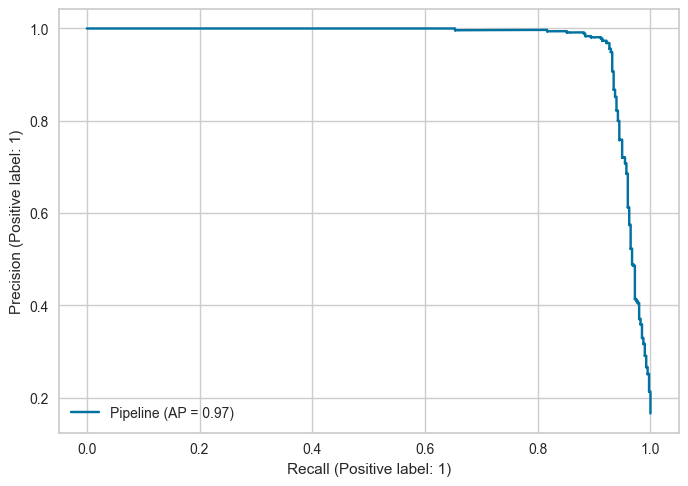

In [215]:
# check overall performance of the model

PrecisionRecallDisplay.from_estimator(xgb_pipe, 
                                      X_test, 
                                      y_test);

In [460]:
y_pred = xgb_pipe.predict(X_test)
y_pred_proba= xgb_pipe.predict_proba(X_test)[:,1]

xgb_AP = average_precision_score(y_test, y_pred_proba)
xgb_rec = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test,y_pred)
xgb_matthews =  matthews_corrcoef(y_test, y_pred)
xgb_time =  measure_prediction_time(xgb_pipe,X_test)

xgb_AP,xgb_rec,xgb_f1,xgb_matthews,xgb_time

(0.9674311493008211,
 0.9346733668341709,
 0.9051094890510949,
 0.8861609561204485,
 0.03540363311767578)

**XGBoost Hyper-Parameter Tuning**

In [ ]:
from flaml import AutoML

xgb_automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['xgboost'],  # list of ML learners; we tune XGBoost in this example
    "task": 'classification',  # task type
    "seed": 42,  # random seed
}
xgb_automl.fit(X_train=X_train, y_train=y_train, **settings)

In [223]:
'''retrieve best config and best learner'''
print('Best ML leaner:', xgb_automl.best_estimator)
print('Best hyperparmeter config:', xgb_automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-xgb_automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(xgb_automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 14, 'max_leaves': 23, 'min_child_weight': 0.9030514379170209, 'learning_rate': 0.5500317092437325, 'subsample': 0.7837846133419992, 'colsample_bylevel': 0.9919147257144936, 'colsample_bytree': 0.9549891298248687, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.4502108984066631}
Best accuracy on validation data: 0.9825
Training duration of best run: 2.091 s


In [224]:
print("XGB-Tuned MODEL")
eval_metric(xgb_automl, X_train, y_train, X_test, y_test)

XGB-Tuned MODEL
Test_Set
[[1989   12]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7984   15]
 [  96 1497]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



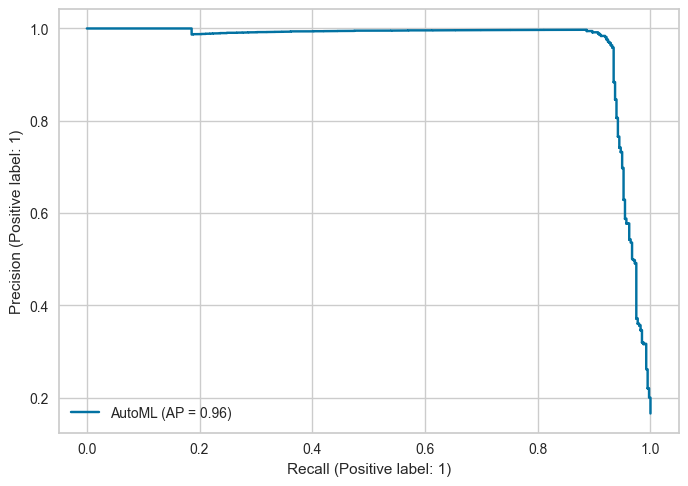

In [225]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(xgb_automl, 
                                      X_test, 
                                      y_test);

In [462]:
y_pred = xgb_automl.predict(X_test)
y_pred_proba= xgb_automl.predict_proba(X_test)[:,1]

xgba_AP = average_precision_score(y_test, y_pred_proba)
xgba_rec = recall_score(y_test, y_pred)
xgba_f1 = f1_score(y_test,y_pred)
xgba_matthews =  matthews_corrcoef(y_test, y_pred)
xgba_time =  measure_prediction_time(xgb_automl,X_test,10)

xgba_AP,xgba_rec,xgba_f1,xgba_matthews,xgba_time

(0.9639580749927003,
 0.9296482412060302,
 0.9487179487179487,
 0.939049459964612,
 0.04354867935180664)

**Result for XGBoost**:

Based on the results above, both the XGBoost model's test and train sets show high precision, recall, and F1-score for both classes. The model performs well in correctly identifying employees who have churned (class 1), with relatively low false positive and false negative rates. The accuracy of the model is also high, indicating that it provides accurate predictions overall.

#### 5.2.7 LightGBM

LightGBM is a gradient boosting framework that is designed to be efficient and scalable. It uses a tree-based learning algorithm similar to XGBoost but with some differences in implementation. Here's a simplified explanation of LightGBM:

LightGBM uses the concept of leaf-wise tree growth instead of level-wise tree growth like other gradient boosting algorithms. This allows it to grow trees more efficiently and achieve better performance with less memory usage.

**The main parameters of LightGBM can be categorized into two groups**: general parameters, boosting parameters

1) **General Parameters**:

- **num_iterations**: The number of boosting iterations (or trees) to build.
- **learning_rate**: Controls the step size at each boosting iteration. A lower learning rate requires more boosting rounds but can yield better generalization.
- **num_leaves**: The maximum number of leaves (terminal nodes) in each tree. It determines the complexity and depth of the trees.
- **feature_fraction**: The fraction of features (columns) used for training each tree. It helps control the diversity of the features considered in each tree.
- **bagging_fraction**: The fraction of training data used for training each tree. It helps combat overfitting by introducing randomness into the training process.

2) **Boosting Parameters**:

- **boosting_type**: The type of boosting algorithm to use, such as "gbdt" for traditional gradient boosting or "dart" for a dropout-based variant.
- **max_depth**: The maximum depth of each tree. It determines the complexity of individual trees and affects the model's ability to capture interactions.
- **min_child_samples**: The minimum number of samples required to form a new leaf. It helps control the tree's complexity and can improve robustness.

In [232]:
from lightgbm import LGBMClassifier

In [251]:
cat_ordinal = ['salary','departments']

In [252]:
enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value'
                             ,unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [253]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

In [256]:
operations_lgbm = [("OrdinalEncoder", column_trans), 
                  ("lgbm_model", LGBMClassifier(random_state=101, max_depth =3, objective='binary'))]

lgbm_pipe = Pipeline(steps=operations_lgbm)

params_pipe_lgbm = {
    'lgbm_model__sample_weight': classes_weights,
    # 'lgbm_model__early_stopping_rounds': 10,   # Number of rounds with no improvement before stopping
    # 'lgbm_model__eval_metric':'logloss',      # Evaluation metric for early stopping
    # 'lgbm_model__eval_set':[(X_test, y_test)]
}

# Fit the pipeline on the training data
lgbm_pipe.fit(X_train, y_train,**params_pipe_lgbm)



Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary', 'departments'])],
                                   verbose_feature_names_out=False)),
                ('lgbm_model',
                 LGBMClassifier(max_depth=3, objective='binary',
                                random_state=101))])

In [257]:
print("LGBM MODEL")
eval_metric(lgbm_pipe, X_train, y_train, X_test, y_test)

LGBM MODEL
Test_Set
[[1950   51]
 [  26  372]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.88      0.93      0.91       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7825  174]
 [  93 1500]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7999
           1       0.90      0.94      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.96      0.95      9592
weighted avg       0.97      0.97      0.97      9592



In [238]:
# Define the operations in the pipeline
operations_lgbm = [
    ("OrdinalEncoder", OrdinalEncoder()), 
    ("lgbm_model", LGBMClassifier(random_state=101, max_depth=3))
]

# Create the pipeline
pipe_model = Pipeline(steps=operations_lgbm)

# Defining fit params for cross-validation
lgbm_pipe_params = {'lgbm_model__sample_weight':classes_weights}

# Define the scoring metric
scoring= ["accuracy", "f1", "recall", "precision"]

# Perform cross-validation
scores = cross_validate(pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params=lgbm_pipe_params)

# Create a DataFrame to store the scores
df_scores = pd.DataFrame(scores)

# Calculate the mean scores
mean_scores = df_scores.mean()[2:]

# Print the mean scores
print("Mean cross-validation scores:")
print(mean_scores)

Mean cross-validation scores:
test_accuracy      0.971330
train_accuracy     0.972946
test_f1            0.915567
train_f1           0.920305
test_recall        0.935969
train_recall       0.940521
test_precision     0.896102
train_precision    0.900946
dtype: float64


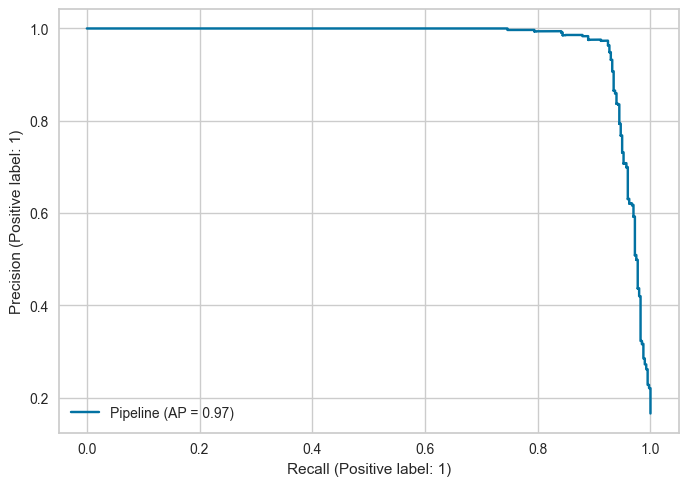

In [239]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(lgbm_pipe, 
                                      X_test, 
                                      y_test);

In [464]:
y_pred = lgbm_pipe.predict(X_test)
y_pred_proba= lgbm_pipe.predict_proba(X_test)[:,1]

lgbm_AP = average_precision_score(y_test, y_pred_proba)
lgbm_rec = recall_score(y_test, y_pred)
lgbm_f1 = f1_score(y_test,y_pred)
lgbm_matthews =  matthews_corrcoef(y_test, y_pred)
lgbm_time =  measure_prediction_time(lgbm_pipe,X_test)

lgbm_AP,lgbm_rec,lgbm_f1,lgbm_matthews,lgbm_time

(0.9688742864896365,
 0.9346733668341709,
 0.9062119366626066,
 0.8874710991315558,
 0.03709578514099121)

**LightGBM Hyper-Parameter Tuning**

https://colab.research.google.com/github/microsoft/FLAML/blob/main/notebook/automl_classification.ipynb#scrollTo=m-UPE17HU7jO

In [245]:
# custom_metric in overfiti engelledigini gorduk ancak ap metrigi daha iyi sonuc verdi
def custom_metric(X_val, y_val, estimator, labels, X_train, y_train,
                  weight_val=None, weight_train=None, config=None,
                  groups_val=None, groups_train=None):
    from sklearn.metrics import log_loss
    import time
    start = time.time()
    y_pred = estimator.predict_proba(X_val)
    pred_time = (time.time() - start) / len(X_val)
    val_loss = log_loss(y_val, y_pred, labels=labels,
                         sample_weight=weight_val)
    y_pred = estimator.predict_proba(X_train)
    train_loss = log_loss(y_train, y_pred, labels=labels,
                          sample_weight=weight_train)
    alpha = 0.5
    return val_loss * (1 + alpha) - alpha * train_loss, {
        "val_loss": val_loss, "train_loss": train_loss, "pred_time": pred_time
    }
    # two elements are returned:
    # the first element is the metric to minimize as a float number,
    # the second element is a dictionary of the metrics to log

In [285]:
from flaml import AutoML

lgbm_automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'ap',
    "estimator_list": ['lgbm'],  # list of ML learners; we tune LightGBM in this example
    "task": 'classification',  # task type
    "seed": 42,  # random seed
}

# settings["custom_hp"] = {
#     "lgbm": {
#         "class_weight": {
#             "domain": "balanced",
#             "init_value": "balanced"
#         }
#     }
# }
lgbm_automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.automl: 06-13 19:19:11] {2726} INFO - task = classification
[flaml.automl.automl: 06-13 19:19:11] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 06-13 19:19:11] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 06-13 19:19:11] {2858} INFO - Minimizing error metric: 1-ap
[flaml.automl.automl: 06-13 19:19:11] {3004} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.automl: 06-13 19:19:11] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 06-13 19:19:14] {3472} INFO - Estimated sufficient time budget=24736s. Estimated necessary time budget=25s.
[flaml.automl.automl: 06-13 19:19:14] {3519} INFO -  at 2.6s,	estimator lgbm's best error=0.1605,	best estimator lgbm's best error=0.1605
[flaml.automl.automl: 06-13 19:19:14] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 06-13 19:19:14] {3519} INFO -  at 2.9s,	estimator lgbm's best error=0.1605,	best estimator lgbm's best error=0.1605
[flaml.automl.

In [286]:
'''retrieve best config and best learner'''
print('Best ML leaner:', lgbm_automl.best_estimator)
print('Best hyperparmeter config:', lgbm_automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-lgbm_automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(lgbm_automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 108, 'num_leaves': 20, 'min_child_samples': 4, 'learning_rate': 0.06129323571151544, 'log_max_bin': 7, 'colsample_bytree': 0.9941025833950202, 'reg_alpha': 0.009618999870314945, 'reg_lambda': 0.024556536437705015}
Best accuracy on validation data: 0.9712
Training duration of best run: 0.1525 s


In [287]:
print("LGBM-Tuned MODEL")
eval_metric(lgbm_automl, X_train, y_train, X_test, y_test)

LGBM-Tuned MODEL
Test_Set
[[1994    7]
 [  27  371]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7981   18]
 [ 102 1491]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



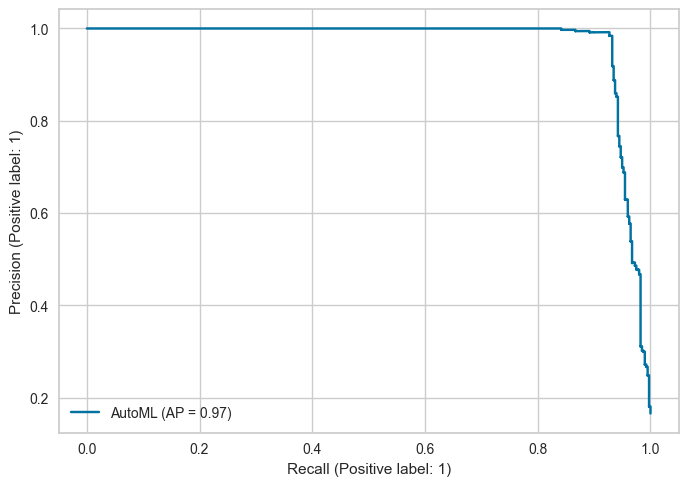

In [288]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(lgbm_automl, 
                                      X_test, 
                                      y_test);

In [466]:
y_pred = lgbm_automl.predict(X_test)
y_pred_proba= lgbm_automl.predict_proba(X_test)[:,1]

lgbma_AP = average_precision_score(y_test, y_pred_proba)
lgbma_rec = recall_score(y_test, y_pred)
lgbma_f1 = f1_score(y_test,y_pred)
lgbma_matthews = matthews_corrcoef(y_test, y_pred)
lgbma_time =  measure_prediction_time(lgbm_automl,X_test)

lgbma_AP,lgbma_rec,lgbma_f1, lgbma_matthews,lgbma_time

(0.9689789266363271,
 0.9321608040201005,
 0.9561855670103092,
 0.9481869141004056,
 0.05608644485473633)

**RESULT for LightGBM**

As seen above, the general scores of the light gbm is very high, similar to catboost and xgboost models.

These scores indicate that the LGBM-tuned model is highly accurate in identifying churned employees (high precision), captures a significant portion of actual churned employees (high recall), and maintains a good balance between precision and recall (high F1-score). This suggests that the model can effectively predict which employees are likely to churn, enabling proactive measures to be taken to retain valuable employees and reduce attrition.

#### 5.2.8 DEEP LEARNING - ANN

Deep learning refers to a subset of machine learning algorithms that are based on artificial neural networks (ANNs). ANNs are computational models inspired by the structure and functioning of the human brain. Deep learning ANN, or deep neural network (DNN), is an ANN with multiple layers of interconnected neurons.

**How a deep learning ANN works**:

- **Architecture**: A deep learning ANN consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of multiple artificial neurons, also called nodes or units. Neurons in one layer are connected to neurons in the next layer through weighted connections.
- **Forward Propagation**: The input data is fed into the input layer, and the values propagate forward through the network. Each neuron in a layer receives input from the previous layer, performs a computation using the weighted connections and an activation function, and passes the output to the next layer. This process continues until the output layer produces the final prediction.
- **Activation Function**: The activation function introduces non-linearities to the network, allowing it to learn complex patterns and relationships in the data. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).
- **Training**: The deep learning ANN is trained using a process called backpropagation. Initially, the network's weights are randomly initialized. The training data, along with their known target values, are used to compute the prediction error. The error is then backpropagated through the network, adjusting the weights based on the error gradient and an optimization algorithm (e.g., gradient descent). This process is repeated iteratively, updating the weights to minimize the prediction error.
- **Learning Features**: One of the key advantages of deep learning ANN is its ability to automatically learn features from raw data. Instead of relying on manual feature engineering, deep learning models can learn and extract relevant features from the data during the training process. This feature learning capability is particularly useful in complex tasks such as image and text analysis.
- **Predictions**: Once the deep learning ANN is trained, it can be used to make predictions on new, unseen data. The input data is fed into the trained network, and the output layer produces the predicted values or classes.

In [ ]:
#!pip install livelossplot

In [745]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.experimental import enable_halving_search_cv
# grid search libraries
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from livelossplot import PlotLossesKerasTF

In [746]:
# split the features and target
X = df.drop('left', axis=1)
y = df['left'].values

In [747]:
# split the data as train, validation and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [748]:
# prepare the features for encoding
cat_onehot = ['departments'] # onehot encoding for departments feature (no hierarchy between various departments)
cat_ordinal = ['salary'] # ordinal encoding for salary bec of hierarchical order betweenn the labels

cat_for_salary = ["low", "medium", "high"] # define the order among different salary groups 

# encode the abovementioned features
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_salary])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [749]:
X_train = column_trans.fit_transform(X_train) # fit_transform for train, transform for other to avoid data leakage
X_val = column_trans.transform(X_val)
X_test = column_trans.transform(X_test)

In [750]:
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [751]:
# scale the data; fit_transform for train, transform val and test
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [752]:
# https://medium.com/analytics-vidhya/custom-metrics-for-keras-tensorflow-ae7036654e05
# this custom metric ONLY works on binary classification problems.
from keras import backend as K

def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())

In [762]:

# build the model by balancing the class weights
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(28, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=[matthews_correlation_coefficient])

In [763]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=20,
                           restore_best_weights = True)

In [757]:
# import class_weight from sklearn to balance the classes
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995554974506472, 1: 3.011162179908076}

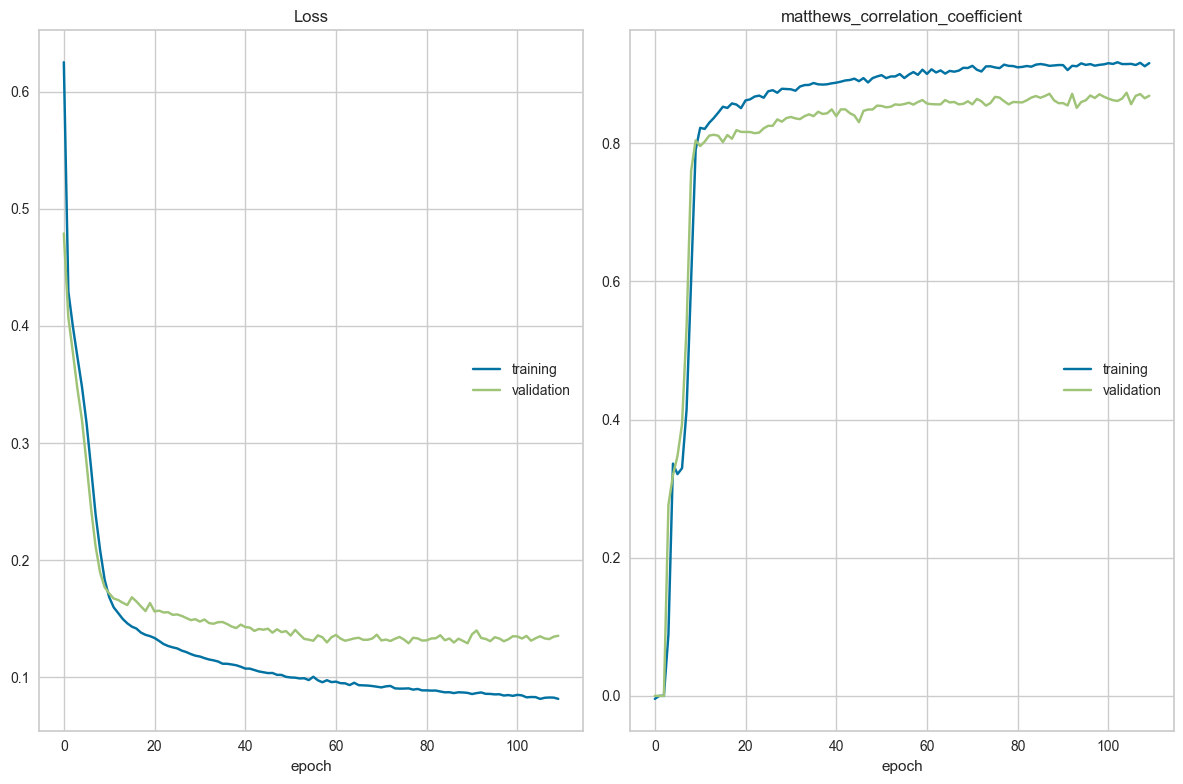

Loss
	training         	 (min:    0.082, max:    0.625, cur:    0.082)
	validation       	 (min:    0.129, max:    0.479, cur:    0.136)
matthews_correlation_coefficient
	training         	 (min:   -0.004, max:    0.917, cur:    0.916)
	validation       	 (min:    0.000, max:    0.873, cur:    0.869)
72/72 [==============================] - 4s 51ms/step - loss: 0.0818 - matthews_correlation_coefficient: 0.9159 - val_loss: 0.1356 - val_matthews_correlation_coefficient: 0.8686
Epoch 110: early stopping


In [764]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()])
          #class_weight=class_weights) 

<Axes: >

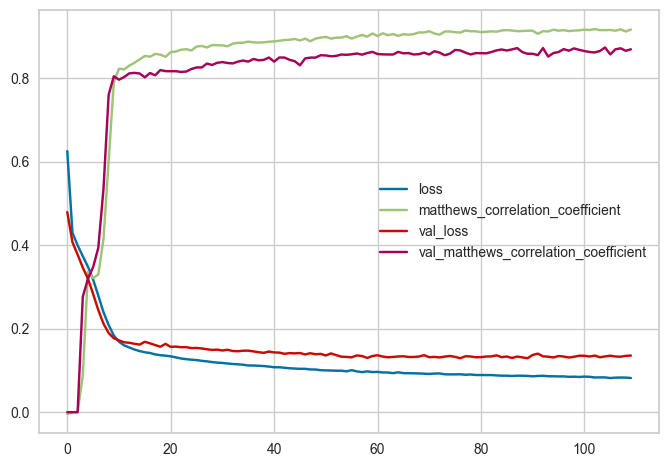

In [765]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [766]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 [==============================] - 0s 3ms/step
[[1484   16]
 [  36  263]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1500
           1       0.94      0.88      0.91       299

    accuracy                           0.97      1799
   macro avg       0.96      0.93      0.95      1799
weighted avg       0.97      0.97      0.97      1799



 1/57 [..............................] - ETA: 3s

57/57 [==============================] - 0s 3ms/step


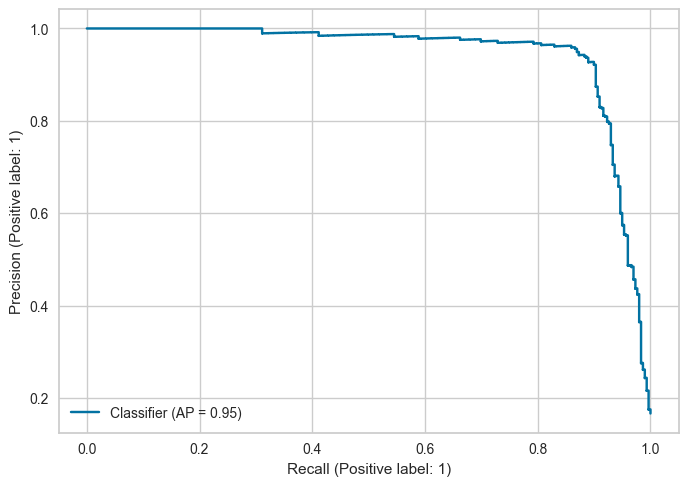

In [768]:
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test,y_pred_proba)

In [ ]:
ANN_AP = average_precision_score(y_test, y_pred_proba)
ANN_f1 = f1_score(y_test, y_pred)
ANN_recall = recall_score(y_test, y_pred)
ANN_matthews =  matthews_corrcoef(y_test, y_pred)
ANN_time =  measure_prediction_time(model,X_test)

In [770]:
ANN_AP, ANN_f1, ANN_recall, ANN_matthews, ANN_time

(0.9451074949427903,
 0.9100346020761245,
 0.8795986622073578,
 0.8935999114114398,
 0.7038819789886475)

**Optuna (Hyperparameter optimization) for ANN**

In [771]:
import optuna
# optimizers for gradient descent to use in backpropagation

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam, AdamW

In [772]:
# we should define functions for optuna
trial_metric = matthews_correlation_coefficient
batch_size = 128 # for a faster modelling increase the batch size


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128) # trial: to try between these values
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    n_units3 = trial.suggest_int('n_units3', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam, AdamW])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)
    
    # n_units, optiizer and lr will be used below in the model layers

    tf.random.set_seed(42) # to compare, define seed
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(n_units3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):  # we use create_model function here; class weights also should be set here, bec model has no class_weight par
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [773]:
study = optuna.create_study(direction="maximize") # "direction maximize" means maximize matthews' (trial metric)
study.optimize(objective, n_trials=50) # objective function here # trial should be higher for better learning, for ex 100
study.best_params

[I 2023-06-16 00:47:21,264] A new study created in memory with name: no-name-24033cbb-105c-4a52-8019-10a57ab5e6eb


Restoring model weights from the end of the best epoch: 29.
Epoch 49: early stopping


[I 2023-06-16 00:47:42,165] Trial 0 finished with value: 0.8693070411682129 and parameters: {'n_units1': 125, 'n_units2': 87, 'n_units3': 126, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.048592401505155175, 'w0': 0.06884617016721391, 'w1': 0.22319433906137637}. Best is trial 0 with value: 0.8693070411682129.


Restoring model weights from the end of the best epoch: 20.
Epoch 40: early stopping


[I 2023-06-16 00:47:55,888] Trial 1 finished with value: 0.8160562515258789 and parameters: {'n_units1': 69, 'n_units2': 21, 'n_units3': 54, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07846853053574541, 'w0': 0.029485235639849245, 'w1': 0.42867735862160516}. Best is trial 0 with value: 0.8693070411682129.
[I 2023-06-16 00:48:30,767] Trial 2 finished with value: 0.5211119651794434 and parameters: {'n_units1': 69, 'n_units2': 102, 'n_units3': 81, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 9.60077987871419e-05, 'w0': 0.06112001202022402, 'w1': 2.341081204206565}. Best is trial 0 with value: 0.8693070411682129.


Restoring model weights from the end of the best epoch: 65.
Epoch 85: early stopping


[I 2023-06-16 00:48:56,890] Trial 3 finished with value: 0.7262550592422485 and parameters: {'n_units1': 78, 'n_units2': 72, 'n_units3': 119, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.0015040309840462268, 'w0': 3.368912821400362, 'w1': 0.01031845155455252}. Best is trial 0 with value: 0.8693070411682129.
[I 2023-06-16 00:49:22,559] Trial 4 finished with value: 0.008502660319209099 and parameters: {'n_units1': 40, 'n_units2': 27, 'n_units3': 72, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0001039791582849464, 'w0': 0.08668181182296278, 'w1': 0.01209470645433573}. Best is trial 0 with value: 0.8693070411682129.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-06-16 00:49:32,237] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 93, 'n_units2': 85, 'n_units3': 91, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 1.8513198589160707e-05, 'w0': 0.08739416932519509, 'w1': 0.7967635463627969}. Best is trial 0 with value: 0.8693070411682129.
[I 2023-06-16 00:50:08,046] Trial 6 finished with value: 0.7949728965759277 and parameters: {'n_units1': 23, 'n_units2': 118, 'n_units3': 76, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.00021074281718729346, 'w0': 0.01021366186733424, 'w1': 0.05342476571417575}. Best is trial 0 with value: 0.8693070411682129.


Restoring model weights from the end of the best epoch: 44.
Epoch 64: early stopping


[I 2023-06-16 00:50:37,871] Trial 7 finished with value: 0.8712843060493469 and parameters: {'n_units1': 118, 'n_units2': 72, 'n_units3': 114, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.000937892293683515, 'w0': 4.5237315459146235, 'w1': 0.3641686839505673}. Best is trial 7 with value: 0.8712843060493469.


Restoring model weights from the end of the best epoch: 22.
Epoch 42: early stopping


[I 2023-06-16 00:50:56,054] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 46, 'n_units2': 74, 'n_units3': 85, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 1.206925586802792e-05, 'w0': 1.8148254886284745, 'w1': 0.19517986792411365}. Best is trial 7 with value: 0.8712843060493469.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-06-16 00:51:06,611] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 125, 'n_units2': 116, 'n_units3': 10, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 3.06043188733031e-05, 'w0': 0.020559640874244264, 'w1': 3.155808614386377}. Best is trial 7 with value: 0.8712843060493469.


Restoring model weights from the end of the best epoch: 27.
Epoch 47: early stopping


[I 2023-06-16 00:51:24,050] Trial 10 finished with value: 0.8909153938293457 and parameters: {'n_units1': 104, 'n_units2': 54, 'n_units3': 47, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0019396027516431148, 'w0': 0.8038674422453246, 'w1': 1.0381965432363405}. Best is trial 10 with value: 0.8909153938293457.


Restoring model weights from the end of the best epoch: 36.
Epoch 56: early stopping


[I 2023-06-16 00:51:46,802] Trial 11 finished with value: 0.9026907086372375 and parameters: {'n_units1': 100, 'n_units2': 51, 'n_units3': 41, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.002010831670578602, 'w0': 0.8594879850980797, 'w1': 1.0409573587018097}. Best is trial 11 with value: 0.9026907086372375.


Restoring model weights from the end of the best epoch: 16.
Epoch 36: early stopping


[I 2023-06-16 00:52:01,073] Trial 12 finished with value: 0.8798388242721558 and parameters: {'n_units1': 96, 'n_units2': 48, 'n_units3': 40, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.00630727336598772, 'w0': 0.694200835673006, 'w1': 1.3013034083630466}. Best is trial 11 with value: 0.9026907086372375.


Restoring model weights from the end of the best epoch: 2.
Epoch 22: early stopping


[I 2023-06-16 00:52:12,543] Trial 13 finished with value: 0.8030003309249878 and parameters: {'n_units1': 102, 'n_units2': 47, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.005760298328319058, 'w0': 0.4713272911415605, 'w1': 4.997059758099141}. Best is trial 11 with value: 0.9026907086372375.


Restoring model weights from the end of the best epoch: 25.
Epoch 45: early stopping


[I 2023-06-16 00:52:37,471] Trial 14 finished with value: 0.8441146016120911 and parameters: {'n_units1': 109, 'n_units2': 48, 'n_units3': 52, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0010149156119416138, 'w0': 0.3500058124425173, 'w1': 1.3018778859653632}. Best is trial 11 with value: 0.9026907086372375.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 00:52:51,319] Trial 15 finished with value: 0.9019948840141296 and parameters: {'n_units1': 86, 'n_units2': 9, 'n_units3': 23, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0061991130446409325, 'w0': 0.9961054463756819, 'w1': 0.7367583791157785}. Best is trial 11 with value: 0.9026907086372375.


Restoring model weights from the end of the best epoch: 17.
Epoch 37: early stopping


[I 2023-06-16 00:53:03,054] Trial 16 finished with value: 0.9048974514007568 and parameters: {'n_units1': 84, 'n_units2': 8, 'n_units3': 8, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.018286348178532606, 'w0': 1.1891478551573493, 'w1': 0.6246450437802744}. Best is trial 16 with value: 0.9048974514007568.


Restoring model weights from the end of the best epoch: 14.
Epoch 34: early stopping


[I 2023-06-16 00:53:14,873] Trial 17 finished with value: 0.0 and parameters: {'n_units1': 54, 'n_units2': 31, 'n_units3': 10, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.023913844101116785, 'w0': 0.22641763890551353, 'w1': 0.12517692613140693}. Best is trial 16 with value: 0.9048974514007568.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 00:53:29,295] Trial 18 finished with value: 0.8915516138076782 and parameters: {'n_units1': 82, 'n_units2': 9, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.021132051518318005, 'w0': 2.487305813622035, 'w1': 2.2141945711822357}. Best is trial 16 with value: 0.9048974514007568.


Restoring model weights from the end of the best epoch: 16.
Epoch 36: early stopping


[I 2023-06-16 00:53:46,369] Trial 19 finished with value: 0.8280145525932312 and parameters: {'n_units1': 59, 'n_units2': 59, 'n_units3': 62, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.11913534067148912, 'w0': 1.213312951661237, 'w1': 0.5116291721179771}. Best is trial 16 with value: 0.9048974514007568.


Restoring model weights from the end of the best epoch: 11.
Epoch 31: early stopping


[I 2023-06-16 00:54:02,118] Trial 20 finished with value: 0.8296424746513367 and parameters: {'n_units1': 15, 'n_units2': 37, 'n_units3': 37, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.012903395053134255, 'w0': 1.6465976157331943, 'w1': 1.2767589323725421}. Best is trial 16 with value: 0.9048974514007568.


Restoring model weights from the end of the best epoch: 37.
Epoch 57: early stopping


[I 2023-06-16 00:54:50,209] Trial 21 finished with value: 0.8551385998725891 and parameters: {'n_units1': 83, 'n_units2': 13, 'n_units3': 22, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.004714817882736638, 'w0': 0.8573168219279301, 'w1': 0.6441139942098979}. Best is trial 16 with value: 0.9048974514007568.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 00:55:13,718] Trial 22 finished with value: 0.9109991192817688 and parameters: {'n_units1': 89, 'n_units2': 18, 'n_units3': 17, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.01273120013753767, 'w0': 1.3331572995621956, 'w1': 0.683451419466207}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 7.
Epoch 27: early stopping


[I 2023-06-16 00:55:29,287] Trial 23 finished with value: 0.8182881474494934 and parameters: {'n_units1': 94, 'n_units2': 35, 'n_units3': 14, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.03986659845794856, 'w0': 2.190662379602301, 'w1': 0.3364432021765211}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-06-16 00:55:45,610] Trial 24 finished with value: 0.9072737693786621 and parameters: {'n_units1': 112, 'n_units2': 18, 'n_units3': 35, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.013912869936916837, 'w0': 0.4997100331323511, 'w1': 0.6174753161193087}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 14.
Epoch 34: early stopping


[I 2023-06-16 00:55:58,966] Trial 25 finished with value: 0.9050310254096985 and parameters: {'n_units1': 114, 'n_units2': 18, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.015271080530659948, 'w0': 0.4524983854083923, 'w1': 0.4839467695708876}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 11.
Epoch 31: early stopping


[I 2023-06-16 00:56:12,656] Trial 26 finished with value: 0.8814478516578674 and parameters: {'n_units1': 114, 'n_units2': 21, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.011965517536757836, 'w0': 0.47722113527513926, 'w1': 0.3585187775655806}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 28.
Epoch 48: early stopping


[I 2023-06-16 00:56:27,354] Trial 27 finished with value: 0.8791996240615845 and parameters: {'n_units1': 112, 'n_units2': 19, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04422653992345122, 'w0': 0.22354632676026992, 'w1': 0.1490168365126405}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 25.
Epoch 45: early stopping


[I 2023-06-16 00:56:50,808] Trial 28 finished with value: 0.8555880188941956 and parameters: {'n_units1': 120, 'n_units2': 28, 'n_units3': 60, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12480593756465874, 'w0': 0.27947366359943204, 'w1': 0.30199201902463696}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 75.
Epoch 95: early stopping


[I 2023-06-16 00:57:19,333] Trial 29 finished with value: 0.857423722743988 and parameters: {'n_units1': 128, 'n_units2': 40, 'n_units3': 18, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.038351684976363314, 'w0': 1.6588573329332719, 'w1': 0.27225114673916}. Best is trial 22 with value: 0.9109991192817688.
[I 2023-06-16 00:57:46,664] Trial 30 finished with value: 0.7967212200164795 and parameters: {'n_units1': 108, 'n_units2': 21, 'n_units3': 98, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.07005239824301336, 'w0': 0.5200915151775062, 'w1': 0.4547917281668367}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 32.
Epoch 52: early stopping


[I 2023-06-16 00:58:04,025] Trial 31 finished with value: 0.9041959643363953 and parameters: {'n_units1': 88, 'n_units2': 14, 'n_units3': 8, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0176436702967371, 'w0': 1.1407600920980656, 'w1': 0.5633999084170648}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 14.
Epoch 34: early stopping


[I 2023-06-16 00:58:15,517] Trial 32 finished with value: 0.9023244976997375 and parameters: {'n_units1': 74, 'n_units2': 8, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.010473579429876785, 'w0': 0.6183118584440058, 'w1': 0.7465670697493995}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 00:58:30,402] Trial 33 finished with value: 0.8896288871765137 and parameters: {'n_units1': 66, 'n_units2': 22, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.02541764510439201, 'w0': 1.3284730305020733, 'w1': 0.567079302406894}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-06-16 00:58:44,009] Trial 34 finished with value: 0.8404214382171631 and parameters: {'n_units1': 119, 'n_units2': 18, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06494655990907922, 'w0': 3.1619987892736536, 'w1': 0.2347422151707944}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-06-16 00:58:58,010] Trial 35 finished with value: 0.9101138114929199 and parameters: {'n_units1': 72, 'n_units2': 28, 'n_units3': 8, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.003611705256964272, 'w0': 0.4165696223301763, 'w1': 0.4404954695623635}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 20.
Epoch 40: early stopping


[I 2023-06-16 00:59:11,052] Trial 36 finished with value: 0.812077522277832 and parameters: {'n_units1': 75, 'n_units2': 41, 'n_units3': 43, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.003993701098419524, 'w0': 0.15394754293100013, 'w1': 1.7055233338409124}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 00:59:25,109] Trial 37 finished with value: 0.8836433291435242 and parameters: {'n_units1': 65, 'n_units2': 28, 'n_units3': 15, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.008681428317202275, 'w0': 0.3736721295576273, 'w1': 0.45171481140557557}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 31.
Epoch 51: early stopping


[I 2023-06-16 00:59:44,370] Trial 38 finished with value: 0.8986477851867676 and parameters: {'n_units1': 92, 'n_units2': 64, 'n_units3': 35, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0031548196727227504, 'w0': 0.6358006425839231, 'w1': 0.8860048728103858}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 14.
Epoch 34: early stopping


[I 2023-06-16 00:59:57,576] Trial 39 finished with value: 0.8821015357971191 and parameters: {'n_units1': 40, 'n_units2': 95, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.008407134100621426, 'w0': 0.43037434460852186, 'w1': 0.4009513543822763}. Best is trial 22 with value: 0.9109991192817688.
[I 2023-06-16 01:00:30,384] Trial 40 finished with value: 0.0 and parameters: {'n_units1': 99, 'n_units2': 30, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002914844505270891, 'w0': 0.16009885537065022, 'w1': 0.18702406745043856}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 8.
Epoch 28: early stopping


[I 2023-06-16 01:00:51,296] Trial 41 finished with value: 0.8549857139587402 and parameters: {'n_units1': 77, 'n_units2': 17, 'n_units3': 8, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.016035990243316582, 'w0': 0.6905132829304804, 'w1': 0.6252290579271125}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 14.
Epoch 34: early stopping


[I 2023-06-16 01:01:09,648] Trial 42 finished with value: 0.8932151198387146 and parameters: {'n_units1': 71, 'n_units2': 23, 'n_units3': 15, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.02871675143233272, 'w0': 1.0538215590342745, 'w1': 0.8152937052452083}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 44.
Epoch 64: early stopping


[I 2023-06-16 01:01:58,328] Trial 43 finished with value: 0.9078837633132935 and parameters: {'n_units1': 89, 'n_units2': 14, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.014765086341484237, 'w0': 1.3894044432784998, 'w1': 0.4401416984963891}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 31.
Epoch 51: early stopping


[I 2023-06-16 01:02:31,216] Trial 44 finished with value: 0.8876534104347229 and parameters: {'n_units1': 105, 'n_units2': 33, 'n_units3': 23, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.012398195560127338, 'w0': 0.5699172111177916, 'w1': 0.25628084642317045}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 23.
Epoch 43: early stopping


[I 2023-06-16 01:02:57,534] Trial 45 finished with value: 0.8899913430213928 and parameters: {'n_units1': 90, 'n_units2': 128, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.008022514476688062, 'w0': 0.822623153684631, 'w1': 0.39196063618857446}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 25.
Epoch 45: early stopping


[I 2023-06-16 01:03:36,343] Trial 46 finished with value: 0.8718076348304749 and parameters: {'n_units1': 123, 'n_units2': 82, 'n_units3': 19, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.032485160724282904, 'w0': 0.35102760670078464, 'w1': 0.8982686981786412}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-06-16 01:03:55,564] Trial 47 finished with value: 0.9046276211738586 and parameters: {'n_units1': 114, 'n_units2': 25, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.004198807348603196, 'w0': 4.347134362561476, 'w1': 1.141892317561626}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 34.
Epoch 54: early stopping


[I 2023-06-16 01:04:18,075] Trial 48 finished with value: 0.9019394516944885 and parameters: {'n_units1': 60, 'n_units2': 42, 'n_units3': 106, 'optimizer': <class 'keras.optimizers.adamw.AdamW'>, 'learning_rate': 0.0006277400574693555, 'w0': 1.628742610340367, 'w1': 0.45187693890868136}. Best is trial 22 with value: 0.9109991192817688.


Restoring model weights from the end of the best epoch: 17.
Epoch 37: early stopping


[I 2023-06-16 01:04:46,720] Trial 49 finished with value: 0.9038158059120178 and parameters: {'n_units1': 99, 'n_units2': 14, 'n_units3': 70, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.006498991907465963, 'w0': 0.7941582906776394, 'w1': 1.5980506665590188}. Best is trial 22 with value: 0.9109991192817688.


{'n_units1': 89,
 'n_units2': 18,
 'n_units3': 17,
 'optimizer': keras.optimizers.nadam.Nadam,
 'learning_rate': 0.01273120013753767,
 'w0': 1.3331572995621956,
 'w1': 0.683451419466207}

In [687]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (study.best_params['n_units1'], # study.best_params[] get the best optuna params
                               study.best_params['n_units2'],
                               study.best_params['n_units3'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation='relu'))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[matthews_correlation_coefficient])

# train model
model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          batch_size=128,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=0)

Restoring model weights from the end of the best epoch: 11.
Epoch 31: early stopping


In [688]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 1/57 [..............................] - ETA: 11s

57/57 [==============================] - 0s 4ms/step
[[1473   27]
 [  28  271]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1500
           1       0.91      0.91      0.91       299

    accuracy                           0.97      1799
   macro avg       0.95      0.94      0.94      1799
weighted avg       0.97      0.97      0.97      1799



57/57 [==============================] - 0s 3ms/step


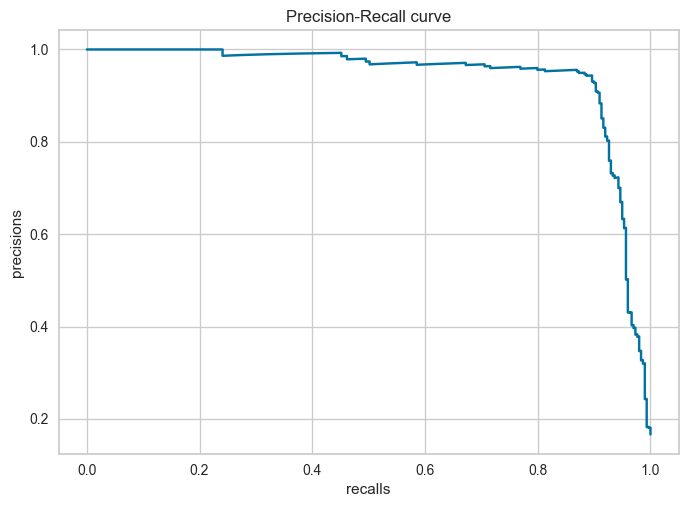

In [689]:
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test,y_pred_proba)

In [690]:
optuna_AP = average_precision_score(y_test, y_pred_proba)
optuna_AP 

0.9411444662769849

In [691]:
optuna_f1 = f1_score(y_test, y_pred)
optuna_rec = recall_score(y_test, y_pred)
optuna_matthews =  matthews_corrcoef(y_test, y_pred)
optuna_time =  measure_prediction_time(model,X_test)

57/57 [==============================] - 0s 3ms/step


57/57 [==============================] - 0s 4ms/step


In [743]:
optuna_AP, optuna_f1, optuna_rec, optuna_matthews, optuna_time

(0.9411444662769849,
 0.9078726968174203,
 0.9063545150501672,
 0.8895473280377588,
 0.6803121089935302)

## 6. Comparison of the Model Performances

- Compare model performances in terms of average-precision, recall, f1, matthews and time scores

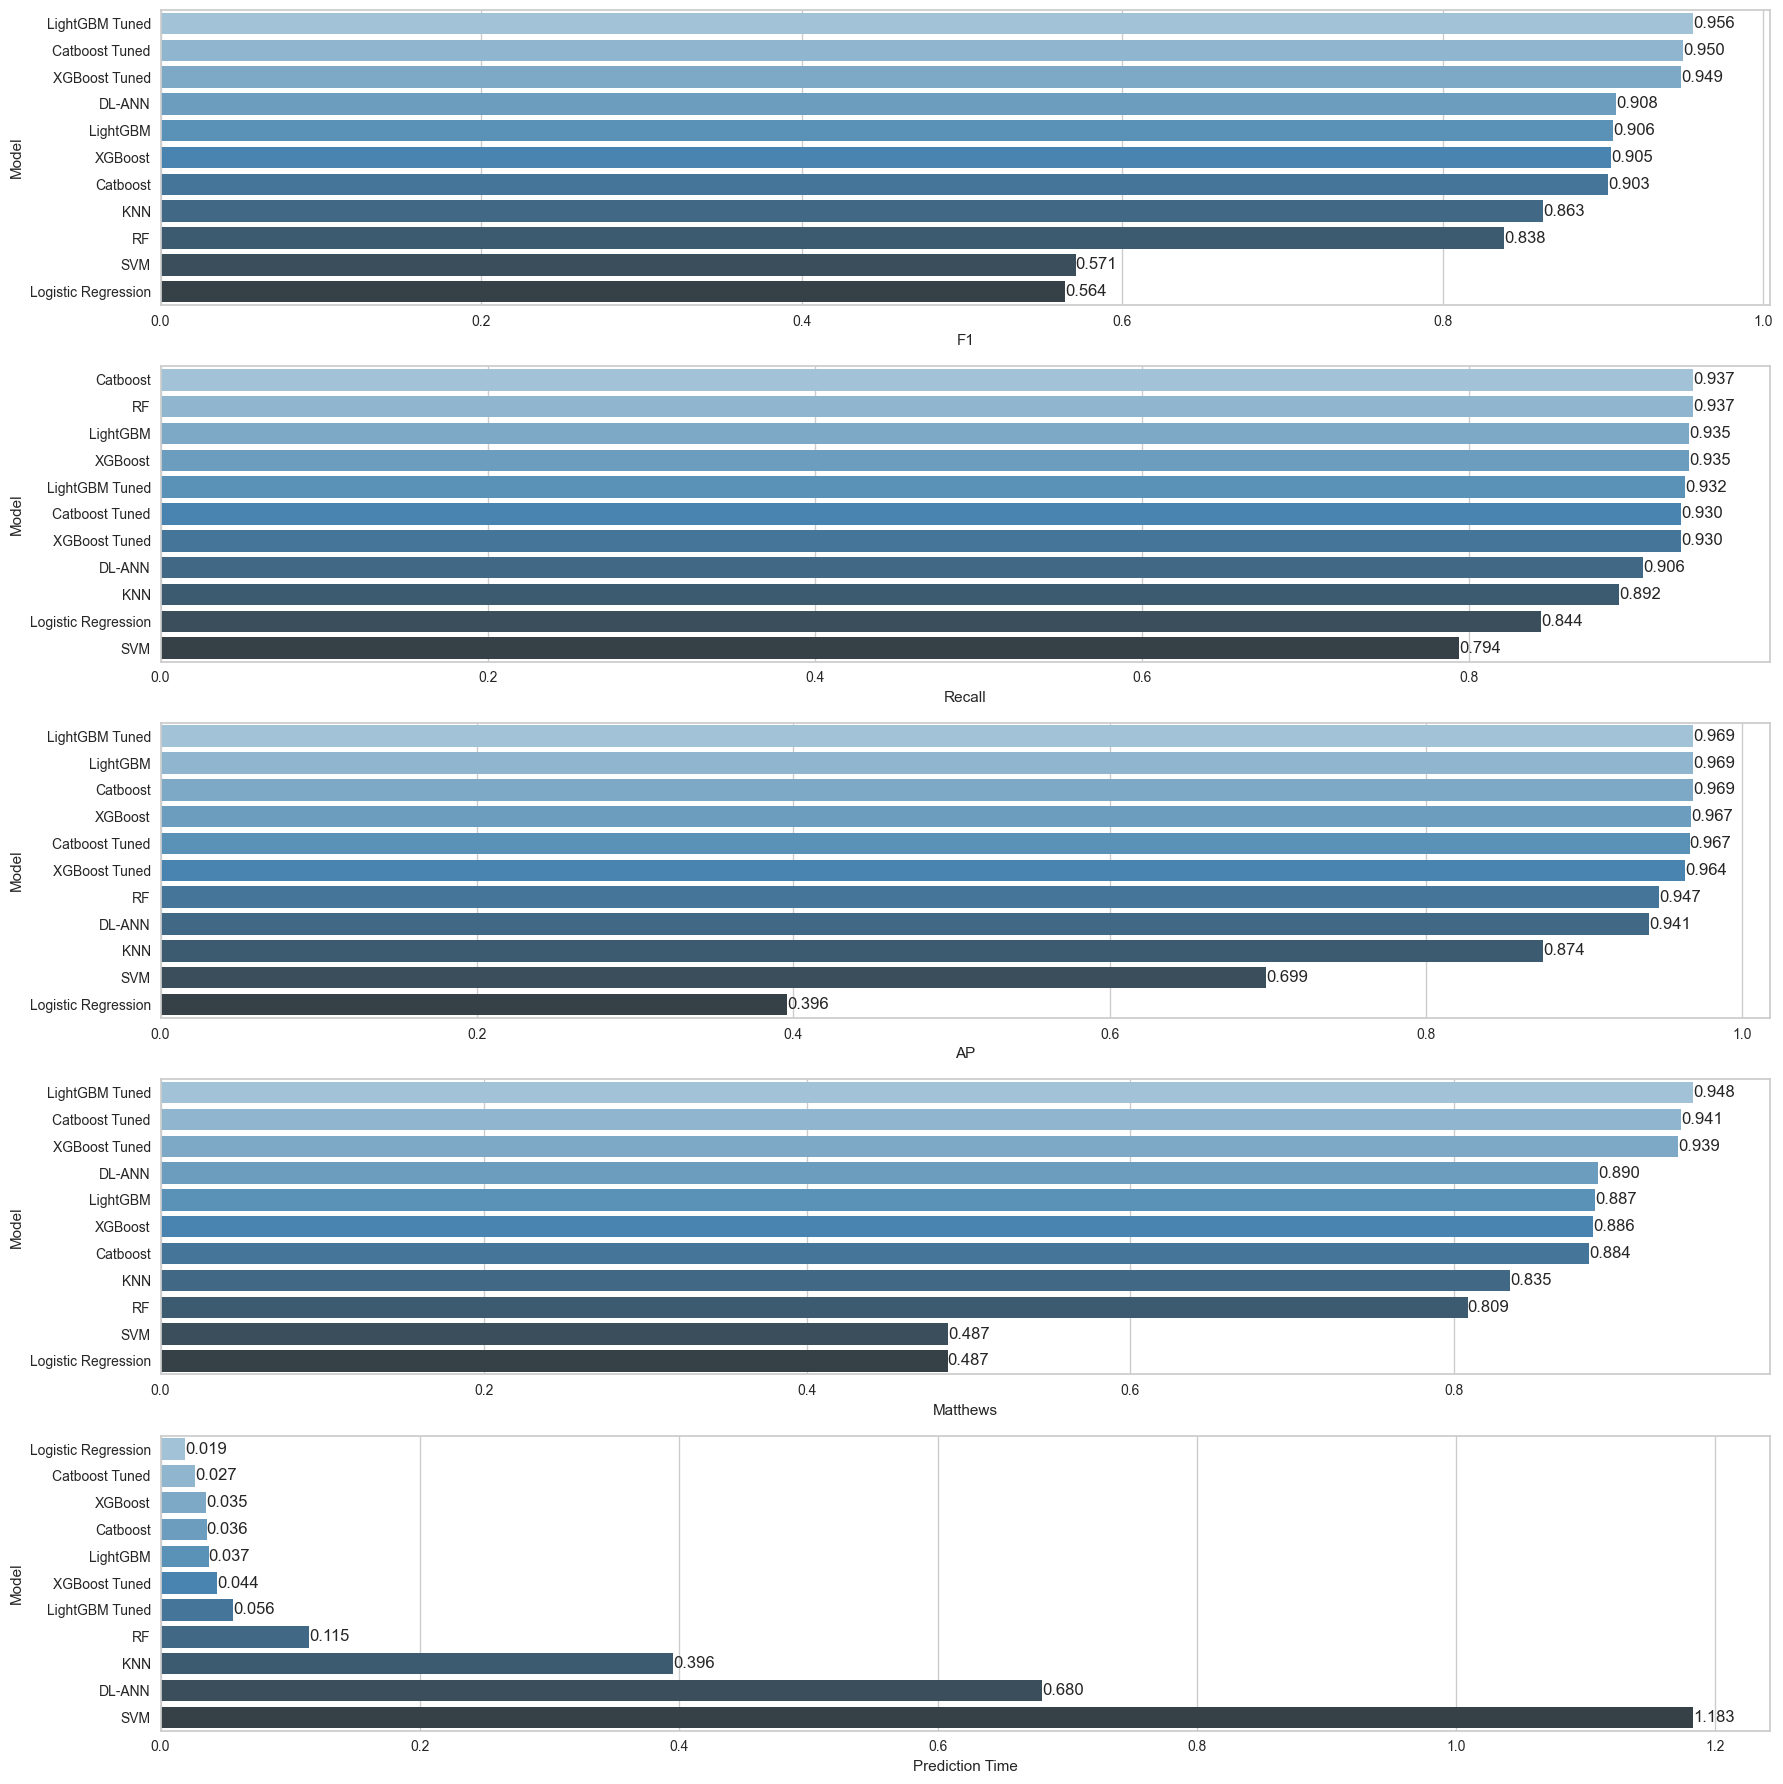

In [796]:
compare = pd.DataFrame({"Model": ["Logistic Regression", 'KNN', 'SVM','RF', 'Catboost', 'Catboost Tuned', "XGBoost", 'XGBoost Tuned', 'LightGBM', 'LightGBM Tuned', 'DL-ANN'],
                        "F1": [log_f1, knn_f1, SVM_f1, rf_f1, cat_f1, cata_f1, xgb_f1, xgba_f1, lgbm_f1, lgbma_f1, optuna_f1],
                        "Recall": [log_rec,knn_rec, SVM_rec, rf_rec, cat_rec, cata_rec, xgb_rec, xgba_rec, lgbm_rec, lgbma_rec, optuna_rec],
                        "AP": [log_AP, knn_AP, SVM_AP, rf_AP, cat_AP, cata_AP, xgb_AP, xgba_AP, lgbm_AP, lgbma_AP, optuna_AP],
                        "Matthews": [log_matthews, knn_matthews, SVM_matthews, rf_matthews, cat_matthews, cata_matthews, xgb_matthews, xgba_matthews, lgbm_matthews, lgbma_matthews, optuna_matthews],
                        "Prediction Time": [log_time, knn_time, SVM_time, rf_time, cat_time, cata_time, xgb_time, xgba_time, lgbm_time, lgbma_time, optuna_time]})

    
plt.figure(figsize=(18,18))
plt.subplot(5,1,1)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,2)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,3)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,4)
compare = compare.sort_values(by="Matthews", ascending=False)
ax=sns.barplot(x="Matthews", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(5,1,5)
compare = compare.sort_values(by="Prediction Time", ascending=True)
ax=sns.barplot(x="Prediction Time", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")



plt.tight_layout()
plt.show();

## 6. Model Deployement

**MODEL CHOICE**

Catboost, lightgbm, XGboost (tuned or untuned) performs well and they all have similar scores. However, sinnce we aim tour model to find all the churn cases correctly in real life, we will choose the model with the highest recall score. Therefore we will use Catboost as the final model for deployment.

In [697]:
# We will not use entire data for final model since it can be overfit.
X = df.drop('left', axis=1)
y = df['left'].values

In [698]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [711]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()


# Create a CatBoostClassifier model
cat_model = CatBoostClassifier(random_state = 42, verbose=500, cat_features = cat_features, 
                               use_best_model=True,early_stopping_rounds= 10, learning_rate= 0.11960541782042483, n_estimators= 128) 

# Fit the model on the training data
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.6026205	test: 0.6012944	best: 0.6012944 (0)	total: 56.2ms	remaining: 7.14s


Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.07403529847
bestIteration = 108

Shrink model to first 109 iterations.


In [712]:
eval_metric(cat_model,X_train,y_train,X_test,y_test)

Test_Set
[[1494    6]
 [  22  277]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1500
           1       0.98      0.93      0.95       299

    accuracy                           0.98      1799
   macro avg       0.98      0.96      0.97      1799
weighted avg       0.98      0.98      0.98      1799


Train_Set
[[8461   39]
 [ 126 1566]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8500
           1       0.98      0.93      0.95      1692

    accuracy                           0.98     10192
   macro avg       0.98      0.96      0.97     10192
weighted avg       0.98      0.98      0.98     10192



In [713]:
pickle.dump(cat_model, open('emp_churn_final_model', 'wb'))

####  Prediction

In [714]:
loaded_model = pickle.load(open('emp_churn_final_model', 'rb'))

In [715]:
df_sample = pd.DataFrame(X_test.iloc[0]).T
df_sample

# df = pd.DataFrame.from_dict([my_dict])

satisfaction_level last_evaluation number_project average_montly_hours   
416               0.11             0.9              6                  264  \

    time_spend_company Work_accident promotion_last_5years departments  salary  
416                  4             0                     0   technical  medium

In [716]:
churn_sample = df_sample # load_trans.transform(df_sample)

In [717]:
churn_sample

satisfaction_level last_evaluation number_project average_montly_hours   
416               0.11             0.9              6                  264  \

    time_spend_company Work_accident promotion_last_5years departments  salary  
416                  4             0                     0   technical  medium

In [718]:
loaded_model.predict(churn_sample)

array([1])

In [719]:
# check it with the real value
df.left.loc[416]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___